In [18]:
import numpy as np
import matplotlib.pyplot as plt

PLOT_YLIMIT1 = 120000000
PLOT_YLIMIT3 = 1450000000
PLOT_YLIMIT5 = 2650000000 / 2
PLOT_YLIMIT7 = 2897630725 / 2
PLOT_YLIMIT9 = 343883971 / 2

# https://stackoverflow.com/questions/11686720/is-there-a-numpy-builtin-to-reject-outliers-from-a-list
def remove_outliers(data, m = 2):
    
    
    data_blocks = [data[:10], data[10:20], data[20:30], data[30:40], data[40:50]]
    new_data = [] # replace outliers with boundary values to not throw off overall average
    
    for block in data_blocks:
        block = np.array(block)
        my_median = np.median(block)
        d = np.abs(block - np.median(block))
        mdev = np.median(d)
        s = d/mdev if mdev else [0. for i in range(len(block))]
        
        for i in range(len(block)):
            
            if s[i] < m:
                new_data += [block[i]]
            else:
                # print("Old:", data[i])
                if block[i] > my_median:
                    new_data += [my_median + m * mdev]
                else:
                    new_data += [my_median - m * mdev]
                # print("New:", new_data[-1])              
    
    
    return new_data # data[s<m]

multiple_bounds = [1.0536727619880182, 1.036714952423889, 1.029551559287961, 1.0253695894375048, 1.0225588199624884, 1.020506860031704, 1.018922297103657, 1.0176540535584482, 1.0166095016616181, 1.0157270951490565, 1.0149666875656815, 1.0143107525947137, 1.0137367229298642, 1.013211628380876, 1.0127617409404073, 1.01233506955035, 1.0119664953245213, 1.0116181996026026, 1.011295115424985, 1.0110103362703242]

"""
def compile_results(input_scores*):
    scores = []
    for i in range(len(input_scores)):
        cur_avg = np.mean(remove_outliers(input_scores[i]))
    
    scores = [scores1[i] + scores2[i] + scores3[i] + scores4[i] + scores5[i] for i in range(len(attributes))]


plot_scores = [np.mean(remove_outliers(s)) for s in scores]
err_scores = [np.std(remove_outliers(s)) for s in scores]
"""

'\ndef compile_results(input_scores*):\n    scores = []\n    for i in range(len(input_scores)):\n        cur_avg = np.mean(remove_outliers(input_scores[i]))\n    \n    scores = [scores1[i] + scores2[i] + scores3[i] + scores4[i] + scores5[i] for i in range(len(attributes))]\n\n\nplot_scores = [np.mean(remove_outliers(s)) for s in scores]\nerr_scores = [np.std(remove_outliers(s)) for s in scores]\n'

(8888705528.112638, 9065042197.914873)
176336669.80223465


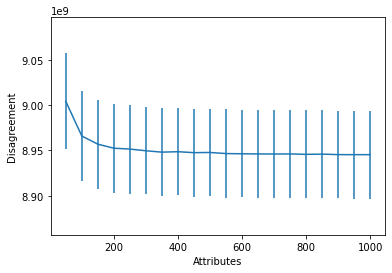

[1.00658, 1.0023, 1.00129, 1.0008, 1.00069, 1.00048, 1.00031, 1.00036, 1.00025, 1.00027, 1.00013, 1.00011, 1.00009, 1.00008, 1.00009, 1.00004, 1.00007, 1.0, 1.0, 1.0]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


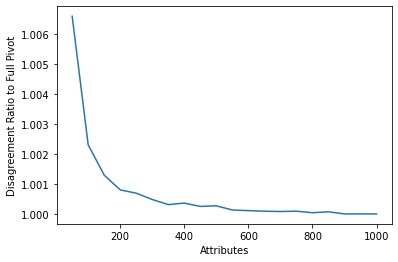

In [19]:
"""
PIVOT PLOTS: synthetic correlated 1_1, 50 to 1000 samples
"""

attributes = [x for x in range(50, 1001, 50)]

scores1 = [[9251246909,9066205813,9046865939,9037586373,9073274383,9310415071,9068109809,9041946043,9049177259,9045743071],
[9105103323,9035394333,9034180589,9031549593,9040838191,9109780421,9029593063,9029358531,9115131241,9036808693],
[9019792953,9020229097,9027632473,9023532871,9057371497,9026965179,9021649421,9024906919,9028655061,9022077719],
[9021991725,9022327531,9025099383,9020075631,9026766103,9024240669,9020792907,9024657027,9020689585,9025904191],
[9020893271,9020052275,9018701921,9018691607,9020047087,9019724945,9017031329,9018707545,9019266199,9019969705],
[9017136037,9026920925,9017547831,9018771067,9017816095,9017067553,9019509967,9018100327,9036040489,9018479567],
[9017245259,9015869813,9017402779,9015571363,9027931443,9020873153,9017153259,9017136813,9019040549,9024697507],
[9015750733,9019789297,9016605519,9015392953,9025488345,9017164487,9018360813,9017078599,9015941987,9017590789],
[9016695355,9017530875,9017572669,9181337759,9016480837,9019749637,9015523899,9016267121,9016410805,9019743545],
[9019610887,9017954823,9030462087,9015930417,9018483385,9014840591,9015344021,9018722017,9015330965,9016304613],
[9016857411,9016095607,9017514791,9016251781,9015778269,9016827023,9021918283,9023236833,9014906339,9015888949],
[9019132317,9015652361,9015784951,9015980723,9015280383,9015879775,9015061887,9016331027,9015722127,9015199329],
[9015120887,9015288091,9017474069,9015229511,9020369589,9015921583,9014991653,9015928445,9014842627,9015931021],
[9015332701,9016023359,9015691479,9015374933,9016270241,9015559327,9015329811,9015307691,9015612835,9014735053],
[9022660563,9025683207,9015593533,9015225571,9016849403,9014770461,9017000329,9015612113,9015224457,9017286029],
[9015364625,9014856095,9019712879,9014561265,9015041069,9018925547,9015223265,9014877571,9015308507,9015112173],
[9015867427,9015441577,9014710783,9014493165,9016095891,9016466763,9017063345,9015943623,9014559375,9015189381],
[9014889291,9016805665,9015169047,9014606695,9014765045,9021349261,9014558049,9014896731,9015760667,9014723577],
[9014739487,9015030551,9014593931,9014959489,9015249139,9015011141,9028732413,9015232579,9014652385,9014680393],
[9014642575,9016072353,9016860881,9014985847,9016235517,9041600501,9014719263,9016809811,9014851181,9015318055]]

scores2 = [[9023701423,9043476593,9089486505,10085800093,9142110063,9003691929,9032745431,8994130417,8997358733,8999864659],
[9003932199,9000924633,8989816223,8979009123,8988909279,8975693427,8978681431,8981504789,9006135969,8985874369],
[8997138263,8987838311,9105071457,8975120163,8990074131,8975004441,8978413223,9012936751,8974272879,8978590409],
[8971580855,8971189195,8973030975,8975066005,9013807145,8974058739,8981286171,8977259349,8974939081,8989215055],
[8994671195,8973109073,8974808489,9005835369,8971432165,8975666575,8975195343,8972591269,9037698229,8969577827],
[8987367565,8971640817,8969670697,8970170429,8970372257,8970531469,8974218209,8972265587,8978226231,8986236189],
[8969946033,8969035191,8972419297,8971143489,8970725815,8970176173,8969904261,8969102719,8972180761,8970722743],
[8980775381,8973720485,8973473437,8970364983,8969163805,8975147523,8970452017,8970662309,8975600655,8970346399],
[8969911259,8974726199,8969532845,8969386369,8969252673,8968379495,8968922281,8970289439,8968995235,8976031117],
[8970655671,8969039899,8972374219,8969662889,8968841977,8969070843,8968940895,8968443047,8969119773,8969772263],
[8970153315,8968634011,8969721469,8969298077,8969260737,8969442855,8968686199,8968668911,8972923949,8969293375],
[8968139445,8969300567,8968690969,8968765953,8968931141,8969431093,8969166045,8968274233,8968912203,8969070667],
[8968639727,8969407589,8969257437,8968122611,8973837699,8969487211,8985940573,8971824217,8969462901,8968816957],
[8968465837,8970908331,8968936049,8969901629,8969029919,8969630535,8969057855,8969228227,8968430083,8968322367],
[8968148815,8969116661,8968452857,8968203323,8968770185,8968519929,8968103825,8968551233,8968716595,8968353749],
[8968319355,8968299635,8968764769,9102254259,8969993543,8969017803,8972569607,8970298781,8968468591,8986511275],
[8972146541,9131839957,8968209027,8968113337,8970084631,8968962829,8968373087,8969383733,9093478475,8970254859],
[8968937007,8968202083,8968387385,8969468987,8968251461,8968515349,8969265975,8968155205,8968455819,8968059103],
[8968047813,8968029005,8968091477,8968589987,8968586237,8971793563,8968198787,8968050219,8968112693,8969424389],
[8968353057,8968101403,8968032545,8968145681,8968136041,8968175197,8968153919,8968388455,8968060283,8968222639]]

scores3 = [[8900357311,8906038733,8932346665,8977080697,8924518595,9078918009,8985039757,18457446239,8904484027,8908627003],
[8914352293,8891468169,8902768219,8890855333,8965914777,8924037491,8899559275,8899861107,8934260989,8895587669],
[8891572923,8884491979,8895181045,8889309373,8892824101,8889073405,8888392901,8888784363,8889350697,8893466987],
[8884481605,8887946457,8890591595,8888671331,8886763693,9071298775,8885627235,8891218005,8886640079,8886733867],
[8884267253,8894156187,8883544611,8885094369,8884646385,8883983695,8886359559,8885789305,8999725633,8885688123],
[8887183019,8898569143,8911740649,8884706889,8883349199,8883331319,8889230955,8890848101,8884381231,8887927699],
[8885161661,8883168151,8884130703,8888211823,8891872531,8883826365,8884186051,8884862977,8883570571,8884216697],
[8894465881,8884724299,8904989587,8883946319,8883420237,8882346669,8882982689,8887464701,8883658905,8891033741],
[8883184375,8883142189,8883396713,8882890325,8884354645,8883635903,8883509789,8884112779,8883214535,8885536095],
[8885623345,8885595881,8882660559,8886528095,8882182879,8889250999,8882282235,8895310679,8882551057,8884523551],
[8882752005,8882361361,8882166831,8885004379,8887933787,8882310163,8882008235,8882481719,8884859995,8883869245],
[8884241661,8885710513,8884014129,8882358837,8884190449,8897597325,8882977963,8882517609,8881926657,8887050333],
[8882623959,8882282045,8883807881,8882320243,8882727623,8882241257,8884041043,8881834067,8882175563,8882814857],
[8883365231,8882033253,8882951363,8934159789,8881866525,8882518953,8884131121,8882454103,8883134381,8883035719],
[8881975677,8882223661,8884371865,8883329797,8882332313,8882645197,8881844653,8882036897,8881834991,8881735583],
[8882824791,8882666469,8885533211,8882425173,8881823531,8881745061,8900239965,8883020423,8882849975,8882070811],
[8881638149,8881952733,8881638925,8895123557,8882222803,8883000547,8883689973,8882261565,8881799153,8882283391],
[8882100531,8883066701,8881674717,8881815123,8886560827,8882026017,8882025323,8882462457,8881590051,8881910581],
[8884633185,8881923305,8881520787,8881926983,8881590519,8882228199,8881591955,8881919697,8881586989,8881746545],
[8882261293,8881760657,8881877377,8882455189,8881671721,8883513503,8881541295,8881534493,8881584547,8881696399]]

scores4 = [[8987599165,9003288549,9008973619,9038921903,9000220867,9013709059,8986232017,9002761291,8989285317,9003641915],
[8972070915,8974483807,9046691787,9029386021,9035747549,9028195119,8968448399,8975028815,8971625431,8979118927],
[8969383437,8981417359,8969447933,8981720063,8966771481,8976147015,8970047405,8969106931,8967112033,8969317241],
[8966457657,9007491273,8966557883,8966947367,8969682005,8966420057,8978144471,8969470129,8968599859,8963613685],
[8965763271,8976448233,19341885987,8965622475,8968085451,8966665887,8964832823,8978372283,8974340137,8970834095],
[8963944469,8967897381,8966866997,8965297489,8965401243,9005948863,8967429453,8965027917,8963103163,8964398249],
[8965244649,8965539155,8962359503,8969956447,8963448811,8963568083,8964693719,8965051659,8969671261,8964539139],
[8967548687,8968096263,8963109759,8968073375,8961628883,8962360689,8962841419,8980110145,8962606949,8965188117],
[8963723013,9060348005,8988886255,8962270487,8964301105,8964466781,8962018397,8964227781,8988259459,8962376297],
[8968687847,8963285527,8988584073,8971226783,8961814135,8963405973,8968267361,8962562017,8961518113,8963934445],
[8963377549,8964379487,8963230219,8965961019,8962369799,8962051023,8963141173,8962720937,8961648815,8963469401],
[8963678711,8962075925,8963204199,8962001313,8961736661,8962649229,8961756005,8962626753,8962023757,8962027023],
[8962344579,8964480313,8962776883,8962046513,8962718633,8961251357,8961659281,8961881497,8963992027,8961690785],
[8964842383,8965313343,8962869033,8960821079,8962513949,8961906337,8961210821,8963866783,8961800163,8961829571],
[8963997403,8963161459,8960894197,8988395371,8961866573,8961267963,8965324105,8964736385,8962030017,8961742051],
[8960958857,8961272073,8961037255,8961060293,8963623553,8961047123,8960732765,8965073137,8961119503,8960837475],
[8961476737,8964641767,8961545563,8965812967,8960727373,8962681887,8962473851,8961078531,8962520591,8961631077],
[8982420433,8961063501,8961016185,8961196287,8961494647,8960727025,8961346405,8961066101,8960839301,8961842627],
[8961130307,8960912339,8960698055,8961924777,20596751809,8961343293,8963712929,8961625639,8960949443,8961493659],
[8960734413,8960935631,8961693311,8969476049,8960735045,8960727875,8960728559,8961101841,8960839501,8960792809]]

scores5 = [[8997717831,9106742249,9090998255,8921108287,8973744427,8930040867,9024813359,8979231671,8938946643,8954300635],
[8939101975,8910936885,8913989849,8911547379,8920019733,8911893853,8919224439,8916375865,8958440481,8910805583],
[8915040337,8932225501,8907519545,8904152851,8912476621,8917332943,8920441697,8905977549,8908479773,8960729663],
[8906311931,8934851307,8906714201,8940609067,8903085931,8908998335,8905229813,8904600463,8972191605,8905343215],
[8905958207,8906569319,8903825041,8908559241,8908569275,8903101373,8904537503,8907912553,8906265521,8907059295],
[8902483485,8903169429,8904122433,8901060541,8903699115,8904611307,8991086305,8903656363,8901900399,8902347683],
[8904081889,8913385981,8901711421,8902187537,8903801669,8903258247,8901539361,8902596705,8901411867,8902360673],
[8920462581,8901593637,8902073969,8903391389,8912308993,8903686917,8901751677,8900976531,8901322125,8910825679],
[8901054857,8904979085,8902931257,8904268167,8901132479,8900870513,8901965819,8899946549,8903164107,8905722711],
[8904377597,8900394869,8903090675,8900023755,8901345125,8902741443,8903415085,8906596611,8901405329,8901812125],
[8900109049,8900969293,8900229005,8902117383,8901163317,8901086535,8900141017,8899770209,8900254565,8902788583],
[8900906997,8899894459,8900855755,8900504583,8900231267,8900357463,8901241045,8899232911,8905381613,8899811499],
[8899854199,8899861859,8912685897,8900234785,8900763511,8900882099,8900321567,8904611211,8900981935,8900145649],
[8905787859,8900485785,8900064667,8900339867,8899193281,8900179285,8899230989,8899805567,8901196445,8899624037],
[8899878083,8899527431,8899425735,8903458457,8900310279,8900035729,8899622961,8908063279,8902027097,8907680819],
[8899299919,8899420233,8899394261,8903947847,8899795003,8899576615,8899973581,8899228937,8899184517,8959590807],
[8900524809,8899217187,8899241493,8899506187,8899454363,8899473525,8901489509,8899205651,8906067305,8899163417],
[8946147919,8899420035,8911252411,8899262639,8900216289,8899398751,8902844119,8900795105,8899577087,8899364709],
[8898990801,8902789761,8899857557,8899856867,8899472613,8901082693,8899083001,8917485651,8899154187,8900921205],
[8901027633,8899080513,8900388495,8899342355,8899878035,8901506365,8899889049,8899274147,8899779971,8932595931]]


scores = [scores1[i] + scores2[i] + scores3[i] + scores4[i] + scores5[i] for i in range(len(attributes))]


plot_scores = [np.mean(remove_outliers(s)) for s in scores]
err_scores = [np.std(remove_outliers(s)) for s in scores]

# plt.title("Pivot: 0.1 Mean, 0.1 Correlation")
plt.xlabel("Attributes")
plt.ylabel("Disagreement")

# mid_val = low_val + (plot_range / 2)
plt.errorbar(attributes, plot_scores, err_scores)

plot_ylims = plt.ylim()
print(plot_ylims)
plot_range = plot_ylims[1] - plot_ylims[0]
print(plot_range)

mid_val = plot_ylims[0] + (plot_range / 2)
plt.ylim(mid_val - PLOT_YLIMIT1, mid_val + PLOT_YLIMIT1)

plt.show()

pivot_change = [round(plot_scores[i] / plot_scores[-1], 5) for i in range(len(attributes))]
print(pivot_change)

bound_check = [pivot_change[i] <= multiple_bounds[i] for i in range(len(pivot_change))]
print(bound_check)

plt.xlabel("Attributes")
plt.ylabel("Disagreement Ratio to Full Pivot")
plt.plot(attributes, pivot_change)
plt.show()


(20031788188.721004, 22940058660.25851)
2908270471.537506


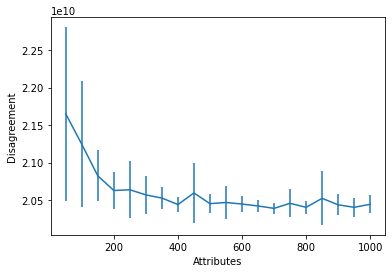

[1.05896, 1.03911, 1.01853, 1.009, 1.00948, 1.00612, 1.00406, 0.99983, 1.00741, 1.00041, 1.00119, 1.00016, 0.99892, 0.99733, 1.00064, 0.99802, 1.00388, 0.99968, 0.99803, 1.0]
[False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


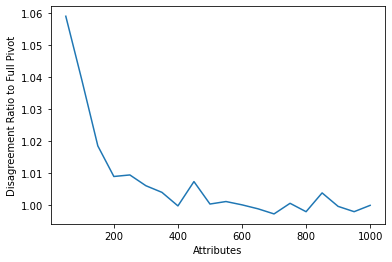

In [20]:
"""
PIVOT PLOTS: synthetic correlated 1_3, 50 to 1000 samples
"""

attributes = [x for x in range(50, 1001, 50)]

scores1 = [[24828013563,20947495227,20612596563,20669825913,20516788953,20750751313,24807979515,20673048513,23513613309,20510228241],
[21952153441,20604721435,20455578747,20617088203,20569730081,21060690993,20739920937,21418101009,21321051211,20413111135],
[20568329337,20388831365,20827226231,20440194183,20347606199,20558136311,21320777331,21295501167,24653387569,20592340551],
[23220463939,20395455371,20550335619,20329165693,24545453377,20369036527,23895280499,20837577457,20326887433,20371301981],
[20379870981,21293993577,20464508067,20433186013,20379625707,20324405301,21136225533,20391803083,20420797447,20322648663],
[20427946741,20959928211,23595363359,20583443333,20417604237,23066600237,22046072429,20671948101,20435803299,20845403711],
[20333295951,20308126427,23749895993,20448660189,21365501485,20522482085,20543011981,20327013431,23334873771,20343575427],
[20457078547,20282882859,20302583305,20312590917,21221953427,24094161815,20541052751,20393088029,20331438477,22591157085],
[20916808933,20383959241,24734813335,21314551285,21129708115,20323465713,20441569825,23370703773,20307283223,21138298083],
[20519990895,20661620525,20316058881,20350467517,20398900225,20513108491,20293861099,25159445197,20295103661,20498614353],
[20819439329,20352455331,21075422885,20323259465,23762312205,20317449501,20296470485,20308109357,20384695453,20334271555],
[21090267539,20323014979,20418477779,20356882419,20344421235,21210608777,20443581357,20414185949,20290819233,20355824069],
[20312586707,21234696811,20424818193,20307356011,20449442745,20283760153,20308529893,20390006073,20357479435,20551042391],
[20297179977,20461919321,20287868683,20330418401,20281384063,20322134795,20298634935,20863913483,20297854679,20691968885],
[20299679221,20794527715,20283382601,20305508617,21507810331,24374918703,20845929827,20823208641,20291142941,20292296185],
[21238221731,20288923319,20293292661,20278700263,20388012597,24071900483,22477913563,20407351005,20277116721,20318838195],
[20312380779,20347672387,20324431255,23542252773,20273304945,21919586225,21265901841,21501003333,21271584269,20286408889],
[24692257661,20291141475,20325210673,23610418243,20271503257,20280064267,20378456057,23918340183,20271118881,21047573709],
[20284265691,20278756665,20300201571,20418816561,20275537511,20282967929,20286526027,20326111641,20277246113,22849666617],
[22275397101,20488412555,20321913937,22645305745,20498381677,21272324369,20289548615,20298351057,20278985525,20270141969]]

scores2 = [[24053377469,20763321951,23388616625,24072279639,21487630507,25400852701,21916559285,20673203605,21501366729,22090405263],
[20775095137,20502415081,21934088807,20571206205,20663193549,26202172377,21614555679,20874724247,21233752039,20722798399],
[20914462527,23426404911,21136903591,22028987639,20439541223,20600772461,20481368111,20471796017,20478249799,21079459261],
[20822583493,20395003901,20428643953,20482205173,24347943269,20414637691,20780852871,20574860251,20475909285,20613471529],
[20430283237,20487831453,21567978979,24338285791,20438666535,22330289161,20426535019,21250297123,23814625043,20464081423],
[20444965321,20615149357,21164298001,20403630159,20394299775,24544202129,20500666937,20467979663,20406866363,20435302991],
[23293508303,20612918937,22383016351,20581981269,20425995377,20430810971,20649795661,20387818173,20536393459,20579355245],
[20457021801,20360487835,20430614449,21263443471,20369593775,23609994059,20465092081,20507814221,20418939657,26207017193],
[20362971569,24280392101,20451328431,24630733271,20431547171,20561956839,20421287771,23103191285,20430969871,20566360875],
[20672098985,20427865179,20541646281,21418965437,20382983915,20376605597,20475720653,21155489661,20364455549,24698216113],
[20452323437,20362088171,20356228607,20480891285,20478892535,20419717511,20468183307,20352901935,20374583965,21638764285],
[20353414741,20930471047,20511747329,20403303435,20388843887,22418752831,21220569343,20443274003,20379030383,20559387647],
[20389071835,20882175889,20377353475,20411748693,20406571359,20715292539,20454631723,20356533219,20408825535,20384448307],
[20493063217,20617440285,20402784307,20483853785,20344064813,20351593643,20640335709,20504499939,20396490901,20362643131],
[20358079333,20344261519,20355343115,20446550029,20454155391,20363101609,20351821209,20372393357,20618160761,20351032433],
[20812866091,22935664303,20435767729,20627685635,20401437503,20354517345,20353222453,20365149577,21088824635,20356940055],
[20352919785,23102263453,20371883633,20422188821,20558242331,20343334893,20352789873,23396019157,20407170583,21125616137],
[23001273443,20350870927,20689609081,20344717409,20372022541,20362083733,21073832389,20455722041,20586924843,20353301471],
[20390377243,20351614351,20356143353,20424117431,20373720565,20733081845,20868977571,20353953577,20343171725,20453483733],
[20367832751,20350487303,20353113399,24313094901,20624984495,20538543657,20377955653,23656638889,21898965383,20370903261]]

scores3 = [[21148537487,20894117443,20891595009,24698777785,21646641663,23981869231,20567921965,20790521239,24914396897,20554593641],
[20543518327,23362041765,21608163253,21002765517,22962285115,22202901375,23199906073,25340871763,20573783325,22171108583],
[20405620903,20457998809,22090540597,20686748709,20751457569,22056405603,22893072119,20433902449,20796136923,20440735643],
[20432906809,20401071879,20574852389,22219672811,20397870293,20387525721,21078493921,20414105667,21378863751,20803635153],
[22856905961,20398496015,20427372961,20418301623,20468463691,20399746203,20421793411,20570130267,21630988905,20377677613],
[20366644255,20395989289,20441586471,20389792457,20458086521,24463029901,20386564025,21031742349,21094061221,20473335553],
[20402783055,20685681367,20387211141,22594733187,20494622563,20885587233,20400364561,20372270219,20379957853,20599187277],
[20506539471,20412388089,20370241083,20419631821,20391067887,21103415491,20855771157,21366421805,20372900143,20371098375],
[20798911745,20415690135,22404518683,20465841889,20414884845,20392853455,20385790795,20419524111,20364794309,20657389871],
[20399846329,20396828935,20368224575,24834440467,20451365227,20438654759,20537708611,20750927787,20350246521,20421513807],
[20411206763,20386875125,20352996067,20679347211,20372822295,20345300303,20372254109,20663326223,20386177197,20442995461],
[20428030397,20383234007,20449771347,20461724631,20527414409,20557651011,20565355617,20348685299,20593864475,20350415083],
[20591862163,20446677373,20342871187,20457022009,20376833303,20358395709,21872075947,20809664355,20427087499,20359280793],
[20587404177,20361760989,20357450979,20796875759,23682786203,20350547075,20462818539,20428683623,20346965713,20350184727],
[20346840295,20368824395,20376666633,20381987753,20354481717,20365091687,20422326279,20350102761,20532019589,20354031817],
[20367299185,21352421357,20406730627,21546407917,20350915931,20342661211,24846690001,20438716401,20386205425,21382608071],
[20353915827,20722367555,20399818239,23106862687,20865188193,20342470303,20613966247,20344771663,20387248667,20347806735],
[21657221323,20342706859,20340743999,20458832203,20473761457,20548800647,22648742883,20392029571,20369309913,20365223249],
[20487904175,20437034883,20412677899,20355375957,20344222503,20346451459,20416807691,20600413365,20413529015,20489776211],
[20341434845,20335580293,20522177657,23323141871,20382127431,20406694839,20595869629,20335952911,20361306167,20995611855]]

scores4 = [[21203432289,23649868347,21310013221,24096784049,20583632445,20919286311,20761742725,20704570981,22717261839,21458302433],
[24319800905,21007033735,22336529837,20674398799,20557700811,21394621127,21758509497,20798551831,20804962641,22182624717],
[20626251511,24658529557,21109691311,21463899837,23046162185,20864816147,20824665245,20539576153,20660658447,20470098561],
[22424707251,21601220827,21786781703,21431822309,20597915669,20583559171,20438167899,20406313495,20389814375,20584526333],
[20530987013,20562696973,20452617963,21112577787,20367658163,20850587247,20879812565,23779068325,21015019841,20501745549],
[20714305589,20631891681,20632675345,20403226009,22055321219,20519264489,20398872123,20410624773,20372344703,22430793397],
[23519673923,20464800021,20661235121,20393684865,20834331873,20530767599,20575275195,20871237565,20518284089,20536181071],
[20363042633,20379713829,21478912795,20611076593,20359064707,20419387737,20401625679,21949661635,20358595539,21042007535],
[20506578429,20393874627,20364385091,20395656361,20391344245,20376632649,20344422495,21634404801,21373203225,20353946587],
[20418259231,20352164029,21477955547,20415538603,20360582375,20584306227,20410845793,20438294409,21077236119,20357006627],
[20352823201,21080327809,20561971791,20393091581,23328227773,20373751237,20405804585,20407087349,20374392069,20368895773],
[20903358819,20347164653,20746608359,20381710979,20346867145,20348114451,20827938653,20397340849,20480531531,20503023713],
[20507827921,20390550551,20522688785,20357253567,20342425225,20413861819,20341357153,20360746085,20874752323,20340008361],
[20393378489,20393293557,20561971649,20333790413,20369371595,20365134355,20369953573,23007097745,20357844313,20624896711],
[20405395157,20400991071,21444110533,21000446859,20335708875,20730339055,20376741213,20563991259,20373788107,20338554169],
[20340284481,20361248919,20367804085,20357555677,20341665151,20342996085,20392266733,20344533537,21047909467,22607073439],
[20337384757,20431644983,20338932753,20348482711,20346833273,20396342403,20488475251,20633564631,20353492605,20370345895],
[21305000355,20349161775,20348211167,20340752909,20338505035,20341488071,20803116263,20377064163,20338503061,20352427327],
[24728788303,20609949141,20616527225,20341014199,20340745639,20368686997,20614569771,20332229993,20429064411,24469083873],
[23600265219,21548236301,20430897805,20657406421,20407268349,20771557475,20346069921,20351627925,20329776661,20348735627]]

scores5 = [[23943174821,21427451449,24964852285,23024857765,21846088433,21428377299,20659095535,20517335003,24556112607,22141524545],
[20780404499,20598327927,20712615969,25429269825,20701783165,20984180435,21201034657,23909203727,20907557433,20655715901],
[20795386279,20699931351,20478668815,22225902909,20660073307,20509533335,21268225983,20774748871,23701716663,21038619367],
[20452492821,20405269925,20615240035,23100909997,24226594019,20664506749,23679120731,23612398553,20385087879,20651706465],
[26332230407,20481691067,20365634571,20469921391,20392714283,22002761179,20625638359,20402799055,20663880913,20587276225],
[20356705733,20387642393,20374842379,20482828057,20495488287,20371925929,20643995917,20948509019,20673331453,20364040079],
[20566688421,20541720461,20517649141,20364947619,20569171389,20361846901,20365953867,20364637959,20390001417,20480364267],
[20378563087,20356627193,20361579739,20387336721,23753314429,20377199747,20342534701,24011410463,20344979125,20777351045],
[20345227271,22266582115,20505640767,20494638123,21663003447,22522150547,20357240963,20346590353,20402702141,21155552525],
[20356156851,20362709225,21053048299,20351019269,20359722527,21171087613,20403885295,20352914803,20423458453,20363108323],
[20591768549,24915311381,20368497449,20646477751,22488062107,20337811361,20494469471,21530789855,24604069091,20344208891],
[20355768575,20390150805,21800731149,20339728351,20369233891,20439605799,20584079081,20375488331,20508718175,20338105143],
[21679432137,20463422713,20478755705,20470243155,25359685297,20348396845,20505777729,20348739611,20452294613,20362513823],
[20390245845,24650762853,20356847313,20337163835,20331129395,20353614563,20382729541,20390623159,20368018121,20506521043],
[20403334679,20344514329,21917973285,20418028023,20448402311,22622169033,20350323017,23145456061,20447910797,21751760021],
[20363412747,20353704095,20353210607,20350939533,20413307021,20553438313,20358829505,20841888593,20382751297,20365651497],
[20336754073,20430141183,20497966467,20328979995,20824491857,20470019759,20477711465,20337062167,24839577841,20338659129],
[20357062895,20777298639,20503545543,20322870483,21372593149,20341515505,20835515723,20353779943,20482833819,21104377029],
[20329017259,20338356039,20373981719,20552112791,20490243093,20358567115,20333633353,20363614039,20325383359,23630445149],
[20749566295,20402017333,20333463525,20421204961,20382522449,20331274835,20382046929,20443411323,20366395993,21089412939]]


scores = [scores1[i] + scores2[i] + scores3[i] + scores4[i] + scores5[i] for i in range(len(attributes))]


plot_scores = [np.mean(remove_outliers(s)) for s in scores]
err_scores = [np.std(remove_outliers(s)) for s in scores]

# plt.title("Pivot: 0.3 Mean, 0.1 Correlation")
plt.xlabel("Attributes")
plt.ylabel("Disagreement")
plt.errorbar(attributes, plot_scores, err_scores)

plot_ylims = plt.ylim()
print(plot_ylims)
plot_range = plot_ylims[1] - plot_ylims[0]
print(plot_range)

mid_val = plot_ylims[0] + (plot_range / 2)
plt.ylim(mid_val - PLOT_YLIMIT3, mid_val + PLOT_YLIMIT3)

plt.show()

pivot_change = [round(plot_scores[i] / plot_scores[-1], 5) for i in range(len(attributes))]
print(pivot_change)

bound_check = [pivot_change[i] <= multiple_bounds[i] for i in range(len(pivot_change))]
print(bound_check)

plt.xlabel("Attributes")
plt.ylabel("Disagreement Ratio to Full Pivot")
plt.plot(attributes, pivot_change)
plt.show()


(23216474781.791065, 24826401833.762623)
1609927051.9715576


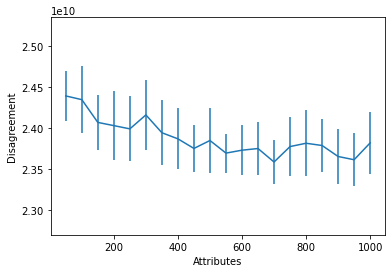

[1.02402, 1.02212, 1.01047, 1.00883, 1.00717, 1.01431, 1.00518, 1.00206, 0.99715, 1.00122, 0.99476, 0.99626, 0.99711, 0.99021, 0.99812, 0.99981, 0.99866, 0.99303, 0.99138, 1.0]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


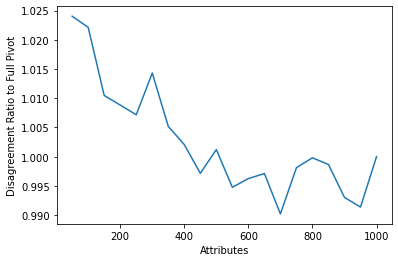

In [21]:
"""
PIVOT PLOTS: synthetic correlated 1_5, 50 to 1000 samples
"""

attributes = [x for x in range(50, 1001, 50)]

scores1 = [[24708758893,24823970623,24368469433,24399997773,24256681073,24171605773,23947256169,24861740441,24251560625,24374124797],
[23708555619,24580028313,23881037255,24465061395,23725082147,24925698265,24769998317,24705945233,24966307593,23651782147],
[24012707675,24579140371,24555595883,23906744677,24010817163,24164454157,24087663489,24691751095,23951079671,24700646917],
[23612145103,23855449507,23757420763,23519544661,24400532497,23414516317,24500556197,23820746941,23443611037,23787010687],
[23848482479,24564555785,23866630237,24064637711,23645311313,23693546547,23660139535,23604702761,24239213219,23719840659],
[24614557723,23362474465,24566178921,24245673755,24715667169,24138391853,24451921913,24102229805,23754712931,23413728825],
[23949522615,24716316611,23443311347,23415978095,23773474677,24806564179,23881651903,24221451443,23504147149,24150483975],
[23436863023,24301176659,23893771911,24882340831,24593156359,24189686031,23775740047,23468087209,24716853529,23754632709],
[24174132229,23388180273,23437112835,24181826345,24872371747,23545108903,23379684491,23648460275,24081879991,23851542521],
[23569577865,23784546719,23598752393,23440151243,23435081915,23353947519,23733681541,23541619075,23342741449,23546248359],
[23530827885,24601100827,23655051025,23801778613,23589264691,24430686957,23760647751,23354663583,23478011951,23463230357],
[23538045069,24676891279,24141215591,23476122885,23856000239,23502906995,23755855497,23802671179,23320637439,23377329901],
[24672905659,23873234437,23408533409,23280501547,24455028281,23551693329,23380282039,23390718337,24125129125,24534009643],
[24644747257,23424242975,24508324653,23503330279,23402905475,23756996423,23805174987,24296650379,23793054171,23571553909],
[23991436303,23900362915,24289405035,24002007469,23764481467,24839496009,23862499495,24537677959,23301787293,24504824613],
[23391760979,23390867093,23722246049,23252491669,23354750293,23435305733,24053380439,24341204363,23441088171,24387050551],
[23977836163,23386873137,23752395795,23480886703,23510064393,24310774175,24321465383,23306601907,23846382743,23502117071],
[23341830337,23311078601,23843624465,24593427023,24032830261,23429830849,24156420861,23548442815,24681715683,23420397319],
[23478793397,24657069059,23586499253,23361568407,24518425507,23756597741,23364851039,23315910183,23879621153,23519853123],
[24331117149,23706817227,23674850929,24709494757,23402876437,23680686239,24198405827,24364594119,23288055485,23336203057]]

scores2 = [[23897677290,24144339890,23871483162,24269154228,24561953608,24543128284,24581941520,24247006266,24839420516,24749416198],
[24396802964,23675692664,24900453866,24552611182,24610039788,24078422176,24870640780,23664662216,23955700974,23775481128],
[23882308566,24019973136,23848251174,24329039932,24091587080,23628965438,23595497356,24525086408,24498677548,23888378046],
[23465031836,24679929242,24951985344,23816269310,24283921938,23738909844,24129616068,23834829704,24330490442,24166879832],
[23813509420,24589545638,23537139514,23401689284,23754382808,23613625624,24406741782,24601684540,23948516278,24426432568],
[24671246322,23430329380,24328025654,23529651674,24150163542,24643018398,23639749640,24776873522,23759765462,23844549206],
[23691670600,23707934282,24016595808,23960919574,23664155674,24067238422,23537547264,23561822774,23497954940,23964071812],
[23406163026,23843721522,23642004834,24541512526,23710945380,23544779668,23683863610,23356170014,23468013698,24624616826],
[23522346034,24726773162,24749130260,23893029844,23760128978,23449957608,23511273440,23479378936,24618291086,23741772522],
[24419892728,23853660066,23384321742,23694262336,23702113854,23722350634,24747174132,24605910786,24539501086,23531516742],
[23544042066,23460816320,23486179978,24201690152,23567234598,23838269372,23319825652,24026487560,23767108794,23699244614],
[24667593324,23774713798,24215796480,23492592030,23584627084,23555006320,23593069234,23507194494,23600720992,23930481556],
[23730315676,23346208026,24439297044,23643094114,23432934242,24824041362,24298635140,23391173082,24283397864,23473229718],
[23545875136,23527379956,23407553294,23415367822,23436084752,24283831658,23326019918,24043114498,23390553020,23500587442],
[24371609646,23546200516,24496029750,23566944696,23703209928,23424566482,24277453732,24626018496,23407261384,23800591958],
[23557702964,23945149120,23377032708,23771425848,23395759908,23719597470,23402816270,24531469546,23764136730,23537501118],
[23509895542,23699966460,23632680078,23682982872,23363187164,23456018640,24757147188,23422604078,24167175722,23348293808],
[23370687826,23444713586,23455381662,23300479550,23420128848,24118137660,23335402268,23772394300,23840580480,23369882350],
[24712872594,23346426640,23878305038,23663098416,24344927274,23308319540,23448729420,24048757924,24305895530,24528501000],
[23446451986,23517304704,23574280800,23808227728,23503690566,24407673496,23472530638,24193601446,23956459576,23762428816]]

scores3 = [[24425258219,24077956607,24350205535,23954972405,24868083907,24100150395,24563982519,24014585575,24322532787,23903274149],
[24836847493,24458871313,24423183577,24001201525,24495150553,23915193435,24435274975,24029266923,23699661179,24031825025],
[23566053065,24322094817,24068530039,24429161601,24905013305,23588730343,24101562337,23914801661,24400170379,24605228791],
[23621643915,24306605809,23798753841,24228859773,24028236599,23854408119,23501852707,24887404481,24615892437,23987465121],
[23797579363,24595017189,23579231093,24458979145,24647536697,24536800423,23785299153,23459809373,23664862853,23600930097],
[24022824703,24127038387,24127271693,24439395737,23631763163,23608357577,23726657215,24430155831,24389781573,23387435151],
[24751086091,24269176801,23376893279,24625917955,23504593735,24128008909,24301657011,24087588727,24694281653,23594159023],
[24657721465,23610988735,23548065645,24116775579,23911071785,23330409991,24544638727,23769967035,23688754547,23611473093],
[23620280823,24286417075,23343599637,23415116983,23425046251,23713296893,23695415075,23419980353,23396153171,23694577509],
[24219956423,23459241815,24586830443,23639122121,24109280047,24051906503,23894228243,23569597095,23501901667,23501462295],
[23565900035,23450165855,23900378513,23709835353,23919892739,23717421729,24860474441,23673294995,23656910581,24527214923],
[23375482415,24173694851,23529457737,23619301729,24577178741,23370795225,24587323661,24188379461,23548349563,23880152445],
[23592239411,23690806075,23648908877,24636167241,23581331605,24692528647,23727845605,24151211021,23400821109,23537120721],
[23703621415,23512863347,24216113555,23512818091,23701445437,23457846693,24527676549,23477949811,23864562543,23826626223],
[24337450181,23371362973,23467441999,23337714925,23375443585,23760264995,23731663073,24615347119,23343738975,23505712125],
[24095871927,24473751879,23339425985,23772251821,24453642577,23540059013,23400781215,24305216167,23818070993,24216612025],
[24214146021,23698149573,23494818411,24274209131,23628971257,24480374395,24051960511,23785276839,23602848163,23519965309],
[23485842707,23360953049,23676612689,23285147351,23307277699,23502799469,24492517989,23400159931,24481857191,23522705281],
[23331225401,23360152563,23647182787,23309636237,23346921001,23520877941,23541420021,23344535561,23738317363,23509611127],
[24866369087,24345735239,23352528007,23437197725,24087098337,23636137735,24781037089,23505661627,23506554309,23767960071]]

scores4 = [[24284436795,24306952971,24933173701,24817553383,24836383997,24079481855,24653529761,24589915793,24212603607,24469811953],
[24348458129,24899665813,24513646227,24882202757,23936358765,24439876789,24190203399,23965665929,24761454057,24905885793],
[24036236239,24500792233,24481358359,23788372431,24174091913,24222356891,24788861889,23764550337,23909997765,24027825225],
[23767965619,24888233755,24677709343,24596615399,24035222183,23586149939,23585612953,24432743443,23511378649,24097680519],
[24101631787,23865902925,23687609687,23521558565,23954340577,24226282025,24164984597,23538888693,24773722105,24459249687],
[23953143763,24060196719,24357637113,23833395197,23780464671,24781329447,23510392159,23724675423,24878071305,24531238971],
[23957126961,23526411769,23646142355,23637227805,24730932643,24901969649,23405882109,23802314837,23908872377,23773578729],
[23580934289,23916498435,23367777601,23706656075,24274436505,23743864849,23649178559,23723393845,24019511603,24209099103],
[23773308095,23598119901,23722140133,24004675493,23720593267,24420684547,23671538753,23955005075,23890823269,23363294803],
[23790200177,24260500177,24401351739,23623437371,24589138249,23357830147,24057455957,23448416855,23695197501,23538670307],
[24670988543,24014311611,23763067195,24404303173,23642980353,23656878731,23452797843,23374189477,23432257231,24009612443],
[23731035529,23602009851,23374129915,24508072301,24072649571,24398110883,23423038515,23712957701,23707346759,24069628773],
[24012464133,23574743739,24747901819,23629455685,23757697065,23644990749,23419123547,23847188693,24586731399,23671062221],
[24494833647,23354409223,23705184639,23452886023,24034113129,23335513265,23345586631,23332742281,23353171419,23810601833],
[23317601247,23909921929,23317448179,23882152489,23455542095,23392163457,23479118115,24134023021,24097075443,23620606743],
[23694918975,23367728897,23357698465,23666023851,24654577617,23605690777,24413186359,23732256819,23857875777,23413742727],
[23593295713,24024817315,23850592515,23785208847,24521683969,24297969031,23851551837,23936399759,24663290191,24415997711],
[23903241847,23695336837,23293605309,23640927187,23680157483,23450911521,23457063311,23696722321,24384518039,23460473669],
[23389603401,23860831489,23663329173,23764943825,23429294829,23383966467,23932256015,23453537949,23284984015,23337892091],
[24585052637,23480787053,23829112863,23335132559,23641269015,24017805707,23473087809,24395828877,24634999413,24457829077]]

scores5 = [[24444531261,23964869929,23903532697,24211159733,24394568457,24920390665,24845459951,23966693159,24879247485,24574185459],
[24580460211,23706769607,24627099357,24466659707,24904808149,24235759907,23976935817,23916357379,24794954013,24690679323],
[23639742257,24314356487,24170127683,23984849131,23923420341,23414141503,23606604677,23651276507,23500953235,23660127921],
[23439550381,24795920055,24071536625,24547100135,23430961023,24383772249,24060753249,23663903479,24770637465,23764170539],
[23492295307,24503928811,24705929269,23916463731,23665011183,24751380491,23817976771,23540913865,24645059547,24746488453],
[23541141143,24731208525,24298703829,24530871303,23563582519,24736218825,24575962217,24654347413,24757376287,23811555225],
[24676245371,23574283191,24215921469,23463432013,24133850515,23856719685,23449951601,23982844463,24767522223,24346182011],
[23619441383,24904109653,23776138677,24041013705,23402127815,24549137535,23885136547,23464546751,24215307775,24295446823],
[23337499701,24364096055,23959326045,23635008791,23368985455,23796666717,24350839137,23838920041,23792624121,23591591241],
[23695428161,23444342551,24573652223,23767260515,24170731669,23450146163,24716659595,24219475961,24840299927,23769607303],
[23495126969,23590237001,23342979995,23852463221,23909014753,23416760371,23732198671,23534609895,23705164853,23369149285],
[23773015925,23382570585,23601671635,24064298193,23493627137,24628554357,23430914067,24200152147,23469871059,23416666023],
[23608621589,23605482371,23358646709,23517848017,23662829275,24194532127,24488187621,23811150447,23351011867,23409563977],
[23316125313,23430245093,23456754061,23753668067,24306091247,23396810323,24598082883,23360595115,23421179121,23315115457],
[23586322049,23770583023,23327028413,24026438987,23409262425,23445383827,23895226389,23500809705,24735377535,23876380303],
[24665677325,24592294821,24713613513,23400457243,24611087843,24590281713,23701015125,23370486377,24044108287,24169952587],
[23731988431,24252862233,24379460487,23296962143,23397849379,23975712233,23856786219,23365852633,23514648543,23657102051],
[24584921041,23447107667,23837208021,23431526563,23462948333,23884442651,23394983517,24022276993,24453532281,24180750623],
[23550303589,23552675347,23331272829,23925843579,23374705957,23387542521,23728434493,23450729317,24133962523,23379788401],
[24075863465,24016173209,23654457793,23879661723,24413510343,23458998371,23602159129,23292956453,23675965807,23416624991]]

scores = [scores1[i] + scores2[i] + scores3[i] + scores4[i] + scores5[i] for i in range(len(attributes))]


plot_scores = [np.mean(remove_outliers(s)) for s in scores]
err_scores = [np.std(remove_outliers(s)) for s in scores]


# plt.title("Pivot: 0.5 Mean, 0.1 Correlation")
plt.xlabel("Attributes")
plt.ylabel("Disagreement")
plt.errorbar(attributes, plot_scores, err_scores)

plot_ylims = plt.ylim()
print(plot_ylims)
plot_range = plot_ylims[1] - plot_ylims[0]
print(plot_range)

mid_val = plot_ylims[0] + (plot_range / 2)
plt.ylim(mid_val - PLOT_YLIMIT5, mid_val + PLOT_YLIMIT5)

plt.show()

pivot_change = [round(plot_scores[i] / plot_scores[-1], 5) for i in range(len(attributes))]
print(pivot_change)

bound_check = [pivot_change[i] <= multiple_bounds[i] for i in range(len(pivot_change))]
print(bound_check)

plt.xlabel("Attributes")
plt.ylabel("Disagreement Ratio to Full Pivot")
plt.plot(attributes, pivot_change)
plt.show()


(7697747140.291655, 7932759544.313378)
235012404.02172375


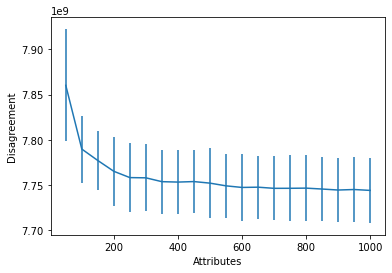

[1.01497, 1.00589, 1.00426, 1.00272, 1.00182, 1.00179, 1.00124, 1.00119, 1.00126, 1.00103, 1.00065, 1.00042, 1.00046, 1.00029, 1.0003, 1.00032, 1.0002, 1.00005, 1.00013, 1.0]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


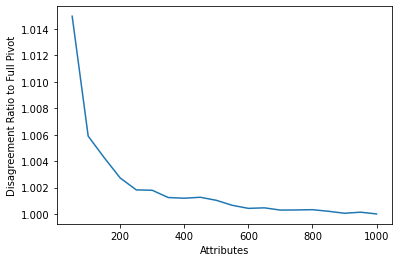

In [22]:
"""
PIVOT PLOTS: synthetic correlated 3_1, 50 to 1000 samples
"""

attributes = [x for x in range(50, 1001, 50)]

scores1 = [[8377787595,7817311319,7896712141,7795627465,7810640505,8104582695,9552255513,7797633165,7836108439,8759710915],
[7738982017,16527338853,7743372403,7757837167,7748474521,7779913499,7740558249,7749724151,8267232009,7746700495],
[7753540481,7764474779,7741259501,7751450421,7730853339,7742075775,7732306437,7744930041,7776684901,7740291741],
[7730015901,7723717847,7725105109,7731970797,7726338411,7725515363,7723407085,7731455029,8212398173,7759973223],
[7724030541,7756692793,7776196691,7721760123,7720909865,7724681101,7760117795,7722931907,7723529615,7724801495],
[7728545961,8137078391,7719248871,7719435443,7718856513,7777014513,7722695725,7720835015,7719985677,7720789139],
[7723483705,7722254455,8114668693,7722091037,7724058411,7714644969,7719860339,7718227943,7720798021,7719188745],
[7718944839,7721492329,8060584203,7719179535,7715089825,7738072457,7715200585,7714359433,7726381595,7723305323],
[7731395523,7717304447,7719395919,7713697343,7862747191,7805747689,7727016829,7715473695,7714316271,7721397999],
[7867444093,7717207471,7713152265,7726551313,7719701525,7720494639,7722865551,7713406113,7722318623,7716153161],
[7711642157,7719773417,7713373447,7714070511,7713088763,7738070489,7712486993,7712773169,7709776019,10642528443],
[7710062791,7711135291,7711372767,7711722717,7712304745,7720912127,7711226827,7725156005,7712942803,7719878189],
[7870428621,7717405501,7717571013,7712197555,7766825939,7715375237,7714190049,7712184001,7713853681,7712781883],
[7757267183,7709337189,7708910285,7711168563,7734855341,7711620281,7710325391,7742685719,7712601529,7710859785],
[7709046121,7715850993,7709835527,7709248873,7717529003,7708728599,7716878407,7711172715,7711805675,7710368099],
[7710874831,7708595783,7709395291,7721162855,7709913471,7757145443,7710155023,7709220663,7711436409,7708154489],
[7712333637,7710116743,7716666249,7713629601,7782566871,7708334199,7711290391,7709660981,7715625883,7709693189],
[7708224987,7709598489,7710800133,7835240067,7710309001,7713820287,7714622441,7708341815,7709838509,7907585489],
[7709101389,7731151397,7709087965,7710067343,7708564499,7711798963,7710379623,7708557911,7711067987,7824040079],
[7709080189,7707961665,7714269565,7708070681,7708214611,7708516195,23700994615,7711175719,7708000795,7709023095]]

scores2 = [[7910329416,9876831752,7888881616,7908484346,7902693316,8443359560,7904093860,14618247012,7905830134,8659863656],
[7946992854,7860609218,7854421104,7855857310,7849070962,7839424994,7864523890,7848952800,8032937608,7854940798],
[7836823434,7839449176,7840643780,7835717116,7931937752,7837326092,7839712912,7835689636,7835913888,7871174098],
[7843570576,7826640446,7831478308,7842405184,7830155756,7836025572,7833103032,7971195790,7835885810,7856578368],
[7870038654,7825184920,7899099682,7826101984,7830667094,7823532932,7824680740,18813089068,7837593152,7831469210],
[8005065448,7824597288,7825586246,7838601720,7822010488,7829856390,7828149514,7822137866,7843965916,7822611200],
[7821177086,7900060308,7824530034,7821377550,7872471810,7820386812,7819446722,7821846954,7837065960,7820480082],
[7823338938,7820222146,7823274992,7818494976,7819056104,7817542040,15891713528,7829204184,7818965282,7821090758],
[7815313188,7820278378,7819490622,7826993852,7816850268,7822400648,7819192284,7823403914,7818012054,7818210138],
[7819228252,7816470514,7847286964,7824237330,7831975048,7817327564,7825107948,7868006796,7978864944,7824332330],
[7817970232,7816250778,7816518490,7816654688,7817905794,7828665404,7813956640,7815452168,7818874418,7814690072],
[7815621434,7819575506,7818626000,7839348240,7816752106,7815195296,7819797792,7816869920,7829649762,7814958690],
[7816449088,7814848166,7815323138,7813199788,7817622112,7814117268,7860845836,7814768766,7892498450,7815604918],
[7813161916,7831190358,7813010920,7815039222,7814592574,7830132234,7814257228,7814039134,7839962426,7813730970],
[8334574890,7827690250,8421446532,7816347696,7814607190,7812940572,7814070518,7819529454,7814033714,7814798318],
[7815174320,7813283044,7932052384,7812669728,7820744994,7818474820,7818778932,7813246952,7818659904,7812702752],
[7833038188,7814806000,7813880116,7828378884,7813049272,7813158248,7813972668,7812726726,7818746172,7813305910],
[7817798332,7813512724,7812418294,7812060380,7814893018,7812356934,7813363214,7812715378,7818450464,7813010710],
[7822249766,8148068358,7813231484,7812047656,7812004452,7819710900,7813410508,7812212362,7812051844,7815189198],
[7812123248,7812881174,7812120404,7831685612,7812930280,7812884460,7812241520,7817541150,7814717472,7890822842]]

scores3 = [[7794462624,7829618786,7822558226,7804565678,7796075906,7798221960,7847029604,7808434016,7828178156,7862457942],
[7822190386,7814892352,7775435198,7777645558,7786308202,7764014904,7770221122,7782312504,7774542454,7798789334],
[10163667074,7755577662,7760456886,7819556536,7759926368,7758577766,7766345052,7763825020,10895135304,8052400876],
[7747153168,7748219520,7753430478,7752019462,7747403110,7759167868,7750738326,7763540124,7777059180,7970922180],
[7747197858,7744481164,7752512372,7742847716,7745470242,7747836468,7747975668,7748171174,7758498348,7748926052],
[7744754266,7750167418,7742905646,7770653914,7743994390,7752731398,7742623080,7765895976,7764594230,7747644500],
[7745633340,7743502116,7741942546,7741394610,7743040404,7739999744,7754593914,7808085264,7739327344,7743245066],
[7746470432,7744038542,7763641580,7737887936,7738854392,7743419578,8101499488,7740503736,7743640372,7750737862],
[7784713380,10341332898,7739197108,7747684702,7743541150,7763205750,7759798924,7758175784,7738213550,7740678190],
[7739347096,7737341208,7741026352,7747654924,7738063784,8550832966,7755832284,7740814158,7739651286,7735722498],
[7881044098,7746865944,7736871280,7737630070,7738521694,7760961660,7742859406,7735824790,7737049234,7736091366],
[7735989774,7739728190,13235324142,7734925754,7744366148,7738785692,7738956974,7736054746,7912028456,7736033966],
[7734717264,7735113714,7736412056,7737034694,7737966308,7738839960,7738534806,7740198192,7994928146,7740274884],
[7736979426,7734654658,7736394428,7741902014,7735606260,7733777286,7744557250,7736030292,7738892348,7757452250],
[7737948742,7734007098,8392345434,7740119012,7734584924,7740180668,7733884410,7733770420,7743854730,7735450226],
[7734807224,7735045274,7745967890,7734033382,7739601092,7744994626,7733466092,7733930170,7736698690,7733866314],
[7734896966,7739083876,7736303168,7736891120,7733809780,7733432438,7741519174,7737300350,7736625584,7743399806],
[7734871092,7734785914,7734207196,7736472562,7734861072,7734387712,7736227626,7743267134,7734391048,7733657532],
[7737056486,8005370006,7733217722,7819254594,7733076760,7733452434,7745460992,7825775684,7733327796,7735716328],
[7732928000,7748572368,7735963242,7772568292,7734812044,7734819872,7735690532,7734928000,7740813694,7733213786]]

scores4 = [[7809132001,7808950239,7795913837,7853935869,7820655751,7804556543,7826547333,7863687409,8012907211,7815871863],
[7770115125,7766846889,7792357481,7813148773,7772831435,7778421335,7763184745,7934013927,7762622605,7822499749],
[7931067541,7843414785,7766481209,7796915501,7758863023,7762080543,7756776777,7782726817,7757197821,7765086739],
[7748853087,7752022855,7785133777,7746650019,7752561631,7750097673,7746642345,7747146763,7742126315,7763646413],
[7737706857,7738546005,7740883745,7769227881,7739782979,7741645871,7745625755,7743739259,7744297253,7741217755],
[13239706647,7740069843,7746687183,7736396455,7755615847,7745452551,7738416297,7740607953,8096241061,7749377849],
[7735801691,7739834741,7816728765,7735891619,7737689879,7738325439,7768174261,7743986637,7735500161,7749824313],
[7734637835,7735114861,7734163471,7740761263,7740808507,7748982025,7739245845,7737870299,7734639433,7738637615],
[7733072113,7735273387,7739420751,7735363133,7735341139,7739932697,7734129893,7735024407,7735011701,7735447231],
[7735801387,7738086913,7734847533,7741800659,7739198963,7733940197,7737299213,7733325403,7734568245,7732083063],
[7779709555,7731508421,7733281769,7789462175,7735331155,7732096355,7734835275,7731324027,7737265679,7732555711],
[7735317237,7732642827,7732086961,7733194443,7730829121,7731275559,7731417821,7734238851,7737173453,7736601621],
[7734114155,7732869761,7734880675,7733178517,7731627553,7730647365,7735614943,7738399439,7734433277,7733731489],
[7730443631,7731255393,7734505149,7732192769,7731397607,7810632633,7730359601,7733621405,7734757061,7753090521],
[7730213855,7736692773,7729831787,7733943839,7735776655,7730893879,7735419207,7732138133,7738003171,7737720855],
[7731894183,7730310287,7844788529,7730783633,7730270789,8576272949,9092661193,7733894709,7735189581,7749435157],
[7738164379,7761382623,7888676631,7731959821,7732589873,7729521551,7732646293,7729019239,7729954253,7729611203],
[7730241845,7734786185,7730346371,7729727691,7735021421,7730194873,7734161261,7730406257,7751289517,7730125557],
[7728895175,7734809713,7729041949,7729421815,7731351561,7728830647,7729722109,7731100461,7734446351,7730996971],
[7732590029,7728761943,7729890033,7731705699,7732551069,7729102141,8271576875,7734197283,7729692699,7741850425]]

scores5 = [[7831363035,7809796433,7811914465,7810977201,7916208659,7798594873,9231355359,7872686357,7845064447,9195419009],
[7767818569,7767889009,10622370629,7790584187,7780356855,7762013589,7779810311,7775352035,7785420941,7767197801],
[7759264419,7798237959,7763313783,7763409583,7758566479,7761418261,7758639671,8131769269,7767218425,7753524809],
[7778900673,7760976319,7755674077,7746916817,7745622159,7753550601,7753513577,7923681945,7749897693,7758076389],
[7753881903,7744672113,7745043799,7742563503,7743092559,7743331049,7746022913,7779937671,7743344587,7742189709],
[7747644829,7740195155,7741292065,7743842585,7737101435,7741601925,7748005673,7745544119,7757404015,7739760275],
[7748624671,7738299027,8226600777,7740136509,7739907017,7744820487,7735940579,7745280839,7741363977,7736665561],
[7737401829,7740452987,7739805465,7743009397,7736932221,7742223441,7901044933,7755751527,7739370485,7743768245],
[7735002031,7735946909,7736160497,7738282389,7734216707,7843325611,7738446509,7737463975,8601778305,7742697521],
[7737556913,7745846621,7735185139,7734121079,7737725053,7737013367,7739755843,7736534897,7737793355,7735834043],
[7750850631,7735856371,7734066263,8152010841,7735593309,7734078013,7777041981,7737734899,7742062589,7765884533],
[14197993029,7733268659,7732237437,7755325057,7732311197,7732940993,7733627623,7734967563,7734674943,7738574221],
[7747838659,7733224603,7737508855,7735714467,7733101415,7733672113,7735090997,7736371197,7734650953,8385187577],
[7733926675,7732359399,7732395225,7735462593,7768012979,7764665469,7738661401,7734519769,7735986643,7731095201],
[7732129741,7732994841,7733714079,7734687355,7731049371,7734310513,7732315039,7733104497,7768478539,7738556201],
[7731998811,7738196637,7732352617,7731344693,7739876325,7735583057,7738022917,7747940549,7731532273,7732374677],
[7731094799,7733982659,7730777177,7757143667,7796615697,7766218393,7732162291,7731841913,7731009893,7730751407],
[7730797169,7731235607,7731421317,7730810079,7732694497,7832419535,7751840915,7793750225,7734805851,7731832243],
[7731212747,7734957617,7731768927,7745293445,7731009189,7735053755,7730695021,7740345893,7735839609,7730537933],
[7730572125,7738911653,7734354359,7730919155,7730899089,7730391121,7731586717,7730889333,7767039963,7730329655]]

scores = [scores1[i] + scores2[i] + scores3[i] + scores4[i] + scores5[i] for i in range(len(attributes))]


plot_scores = [np.mean(remove_outliers(s)) for s in scores]
err_scores = [np.std(remove_outliers(s)) for s in scores]

# plt.title("Pivot: 0.3 Correlation, 0.1 Mean")
plt.xlabel("Attributes")
plt.ylabel("Disagreement")
plt.errorbar(attributes, plot_scores, err_scores)

plot_ylims = plt.ylim()
print(plot_ylims)
plot_range = plot_ylims[1] - plot_ylims[0]
print(plot_range)

mid_val = plot_ylims[0] + (plot_range / 2)
plt.ylim(mid_val - PLOT_YLIMIT1, mid_val + PLOT_YLIMIT1)


plt.show()

pivot_change = [round(plot_scores[i] / plot_scores[-1], 5) for i in range(len(attributes))]
print(pivot_change)

bound_check = [pivot_change[i] <= multiple_bounds[i] for i in range(len(pivot_change))]
print(bound_check)

plt.xlabel("Attributes")
plt.ylabel("Disagreement Ratio to Full Pivot")
plt.plot(attributes, pivot_change)
plt.show()


(16836723726.178076, 18027352394.416313)
1190628668.2382374


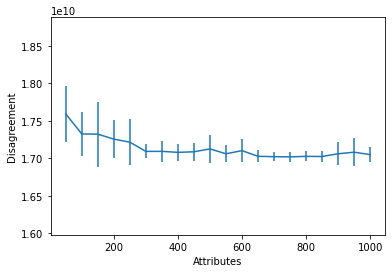

[1.03182, 1.01617, 1.016, 1.01212, 1.00972, 1.0025, 1.00256, 1.00177, 1.00222, 1.00447, 1.00066, 1.00311, 0.99868, 0.99839, 0.99823, 0.99863, 0.99855, 1.00067, 1.00189, 1.0]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


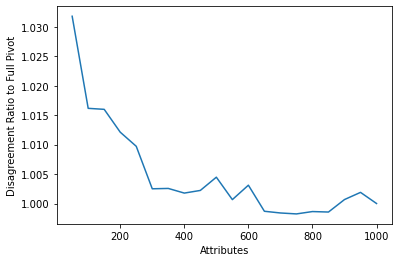

In [23]:
"""
PIVOT PLOTS: synthetic correlated 3_3, 50 to 1000 samples
"""

attributes = [x for x in range(50, 1001, 50)]

scores1 = [[17385636226,17354076924,17315062636,17491587924,17384014532,17352643962,17682364114,17330949038,17240438216,21600441772],
[17161564178,17427830990,17531572510,17184051256,17162929456,18301027572,18030104876,17118142930,17686294628,17268065686],
[17068056518,17399847454,17155694686,17074030454,17313070518,17356626754,17056865432,22093075160,18465984494,17276698918],
[17140370140,17187837860,17042777202,17307068258,17166787260,17054180468,23958034202,17085820238,19235069976,17222759678],
[17052409782,17099041558,18161123184,17753154036,17079475980,17693710296,17295568352,22129350036,18766376314,17238590598],
[17147125484,17130847032,17864778690,17043815098,17150528880,17059003230,17037266024,17139448310,17030158406,17205291786],
[17024328806,17065723590,17556873010,17771891120,17252849638,17178547726,17051388620,17428186390,17391081514,17191137650],
[17249395828,17094489350,17067100896,17125353642,17099201080,17380833604,17065907912,17179918204,17140526564,17055948520],
[17950676446,17085567282,17007305410,17345651336,17006845226,18002580402,17047038934,17131735190,17011141026,17031818842],
[17105684560,17008866620,17783742934,17202099232,17153327328,19582032826,17012463544,19373179356,17189585474,17354671834],
[17053917992,17189122966,17006273126,17061631516,17798829900,17032855804,17009467338,17012908578,17030810424,17003004106],
[17651410514,17006470164,17022215932,17235982066,17059562884,18651989568,17224476490,17015900820,17072243440,17220764648],
[17660768610,17019998472,17046873176,17007208570,17004425484,17027417914,17020152680,17037386550,17288532290,19097792638],
[17013355614,17045811454,17017332360,17026182844,17027730026,17002110096,17168090042,17126608108,17035050896,17731215306],
[17018291734,17618634196,17366525010,17007220352,17094697802,17032771414,17030571038,17063876508,17059935216,17238664518],
[17053844160,17039852544,16999403416,17042297556,18388349756,17024406218,17047204924,16997818660,17009823506,17160563542],
[17055675248,18097931606,17013930918,17066680408,17123683660,17006243620,17010821368,17022612058,17140081890,17045376204],
[17123880544,17166995506,17000224330,17163069908,17001279552,17037941980,17007063632,17014610766,17100723988,17049824696],
[17018599978,17667423660,17624938312,16998751132,17014771816,17005318334,17013309192,17011128190,17015585118,17002741942],
[17072997946,17093920260,17019844740,17123536488,17009463182,17042341298,17180695226,17561146510,17017491168,17013829760]]

scores2 = [[18230972667,17424017897,17109704991,19287866673,17475271505,20162122999,17715906445,17256564599,18583879173,17811327853],
[16977806511,17105617783,17010881637,17520750061,21542945385,17570033763,19344596223,17409388923,17308249611,19286101149],
[17062005341,16986339859,17066970839,17580297279,17111321007,17050935465,16933769023,17000597055,16938527411,16946574313],
[17616440589,21875127533,16926075375,18880590511,16983059381,24316643495,17515225867,16922366613,17060164029,17005515993],
[16900511131,19835184647,17008021757,16949886885,17086571317,17046433759,16941109511,16997830531,17059266469,17711550983],
[17289679997,16991196335,16914090275,16892362891,16991644451,17086312887,16921808211,16956855355,23193152445,16913939455],
[16893527839,17491815619,18835415193,22802410035,16889994439,16948017083,16919357785,17457825745,16904564979,16919785137],
[16974579247,16974723107,16890309509,16895511185,16914436229,16939611383,17190110037,18250636647,16881887193,16994681013],
[18507938981,17216919867,16890204853,16882757271,16984175885,16884062869,17004653979,17027287865,16871944933,17004073373],
[16896067787,23918608191,16894368675,17384311065,16900015709,16910829097,16927719913,17348695647,16972528331,16904665321],
[16875978729,16887333297,16887002025,17298227937,20605363071,16880481865,16915412503,16926692605,16910721875,17023751053],
[16877483179,16990075725,17671052807,17017884371,16887064013,17023604011,16879605559,16868844513,16872222343,16978862391],
[16889618847,16934853973,16974790487,16912611697,16913884269,16912086709,17039199839,16874067151,17531459949,16868466749],
[16895981753,17125370757,16888365641,20267907965,17126854219,17298257113,16866097149,16944439695,16881532899,16875604165],
[16869273273,17218658451,16978725617,16912333323,16872912743,16909981683,18636264895,16887976417,16875451323,17188568069],
[16985260141,16864836821,17226280379,16976631307,16906692059,16887489153,16883006967,17060156037,18825817493,16877670493],
[16948807899,16921485555,16975764207,16913310821,16896119953,16890225421,16933223995,16901751539,16915775895,16869261449],
[16865201205,16882538315,16952333529,16895633895,17275072613,22474519639,17048145755,17510247813,16885630429,16988045037],
[16888410305,16886176375,16869640525,16927347043,16893114831,16925540173,16880950815,16878299247,16953202699,16871881215],
[16878470513,16927581313,17380453837,16877112413,17000985447,16890923241,16864974529,16905779763,17052252037,16890657713]]

scores3 = [[20221232716,17220280450,17258971616,17233688044,17362788708,18039268366,19357495382,17355169586,17359783940,23811324538],
[17172775772,17349355758,18621696762,17104574836,17232394236,17188899212,17220765582,17070674856,17441280072,17177564328],
[25986843084,18813944254,18503549106,17112838180,21638921226,17058161488,17065413650,17649790474,17566440332,17212896044],
[19422256426,17998963592,17087819638,17049337070,17124339248,17688145128,17264765744,17143529830,17348843398,17059748126],
[17153498364,17108546872,17040052110,18823562736,17074783580,17287027682,22144095008,17038740554,17072533278,19070893576],
[17224737742,17038082398,17030011034,17298675536,17011185008,17237248068,17050052870,17060361026,17423398816,17140603364],
[17025636400,17087830662,17020824368,17024436134,20116006370,17058810502,17016502044,17102484646,17113025864,17017433718],
[17272296362,16999916900,17046918622,17490579668,17001255562,17144596684,17139699410,17020100522,17146559088,19013389162],
[17183465358,20559203454,17067796822,17099804566,17287019406,17150230570,17069873896,16994008852,17013968478,17055234392],
[17093215054,17008814092,17021591518,17081191316,23610795334,17090072644,18365450072,22423534686,17083350158,17330556242],
[17794952330,17103528302,17022563358,17119315682,17025139350,16989146672,17397720916,19457111534,17145307218,17265308628],
[17367760830,17432444014,17906405402,17191869706,16991319312,17011072896,16997416462,17135553224,20803032144,17149198502],
[17052434162,17576865646,17025744370,17545984278,17010569084,17028951940,16992816068,17069343702,17012265704,20846310332],
[16990826838,22075162256,17023749862,17010892302,16994816030,17180234566,17712003586,17163782364,16995042494,17028758696],
[17038918834,16986963974,17161392186,17020967366,16994115158,16989381114,17076514092,16991712130,17835605078,18288341728],
[17064873090,17079063668,22777301752,16985823940,17013797286,17002063306,16998860668,17429461298,16986145614,17010950876],
[17038733246,16984117534,16989196560,16992865950,17259821538,16995225422,17166311362,16987075178,17869387594,17181440334],
[16987133828,19229399116,17008976854,19193036800,21958523568,17451857290,17140984022,17201871120,16992757140,16997081400],
[17150804738,17123160688,17117194746,17146481124,16987312760,18074067386,17363586104,17057583894,17010984324,17013575036],
[17015282342,16998881136,18994796434,17023766208,17155476968,17030672166,17276115882,17036500518,21100152738,17010331690]]

scores4 = [[18063378392,17292364840,17336676090,17653519220,17462654710,17178777776,17818507076,24726901626,19016963836,17372170556],
[17146128164,17103573330,17788111308,17084134420,17146875606,17249588244,17061665438,17181405670,17211550298,17138130956],
[17333288744,17066446100,17183689742,17415936766,17099279298,17038370468,17209487784,17091276178,17200387590,17622166170],
[17131390376,17022225250,18826798276,17153515296,18614399334,17059889104,17119434242,17015187976,17114900426,21758692748],
[17212675870,17081023096,17308695598,17012592410,17203998754,17263316764,17048238028,17077761002,17019466236,17175626850],
[17120540618,18047255894,17135175446,17051474924,20131774120,17979012662,17023337598,17065097226,17016088166,17061849800],
[17053182926,16990349934,17006697818,17285421644,17893024524,17036264938,17082131436,17131513154,17173478014,17019831714],
[17197675356,16996922184,22891424326,17158013644,16996099124,17021131384,17013221442,17126527992,17056894298,17199261262],
[16995330620,17040883168,16978160474,18103691822,17006652072,17156498586,16976216336,17115068772,17028450288,17156592916],
[17509744460,17177696734,16975755478,17030107284,16986842214,17077211896,17093983696,17041429780,16974419926,16980831490],
[17080743746,17029386688,17067232062,17127958162,17064207560,17012693442,17640630882,17046212100,17156796974,17008494686],
[17130164484,17116160178,17124584906,16980856406,16974650874,17019083678,20059485688,17059112784,16987996164,17041092086],
[16994688080,17054475690,16977046814,16974720536,17003828094,17040595892,16979707236,17020023492,17060088328,17041820350],
[17040788534,17297317718,16975590830,19734954988,18272803254,16996173490,16972449188,17673729486,16975092130,16978479506],
[17163936072,16971915600,22397802622,17054661726,16989817534,17015856634,16969864552,16966952182,16968755348,17653397352],
[16980616000,17077048908,16986427380,16991636318,17485030672,16985836854,17056017770,17327168020,16967724664,17063465074],
[17321307988,17021065766,16977315356,16979330632,17009136654,16974040122,17284716540,16984369084,17643927570,17166316522],
[16964556656,16989713700,17122258022,17083132334,16974684874,17847020064,16976172278,16975698096,16989612934,16974327102],
[19391523924,16985160366,16983705408,17432045910,16998587942,17226689084,16981695438,17098881856,18283063834,16972939250],
[17054853232,17051050302,17073864662,17155235644,16975273748,16979344832,17212622272,17944764276,17024201072,18612843204]]

scores5 = [[17481865271,21044149855,17915881067,17926390783,17518737193,17518218125,17306251133,17327796539,17523598415,17732936425],
[17168997859,17243241567,18522314083,23216786663,17294267915,17134337237,21697888357,17225381613,17130218769,17273530949],
[17239786649,17106381077,22029518023,17360999933,17096223933,17137543237,17253886695,17129485545,17350444565,19604845557],
[17080894069,17092927845,17177698433,17433460957,17112559317,17137868329,17286964621,23760245371,17755169241,18090953229],
[17071626235,17144248519,17153417767,17124028429,17164267651,17174827773,17248125091,17112086843,17196438641,17058470685],
[17109314109,17072751655,17196766815,17069690027,17184562983,17086928905,17260712049,17085320941,17101831721,17506546531],
[17188382935,17125303051,17957806529,18192687027,17095575525,17058926737,17057589559,17056292055,17100346437,17070810167],
[17079759281,17064992841,17038418943,17053111423,17039325153,17102888717,17053284371,17034054131,17128828903,17096032545],
[17048591201,17051750105,17104565209,17056128539,23850029493,17536010731,17325684387,17202031285,17087103261,19593200753],
[17219573927,17046886213,17989872871,17053836561,17826700675,17461341475,17136234787,17213270523,17360035545,17088705721],
[17082576391,17072211549,17028658591,18793480559,17028668307,17104704785,17037781837,17089662633,17269192063,18047950373],
[17102864967,17055016895,17403328877,17094519481,18095217541,17028432307,17033662007,17481582537,17040739755,17201462559],
[17713262205,17025270793,17105821879,17080199991,17225418945,18329143127,17030803175,17029875949,17077303219,17176947747],
[17035250027,17221512699,17095321927,17032678275,17066810281,17295515859,17040347637,17034725447,17126210201,17036386679],
[17047590113,17034602937,17164775249,17030361903,17051077305,17021684965,17026631549,17656007025,17377977837,17037172355],
[17021909597,17214201089,17028091249,17126967977,17358815841,17026769099,17099057769,17112437599,17053828745,17041711331],
[17142094463,17231890431,17030880947,17046514167,17553832149,17106273241,17039983481,17344585701,17024751609,17042777129],
[17018102475,17021851831,17041300289,17023617269,17166289415,17064513181,17064077233,17037948755,17030693897,17024938863],
[17462259927,17033499411,17465997751,17034823465,17395146781,17183071579,19039658427,17038523289,17685586949,17152317075],
[17127035629,17028505709,17145904209,17651540377,17328627609,17046257129,17022801661,17354266795,17077636151,17096447569]]


scores = [scores1[i] + scores2[i] + scores3[i] + scores4[i] + scores5[i] for i in range(len(attributes))]


plot_scores = [np.mean(remove_outliers(s)) for s in scores]
err_scores = [np.std(remove_outliers(s)) for s in scores]

# plt.title("Pivot: 0.3 Correlation, 0.3 Mean")
plt.xlabel("Attributes")
plt.ylabel("Disagreement")
plt.errorbar(attributes, plot_scores, err_scores)

plot_ylims = plt.ylim()
print(plot_ylims)
plot_range = plot_ylims[1] - plot_ylims[0]
print(plot_range)

mid_val = plot_ylims[0] + (plot_range / 2)
plt.ylim(mid_val - PLOT_YLIMIT3, mid_val + PLOT_YLIMIT3)

plt.show()

pivot_change = [round(plot_scores[i] / plot_scores[-1], 5) for i in range(len(attributes))]
print(pivot_change)

bound_check = [pivot_change[i] <= multiple_bounds[i] for i in range(len(pivot_change))]
print(bound_check)

plt.xlabel("Attributes")
plt.ylabel("Disagreement Ratio to Full Pivot")
plt.plot(attributes, pivot_change)
plt.show()


(19205862894.130486, 21854338295.762344)
2648475401.631859


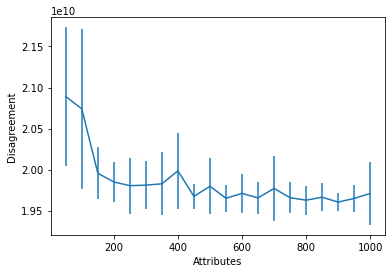

[1.05994, 1.05234, 1.01248, 1.00711, 1.00482, 1.00514, 1.00597, 1.014, 0.99819, 1.00446, 0.99701, 1.00006, 0.99726, 1.0031, 0.99738, 0.99586, 0.99766, 0.99466, 0.99693, 1.0]
[False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


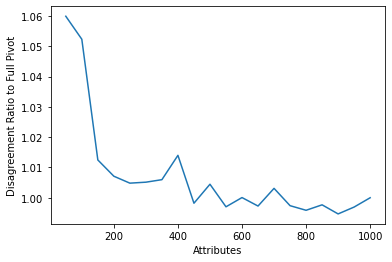

In [24]:
"""
PIVOT PLOTS: synthetic correlated 3_5, 50 to 1000 samples
"""

attributes = [x for x in range(50, 1001, 50)]

scores1 = [[19906841505,21847459325,20429203115,20304780555,20814662669,22117696565,20235846719,23878075277,21228794485,23564308223],
[20660388431,20147704139,19857033493,20114568397,21821829207,19698862235,21467251541,19878624513,19839874011,21162738943],
[19792249125,19853867855,20646106893,19516802915,20977613145,19576235115,20364522529,19618976681,22149317441,19880033557],
[22784416981,19646954957,19499983649,23859640411,20967180169,19531351691,19729273893,19588718491,21458445259,19496718993],
[19570333949,19643462263,19619492933,19519637411,19541470531,19500892251,19629624213,19978260231,19522232601,19584091093],
[19606541643,19460085825,20182777929,19697560197,19556713587,19646903931,19491580313,21052912151,19487917083,19484646061],
[19475047247,19463935385,20732525783,19470539179,19710852465,21905359455,22816281119,19563037131,20340711961,19597149341],
[19878463271,20168242919,20411131605,20222312077,19655652825,21578478967,19495994961,20117098307,22784816955,19542945191],
[19454805353,20001476579,19823250475,19607063183,19692841079,20091730431,19570327425,19664144569,19559196277,19454346429],
[19535229709,20264187221,19691435277,23385350107,19467725121,20310621303,19536252259,19600937275,19917565883,22751770445],
[19690739617,19885028535,20458383513,19465380825,19496467315,19514395587,19593148991,19453400719,21181585165,19697655679],
[23434037569,21821188941,19464914391,19517514225,19448756603,19591457921,20065384483,19522325655,19471097179,20379171355],
[19447593227,19966376917,19439286597,19450008215,19449968111,19514248771,19469495469,19776429033,20356549135,19467302207],
[19487285619,19468455109,19481961709,19824134777,19541593041,20859570833,19474482423,20267714037,23814950065,19531487109],
[19441403211,19623419443,19438370809,19511975429,19517587785,19487478671,19623116405,19635051267,23596284145,19475693299],
[19469765057,19429607443,19431730289,21936711507,19491139037,20089866217,19445687823,19691090139,19718655689,20168532033],
[19480862395,19504331449,20075408005,19657194013,19733650323,19920635177,19577632147,19462944047,19741542687,19473185205],
[19686809445,20262452793,22232523155,20742085391,19453610223,19447100947,19600652243,19454931521,19443306255,19465703767],
[19565856745,20467935365,20581973175,19453582079,19445181927,19594958225,19481038419,19538450363,19611789205,19860088085],
[19486549091,19436762167,23441177057,19476480809,20356783669,19483450633,19479002679,19440922149,19511327839,19469867401]]

scores2 = [[20418312312,20373405542,24228108894,24388041428,19933518052,21112546442,24412156314,20109052366,20465042896,23285377616],
[23378253044,19747514178,21738387144,20712631216,22379439286,19996890440,23113794000,19944431232,22981783486,20022695070],
[20400613800,19871219266,23849044686,19756948008,19932487484,21211867732,19938273532,20084675690,19827762124,23316510896],
[19834353938,19719905212,19739890278,19647625360,19953352010,19671356250,23347325160,20064538986,20063376416,24310945520],
[20104447374,22636715116,21292187930,19631114962,20966641044,19784391650,19710582234,19864264738,19794426110,19687908192],
[21504586466,20024399780,19632116674,19624764480,19637807412,19754439644,20391281424,22589788800,19643353510,20858544428],
[20181880046,19674369906,19739115468,19826357016,20554653984,20330274188,21914504192,23425132078,20351364932,19615339718],
[20040339814,19589194062,19949485356,20872210074,20251667516,19661044962,19625530848,20073663558,21566545024,20595103882],
[19619438524,19642902652,20469095764,20784726422,19690049436,19709493342,19674338482,19810987506,19616214254,19879694048],
[19817141696,19745386122,20336328772,19654107038,19728253044,19625436886,20016456540,21934704500,19608153250,19695344792],
[19652690506,19955139504,19613342202,20228399700,19589498326,19853266506,19988057996,19626467566,19590544598,20099486438],
[22250942120,20207880132,19935163526,19714935872,19623179128,19904710172,19612327358,19963352930,19722454026,21106049362],
[20592782244,19833521058,21396146262,19640393288,19582143684,19697924162,19706798082,19614076806,20027313922,19586510500],
[19626205720,20009999080,19577009132,20540299312,20474551318,20246355764,21902248158,19755053526,19592789886,19607694488],
[19628195194,19592148750,22493024656,20733170970,19598192098,19893739114,19612279552,20005177866,19658998492,21408475922],
[19637391648,20161990828,19588652430,20241017186,19645653470,19577547868,19595440990,19593830816,20297808382,19596333222],
[19653820874,19838427572,19655656326,19626464330,19585697206,22900134954,19704240500,19591719266,19663167498,19594377118],
[19614788818,19998619806,20118903916,19626652906,19575599188,19619464828,19591594104,19630437404,19897659226,19586695666],
[20402354158,19967303478,19605097706,20281164294,23793340082,19633611340,19859107950,19662002110,19594708520,19580453448],
[20915339484,20483960786,19657395448,20575289012,19575614344,19679208592,19577437998,23904068988,19681702548,20815903078]]

scores3 = [[20075804891,21648456125,21001699125,20350587057,21396744475,21866575063,20753404015,20844787383,22151358309,20169036931],
[19652466749,19721864457,21265033135,19590412893,20424224177,22584351359,22253772211,19697831981,20410000883,21343391947],
[19725733109,21095347023,19850296059,19616579183,22286902587,19591929413,19554945747,19870537801,20608884349,20274002755],
[20683603927,19779933489,19631747549,19763407953,21091403355,19607708149,20791500061,24249231397,19681284121,19848692767],
[20854551513,20731911303,19611501907,22601189057,19570623329,19623206927,21949678387,19581514761,20166574037,19755789095],
[20369375265,19632412307,20305553907,20388781509,19534148445,20152464885,19971979197,19611907043,19643449831,19501669203],
[19566796327,19864823711,19872666395,19561205123,19547070505,19566518043,19989195681,19605765803,20363845705,19484087555],
[22217876995,23855602041,19483215819,22590289345,19516589403,19556616503,23771522413,20315679201,19562920527,19523375055],
[19478440365,19518986009,23727507239,19553004281,19578904867,19485322967,22506065041,19483554917,19766349319,19534275629],
[19540939189,23484020783,19477993273,19497547191,20054731215,19499743283,21815241023,20322778647,19770432023,23513577653],
[19536845063,19622621239,19709283389,19475826877,19726044849,19534664661,19571354619,19534004869,19685145649,19603491609],
[20472483277,19808401291,19465675231,19607975533,19494319463,19479778559,19507722061,19498551479,20030463345,20191244205],
[19487399901,19973666635,19730910019,19646778785,20211207587,19503731383,19531672973,20447772635,19840383771,19860740951],
[20146147547,19484680965,19552573323,19466230611,23507174569,20182045809,19511678361,19495754737,19611747493,19524764443],
[19461096085,19517350709,22635574223,19581345219,19476616693,19514605251,19573963657,21126803965,22416462809,19568505749],
[19582073607,19810426913,19669145095,19682189515,19486369295,19620984351,19468681993,20341727777,19521801917,19516737787],
[19460216349,19569725361,19497073077,20753604161,23107718231,20505937657,20855228739,19602115575,19562295803,19470749749],
[19750502967,19472058717,19642673935,19490756667,23193989671,19614757243,19676742817,19517036225,19548790503,21132319023],
[19487497965,19657783405,19488849089,22939220065,19469584593,19685922253,19495643643,19468097907,20212863465,19820538489],
[19518036123,19904119331,19511122415,19879921637,19488837871,20068749137,19572023891,19811590739,19550185977,19779790345]]

scores4 = [[20074785079,20660284415,19835242825,19909739339,21656520905,21469378821,20517019507,21124435749,21658796353,20431475873],
[21187656479,21289357683,19696984147,20134816177,20305336045,21449320191,20906663095,24046634549,20422388945,21506241227],
[19802095181,19604960835,19624818479,23550286731,23320979575,19726760851,19626716925,19773918157,20933347609,19700272199],
[19735350411,19736486113,21835005337,20210698973,19638785401,20173156429,19897501657,19742963947,23595832017,19920482165],
[19573306745,19654651747,20111415529,19954335007,22000754827,19577124593,19596571405,23904188427,19820643491,19578476669],
[19566347379,19545502591,20720028367,19645826555,19856496987,19810333913,19533084323,19700650905,19604705937,19600362405],
[19713379475,19538674137,19696686923,19630007515,19815542303,19541910815,19532954765,19759862487,19758087713,23848576537],
[19531936703,19929507505,21240169665,19550230653,22932930135,19641925767,19638084279,20823466137,19664180299,19599450405],
[20566727813,19585217689,19778529437,19693501231,19606214425,19536220719,19645769583,19792891183,20948849295,19621465611],
[19523158897,19534715757,19514985763,20115942617,23758965439,20128327087,19667947521,22716059233,19527911791,19560797477],
[19552393309,19514129009,19715613977,19520181567,19766346667,19542698947,19881178459,19553014271,19589234453,20709695101],
[21197008355,20846328219,19572871979,19644439615,19630834421,20185975311,19543121959,19685112831,19844404591,19946698533],
[20173457105,20632616921,19778760089,19521428593,19512644205,19556339435,19522085893,19582193673,19737718771,19837020501],
[19519000131,21967947653,22620929279,20415599385,19761104805,19991004371,19633020125,20079443617,22817780059,19567270857],
[19545344239,19564327935,20612278299,20811678057,19572237343,19775921339,19520626369,19811618077,19561948269,20421706737],
[19586902951,19543346809,20553825583,19586542459,19507770823,19538018491,21055528537,19862982903,19910102795,20215803445],
[20069056813,19528248779,19538961271,19501562273,19591038211,19517293183,20382450573,20806699029,20130293009,19507443885],
[19662190717,19532083359,19790052819,19771060339,19527770357,19569738501,19513219361,19926848075,19542371215,22300913709],
[19563042153,19573397411,19527530401,19701653327,20186193227,19643642615,19680688841,19534485437,19524263435,20955346421],
[19501295557,19578903601,19852399473,19831744615,19504670583,19503548801,19535185525,19647759897,19583104285,20618336815]]

scores5 = [[19750853401,24224013031,19983910767,20414335715,20833990403,20690549927,20074102491,20527410105,19889930079,20006680001],
[20135001721,24138405513,19692202299,19680531601,20793028831,19971668541,22960584369,21198303787,20512914991,19639518445],
[20823689649,19764826181,19529984935,19924322639,20379189013,19676366011,19855967983,19812389035,19619318351,21129565209],
[19993748827,20474539881,19557370057,19718047089,21354157625,19587575427,19601676951,19644473375,19586667205,19631657349],
[19629458521,20185357859,19490383323,19516491285,19720459279,19506903513,21337784799,19524901737,19748612135,19498253163],
[19723642311,19991349049,20136657247,19473392313,19855999633,20212893343,19636859691,19937092373,19851869339,20010308657],
[19527238855,19624795461,19489917723,19839207241,23396720411,19516168351,20944243277,19968554771,21406301311,19617901003],
[19539823805,19496409407,20033464605,19627379307,20025862731,19527485339,19817086489,21442676295,19723883893,20002343485],
[19557259497,19497782779,20425885275,19761730277,19546124219,23722185167,19803883157,19559460079,19460312249,24151507533],
[19535194835,19486075981,19528889151,19622493669,19508756043,19957516817,20736687285,19676987991,19511033049,19868433595],
[19502011483,19591727749,19643447363,20315153729,19505027913,19465893551,19721043045,19487064501,19464349855,19862248437],
[19548208261,20351398737,19478094525,19863919731,20774922045,19478883511,19528557305,19883667997,19455706853,19483497325],
[20724555511,19531568833,19491696383,19760331585,19492377671,19626607403,19529328731,19495211767,19534983959,19623827307],
[19821625091,19570864539,20770540219,19513476977,19490112503,19516257321,19528931191,19470251207,19601949771,21016104065],
[19661123845,19453358129,19609691285,19566558699,19576358787,19471599605,19452321379,19664341407,19759666967,19955745831],
[20512064537,19467919323,19476743463,20414193317,19487613667,19450726743,19482583945,19478735409,19776307799,19475210413],
[20955578717,19991607901,19458805957,19708815003,19708447243,19460117431,20138286953,19452770657,19977990435,19638259207],
[19555727557,22343847515,19503409445,19503553279,19448733191,19539543997,21623112787,19445602957,19546773617,19472586307],
[19450959727,19559676535,20232086387,19464986091,19861614349,19538833061,19559438087,19517117513,19479146849,20278197127],
[19446449947,19679293861,19542084663,19960902537,19535925305,19527691849,19448815917,19611757655,19474839459,19553589793]]

scores = [scores1[i] + scores2[i] + scores3[i] + scores4[i] + scores5[i] for i in range(len(attributes))]


plot_scores = [np.mean(remove_outliers(s)) for s in scores]
err_scores = [np.std(remove_outliers(s)) for s in scores]

# plt.title("Pivot: 0.3 Correlation, 0.5 Mean")
plt.xlabel("Attributes")
plt.ylabel("Disagreement")
plt.errorbar(attributes, plot_scores, err_scores)

plot_ylims = plt.ylim()
print(plot_ylims)
plot_range = plot_ylims[1] - plot_ylims[0]
print(plot_range)

mid_val = plot_ylims[0] + (plot_range / 2)
plt.ylim(mid_val - PLOT_YLIMIT5, mid_val + PLOT_YLIMIT5)

plt.show()

pivot_change = [round(plot_scores[i] / plot_scores[-1], 5) for i in range(len(attributes))]
print(pivot_change)

bound_check = [pivot_change[i] <= multiple_bounds[i] for i in range(len(pivot_change))]
print(bound_check)

plt.xlabel("Attributes")
plt.ylabel("Disagreement Ratio to Full Pivot")
plt.plot(attributes, pivot_change)
plt.show()


(5757199631.570264, 5978334254.319955)
221134622.749691


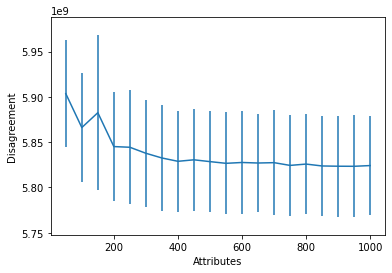

[1.01363, 1.0072, 1.01002, 1.0036, 1.00347, 1.00233, 1.00144, 1.00081, 1.00109, 1.00075, 1.00042, 1.00058, 1.00048, 1.00055, 1.00003, 1.00028, 0.99992, 0.99987, 0.99986, 1.0]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


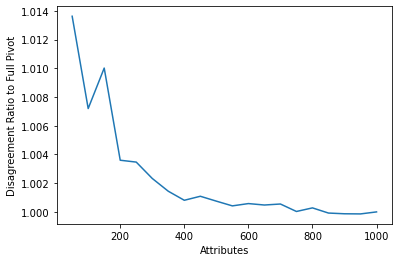

In [25]:
"""
PIVOT PLOTS: synthetic correlated 5_1, 50 to 1000 samples
"""

attributes = [x for x in range(50, 1001, 50)]

scores1 = [[5871067948,5862475556,5860033036,6239129648,5839577024,5862626468,5945994232,5841154264,5850478766,5863547702],
[5911450932,5813973294,5845600082,5818042534,5814364428,5815540482,5813752304,5814184392,5812179356,5841745604],
[5800089048,5808919690,5803150080,5832083384,5820225142,5810553420,5800920512,5802866636,5803089448,5810294192],
[5805089404,5818284184,5792203356,5802140276,5793724534,5801425092,5799566038,5794375132,5796924776,5792165624],
[5795312520,5802141930,5790220848,5791554218,5806526834,5794971700,5788349222,5787882630,5796187480,5829299144],
[6896088094,5787867440,5788385088,5790122038,7313343010,5787705408,5792314470,5819466010,5791788964,5791643496],
[5786284960,5788087744,5793638350,5787589850,5788109986,5788468022,5789422632,5792191500,5785980380,5788734908],
[5786586910,5786974982,5784744288,5782934256,5786695120,5786634410,5786364686,5785910492,5789968030,5788896886],
[5967374872,5789104912,6096205582,5786701386,5787954078,5782887338,5815172828,5784703626,5786849828,5812370400],
[5784416544,5785013934,5784332730,5784644592,5793459948,5786322558,5783620604,6040305266,5805346022,5818536616],
[5784899476,5786349962,5784230160,5792990964,5785352228,5783142450,5783235968,5789974958,5782611732,5784284402],
[5784209320,5783636760,5783557042,5782942674,5807273772,5789917888,5801455794,5782675194,5783547464,5784532166],
[5826410518,5782560648,5785070894,5788671936,5802281420,5807892216,5797971650,5784677090,5782333312,5786752106],
[5834180908,5785063922,5783437264,5782098808,5810963894,5781699134,5787238956,5782476408,5782863456,5783687338],
[5782076502,5785614902,5780759986,5785694118,5782303358,5792447196,5783014380,5781829028,5781807092,5790357020],
[5787610722,5782036910,5784965336,5838369288,5785276282,5798784868,5781038222,5784702728,5906917646,5811570444],
[5784359514,5781622236,5898584790,5781563944,5780661972,5781425362,5789177426,5781242762,5780423854,5782215538],
[5790148554,5780362192,5807815456,5780764264,5780664808,5780248966,5780365154,5781025050,5790360598,5812230866],
[5782889648,5780615400,5804533414,5779963016,5780339794,5781421510,5782712460,5799076526,5780994166,5970332774],
[5779809954,5788141988,5785507204,5805662706,5783979896,5802363570,5779818312,5780275518,6593047642,5782692452]]

scores2 = [[5919342212,5970108052,14841477510,5944052482,5952473176,5972177282,5955008978,5934482918,5940729492,5946945396],
[5904124100,5944453768,5901714814,5897526948,5912910310,5909207224,5908002820,5907800518,5924337416,5896663984],
[5890734174,5894852626,5891877430,5915353548,5895415720,5900462886,5894825384,5920734760,5900101026,5896610098],
[6025114408,5885629332,5938669634,5885753116,5893868068,5887038630,5888058860,5926402274,5892161594,5886376342],
[5920483436,5882394268,5916356588,5879218672,5879317158,5880487958,5885355728,5930396118,5922757034,6007665640],
[5879298436,5895758168,5877377870,5892339750,5913835556,5881672638,5906619792,5889904758,5886075506,5884677008],
[5903180078,5877923014,5912152508,6087270612,6160503146,5883884320,5881243936,5883887122,5880572614,5877305114],
[5886526870,5877767770,14089369958,5877907332,5875465788,5876381028,5884423742,5877453708,5875759476,5875486792],
[5902678616,5875786192,5875795122,5877582838,6220649526,5879088484,5876753946,5943004234,5903414206,5878801572],
[5873519750,5873863616,6060512578,5875589540,5874091144,5878219532,5874368516,5877917430,5875279154,5888007868],
[5876349404,5890329568,5874989544,5908706148,5874441138,5873191582,5874447410,5880577868,5886228658,5874157604],
[5873597800,5874890252,5873471010,5879460802,5881645890,5945502738,5873032994,5884931602,5872671430,5873708072],
[5873479308,5871937584,5875448060,5881459326,5872535792,5872626938,5873342730,5885660858,5874662678,5888264522],
[5908454758,5873093236,5872417440,5899732074,5872987224,5871824546,5872893556,5874913614,5871667408,5882968992],
[5873163844,5873284036,5871476982,5873949362,5871443678,5871166554,5877061148,5871490240,5878579410,5872521326],
[5874398172,5870726202,5874282190,5871377628,5876182856,5877576496,5872576082,5871230910,5876532902,5883691052],
[5873162134,5870855866,5906013236,5870985894,5870942744,5871718416,5886812900,5871352300,5872515920,5878363202],
[5870578950,5870759720,5879089012,5871008776,5871674784,5925001302,5870571040,5871829690,5870997014,5872613770],
[5896785638,6250450966,5870966034,5870805764,5872100000,5883540830,5870875002,5870448058,5881197678,5871627764],
[5870180564,5874722996,5874328534,5870487648,5872497154,5873239246,5870593402,5871779310,5872619246,5895500960]]

scores3 = [[5932989224,5927527080,5922596778,5920245002,5946749836,6119288988,5916215806,5929077762,5992268236,5931861696],
[5887367636,5904128124,5892703674,6339457658,5915856292,5886836608,5891720890,5911405718,8094061246,5898263930],
[5890722724,5879846002,5873254850,5879377810,6237990654,5877001454,5909102276,5878922424,5887497214,5881983138],
[5906802908,5900627578,5880143158,5866217088,5883206396,5907991682,5869000024,5878696844,5871301244,5872244942],
[5868166558,5874847252,5868557750,5871582542,5874109690,5868901026,5865390942,5866477834,5872268066,5865746820],
[5872490160,5869204542,5911277334,5866231856,5868478954,5868955948,5874712898,5936541854,5862775284,5864048772],
[5872071464,5896047514,5869467358,5861343030,5956625044,5864693512,5865586098,5869357046,5863292534,5862687044],
[5860416774,5870613440,5858990202,5862739194,5862248990,5860161850,5878194918,5865995936,5860825032,5863245170],
[5862903738,5861438918,5871969070,5860293494,5866881042,5862566730,5871408966,5860750730,5862688674,5860188492],
[5860781598,5868305384,5865662950,5864062578,5859802552,5970164654,5860123562,5859160340,5867470938,5860510782],
[5862723686,5858776102,5859409166,5860287648,5861384286,5859628138,5869469296,5859942390,5858280896,5860971738],
[6181627796,5860123810,5858445754,5858489450,5858977624,5865464124,5860269264,5864585570,5863062768,5857788634],
[5873988610,5860906014,5857337514,5859071940,5858679632,5858748582,5858316474,5862101486,5859860164,5860959804],
[5858037352,5860715256,5880674908,6020385340,5858455364,5860110114,5858270100,5890315452,5877471626,5883724822],
[5857542068,5860632602,5857608222,5948364908,5871314676,5858414748,5857607666,5857482062,5880115512,5859660980],
[5857807154,5860990788,5869506022,5857349552,5860081650,5871375934,5859389850,5858246298,5858132460,5857181748],
[5857609276,5858655678,5857585050,5866051650,5859881690,5856835180,5857846680,5857741452,5857168850,5857135806],
[5856742304,5858156248,5856472446,5856608362,5874950742,5856891766,6817303304,5858524544,5862678816,5857435354],
[5856689032,5856524344,5861577290,5856308370,5856877120,5917242390,5942662354,5897746312,5859407548,5856399086],
[5856733486,5859480750,5856352132,5856085994,5856491764,5856552628,5903915682,5859228326,5856105888,5861124320]]

scores4 = [[5954385729,5976131011,5946002627,5971846801,5959685347,5968976877,5950171277,5947174929,5985868845,5948589711],
[5931638537,5910773589,5907944029,6029035909,7057685181,5910435635,5910774791,5951794669,5940691457,5912912485],
[5894713903,5916364369,5907958511,5892237847,6166961965,5896393019,5898141683,5889159451,5897375291,6088845311],
[5914946229,5938539691,5887326043,5887069287,5903053439,5883913949,5919622399,5887202561,5891574949,5964004425],
[5879960953,5929430309,5900998039,5882123327,12017568085,5887920037,6244368835,5884893739,5889805701,5923994381],
[6037308493,5901706865,5879893541,5908940849,5880355983,5885058573,5897799635,5881179187,5895285065,5881460247],
[5877081711,5879162725,5878205927,5880919363,5884902327,5876753353,5878208339,5879046653,5875213431,5880030731],
[5875193081,5876244213,5876713201,5877988007,5875287697,5881149943,5876876463,5875540233,5875640421,6776190849],
[5875478819,5875100339,5876618705,5882052363,5878066391,5873932155,5883058143,5891354281,5880336765,5879809557],
[5873014701,5874871061,6384859705,5926561799,5877445199,5894891531,5879102555,5873275423,5872697177,5872585755],
[5873951825,5873667581,5878875583,5872528625,5882355571,5884426211,5874748501,5873181183,5874802085,5872502335],
[5874372061,5872377173,5871588697,5880148213,5917049949,5870782015,5878505889,5888902271,5892805693,5882144605],
[5871818919,5871274215,5871622841,5871686259,5873260937,5877898777,5875844059,5873283771,5877573999,5872225987],
[5871942081,5872511321,5872410231,5871810291,5873638605,5871440975,5871499001,5871886695,5870877727,5871410507],
[5870723849,5872416057,5871937599,5871014979,5870367361,5871540541,5900009793,5871742679,5871219205,5870256599],
[5871929749,5870433957,5870683859,5871055055,5870444313,5942995923,5891435011,5918992939,5873778251,5870836157],
[5870441679,5870667741,5871757965,5870628251,5871635861,5871034551,5870141685,5871182735,5877219331,5877396797],
[5870245471,5884726553,5871479153,5870284431,5870782103,5883789989,5879814445,5901699211,5870462615,5870613531],
[5874095067,5870173903,5870270465,5870281319,5869994363,5869942791,5870435949,5870410889,5873693437,5870072123],
[5882353905,5893890019,5870253281,5870106629,5869741259,5870202317,5871425703,5869724077,5871901403,5869921625]]

scores5 = [[5804265816,5811412008,5796173180,5823806280,5797961544,13673088356,5809601132,5819754528,5833579110,5783856670],
[5774321206,5774689814,5768651748,5776712362,5765421272,5782980102,5773205936,5818121126,5776430388,5834227908],
[6450089178,6390385968,5990341232,5758234076,6355269496,5756273342,5761346234,5756939794,7619970756,5760647952],
[5747844946,5766525522,5752939664,5752562838,5773065624,5744666968,5761494030,5750458508,5749692414,5744891282],
[7030741168,5760689240,5744715050,5746950058,5773902774,5744235246,5750076966,5754669538,5745533656,5744154910],
[5741190426,5740774670,5741892258,5739869212,5747426112,5742923580,5744695626,5768185548,5826325208,5747511854],
[5740246370,5739165690,5738578430,5738125618,5746734496,5738097478,5743366576,5741171098,5741518874,5741242872],
[5738801708,5737391792,5746035706,5741854546,5742862010,5763975786,5739449094,5738898014,5738509888,5739649988],
[5745196954,5744764730,5736013568,5736498602,5738354754,5766361204,5735734172,5742107418,5736990756,5737722416],
[5736174276,5744724748,5735982626,5736438436,5739347698,5735947454,5754009058,6022848022,5739904226,5738546330],
[5736000978,5738100906,14789872720,5736802590,5735689728,5733646508,5741037798,5736040374,5736996568,5736419090],
[5755541844,5756831286,5736676820,5735878062,5735293044,5734999242,5734916500,5733900092,5818533728,5745600170],
[5736302014,5743507436,5799813856,5746460542,5736720906,5734898308,5734589358,5735632732,5741019086,5735948606],
[5734104352,5735314928,5738695612,5736297952,5755796342,5734369746,5734861708,5733812682,5734448756,5737053188],
[5734395218,5736567724,5733367976,5734056746,5736361374,5733316366,5735156946,5733851054,5748027432,5733884574],
[5733297984,5749672800,5733003778,5767380408,5733947246,5756242402,5734507826,5734676612,5733457588,5733704174],
[5734756704,5806472968,5739410544,5733814758,5744918756,5732678456,5733636486,5738520768,5733399868,5734419106],
[5732880528,5740013294,5736620722,5733751404,5735070546,5732914358,5733073166,5753246548,5738799704,5732907862],
[5732908054,5732659944,5747846422,5732796734,5732786840,5734140454,5732735364,5732699432,5735374462,5732604442],
[5734319582,5751256198,5732730078,5733756454,5736297776,5732890950,5733107746,6809231738,5733447642,5741518692]]

scores = [scores1[i] + scores2[i] + scores3[i] + scores4[i] + scores5[i] for i in range(len(attributes))]


plot_scores = [np.mean(remove_outliers(s)) for s in scores]
err_scores = [np.std(remove_outliers(s)) for s in scores]

# plt.title("Pivot: 0.1 Mean, 0.5 Correlation")
plt.xlabel("Attributes")
plt.ylabel("Disagreement")
plt.errorbar(attributes, plot_scores, err_scores)

plot_ylims = plt.ylim()
print(plot_ylims)
plot_range = plot_ylims[1] - plot_ylims[0]
print(plot_range)

mid_val = plot_ylims[0] + (plot_range / 2)
plt.ylim(mid_val - PLOT_YLIMIT1, mid_val + PLOT_YLIMIT1)
plt.show()

pivot_change = [round(plot_scores[i] / plot_scores[-1], 5) for i in range(len(attributes))]
print(pivot_change)

bound_check = [pivot_change[i] <= multiple_bounds[i] for i in range(len(pivot_change))]
print(bound_check)

plt.xlabel("Attributes")
plt.ylabel("Disagreement Ratio to Full Pivot")
plt.plot(attributes, pivot_change)
plt.show()


(12806879293.78234, 13811384848.544113)
1004505554.7617741


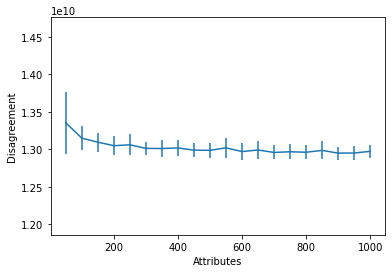

[1.02932, 1.01354, 1.0094, 1.0058, 1.00671, 1.00305, 1.00289, 1.00346, 1.00122, 1.00103, 1.00359, 0.99975, 1.00139, 0.99885, 0.99957, 0.99907, 1.00095, 0.99816, 0.99826, 1.0]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


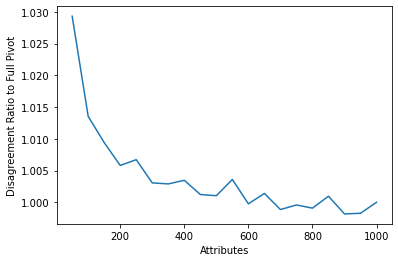

In [26]:
"""
PIVOT PLOTS: synthetic correlated 5_3, 50 to 1000 samples
"""

attributes = [x for x in range(50, 1001, 50)]

scores1 = [[13029504367,12939784705,13023762893,13053307497,13063341623,13002193387,13137255877,13452769965,13502945721,13060094289],
[12915699485,12913970855,13255598539,12927723637,13353054111,12877580743,12999644293,13457332765,13223551869,12958427601],
[13177747815,13336962629,13037034729,12831771477,13062574319,13126024143,12952997825,12870073273,12841454979,12998037935],
[12811901299,12829591437,13801986901,12862278165,13177243947,12861526971,12984860751,12822579527,12894602489,13001546619],
[12866503213,12822761255,12806359957,12844119933,12827700383,13943348875,12825908133,13161115133,12865173313,20302110777],
[13071349275,12798487739,12817942599,13356859705,12862262037,13926687971,12801071225,12805822519,12897739617,12945454439],
[12820634427,12876723141,19220092593,12796098895,14166032479,12856360459,12867249503,12869650987,12816159435,12798428271],
[12977115643,13002522237,12829142693,12789768071,12942558083,12793752869,12797901085,12928924933,12880554563,12794474333],
[12932251189,12831228789,12876102179,12898864811,12811865411,12799575659,13044776527,12806713803,13002368549,12805140853],
[12824012359,13083571531,12813485321,12788211577,12959906337,13051502847,12792105229,12788566049,12799279381,13078205279],
[12894244797,13673551699,12795763111,12852317377,12876889815,13479157903,12785819719,13593357863,12786267835,12795230525],
[13982440087,12791137177,12798020087,12936143545,12812367717,12786013953,12784357979,12783989641,12784918651,12819776529],
[12794121825,12803956431,12800122731,12786060915,13946611707,15888589009,12813337539,12910127525,12806993341,12801961131],
[12787875635,13638921233,12804823965,12843578885,12830759195,12782394439,12784492877,12863815397,12784178913,12790015937],
[12785760931,12787708861,13281557979,13086798375,12880865619,12781427401,12798899423,12799883953,12785851567,12815771701],
[12781067595,12809196359,14287698659,12812892641,12780353037,12872086749,12779914511,12793228847,13261256935,12808816667],
[12782082149,12792022999,12780542925,13525554711,12811579485,12782714939,12836117817,13231048923,13233373541,12780462331],
[12851249017,12818830415,12780401049,12785091503,13152732633,12779622943,12781989719,12793220513,13099832479,12836663001],
[12784818239,12789942041,13050619143,16898868409,12778387933,12783416551,12881649581,12780074849,12785867141,12786526157],
[12781962747,12778614427,15356951091,13356002405,12886776145,12791049467,13090194979,12888156819,12902721015,12782355185]]

scores2 = [[13587777934,13544054748,14831155216,18585831076,15832879676,13248318124,13297871958,14613700996,13839739576,13250462176],
[13197916862,13146662302,13139335668,16037280186,13297935766,13459390028,13202052100,13243614768,13221260212,13264284704],
[13299971306,13132387280,13174176414,13637925126,13110039190,13192060182,13162588138,13128034986,13099144944,16477466578],
[13095467456,13105333460,13106515170,13106162480,13485401872,13218599510,13109997586,13096837526,13480838126,20174557534],
[13102189032,13081819618,13338588586,13092210666,14453593720,13139826880,13141009282,13169232482,13080677040,13077084952],
[13072419420,13073398188,13100760668,13517767970,13229055408,13110694714,13103239894,13074339628,13085888128,13137425006],
[14691038616,13123814342,13469031322,13071618654,13093425858,13220957846,13172008820,13102198036,13089422238,13070030782],
[13131022028,13361249044,13178475110,13094721604,13405956384,13106713360,13132143470,13086728864,13072385080,13429315740],
[13152356372,13102141286,13363819110,13192725852,13076354314,13062545868,13090403184,13080135864,13471046948,13095978786],
[13088204636,13075189210,13069814522,15949614002,13496509644,13149539678,13078233116,13067710288,13153931426,13078646716],
[13154630276,13183533326,13876012382,13078845262,13412166486,13059663542,13067145658,13101518860,13635125730,13250473886],
[13067263460,20044350666,13137132470,13057988304,13096566910,13565590970,13059004098,13145868654,13065415540,13402728696],
[13091126930,13066244336,13056380812,13059865152,13074560784,13311083708,13080504942,13058494714,13112231812,13604592310],
[13056372704,13679830228,13064788772,13257812194,13063614652,13065487184,13143712952,13098467574,13080802510,13055284864],
[13055904198,15509975734,13055771106,13059943648,13054244880,13106091878,13058862856,13333466790,13055721010,13126196636],
[13182129244,13068572058,13052577672,13095218602,13054328720,13068772266,13101642620,20722509486,13053425384,13067858826],
[13104686210,13204799124,13053563338,13080546946,13127283950,13055632230,13585985664,13052387932,13076964658,13123387800],
[13224149666,13067263834,13051652338,14449476076,13051937790,13233966110,13053934588,13068471370,13054387726,13053089490],
[13068869704,13070735784,13094849132,13071317690,13051826790,13052497846,13053913078,13053434540,13061553400,13055908034],
[13077807736,16577752328,13050883940,13052770210,13050950708,13095589818,13058128138,13050888972,16013175202,13237771766]]

scores3 = [[13359377640,13299220492,13320906232,13164470914,13246282146,13179221770,13265545502,13676432756,13789934810,13651125902],
[21489116828,13197435252,13305997490,13130536894,13330047786,13064924772,13165335400,13171329194,13398869616,13061821740],
[13512095554,13044987618,13164442596,13423022900,13033269598,13112959412,13029732456,13521008058,13160010664,13191397014],
[13030063094,16605824246,13589022484,13003705180,13185260260,13010195564,13604548492,13195053156,13008228886,13088159616],
[13536982914,13010960854,13107232358,13032405570,13269598664,13081939166,13098128500,13021823740,15439760320,13074212996],
[13248076004,12995822104,13037904596,13015544352,13028172400,13002142110,13830605876,13025178926,13309214794,13630730404],
[13016584012,13046305336,12992398100,12994190420,13002619464,18429025464,12985313192,12986150182,13026460298,13001283232],
[13005886156,15781280006,14360216956,13435382000,13082176750,12987110630,13017082832,13084759108,12983055892,12999913776],
[13000150892,13028536568,12992421640,13110998454,13007921994,12989865726,12989642910,12991462008,13022910992,12981233376],
[13035366860,13136810530,13013163076,12980691912,13524356652,13043614646,13090926928,12984286580,12984615514,13072059350],
[12981613944,12985755808,13386081384,12988916064,13193730578,13098594816,12986566368,12982862082,13027220234,12984231034],
[13156129070,12982591162,13122696900,12976308950,13002213082,13475555020,12988330258,12977194652,12978488436,12991383942],
[14203728516,13022200708,13005911916,16967325180,12982258812,12977969690,15334851164,12990479468,13006488888,13205782692],
[12978720724,12982576766,13005190004,15911258620,13067344122,13064115676,13288734386,12975115536,12978727922,12977911424],
[13045279106,13923881698,13996912396,12980724418,13008653002,13017603900,13062597252,13101438702,12975594078,12981105750],
[13134973200,13013929582,13003942940,14018064906,13431317170,12977045782,12973346010,13099249408,12973796848,12980583132],
[12993241292,12993119222,13011561286,13064494156,13092235788,13622188044,13127804294,12976567332,12976054648,13069920232],
[12978691588,12990250534,12972411814,12976272160,12973096728,13005090506,16995690474,13034353864,12971807758,13296343236],
[12972866890,13013747218,13095430426,12988097582,12984950502,12974509364,12978210776,12972416620,12983536782,12971186908],
[12980432000,12971058450,12971886798,12992075900,12982454114,12999143422,13023977168,12974486638,13002146566,12971636996]]

scores4 = [[13093336362,13105068530,13170522724,13069951468,13210777536,23059356522,13150426796,13238649584,13087488312,13480522890],
[13673530070,20663896670,12970033566,13154963050,12982531022,13175946638,12984549252,12993659604,12979893710,13003258166],
[12957079206,12946326484,14937063572,17293875338,12971476194,13114210814,13131989514,13023267182,12977499548,12971096854],
[13001609316,13269858238,12948401914,12968734684,13659545454,12961516156,12964194184,13243616628,12939276048,12946172496],
[14371107370,13095945664,13200361954,18277921556,12990935168,12977626634,12945791994,12935523132,13017688790,12947477204],
[13044677600,12924623336,13014207692,13005852648,12928716018,12948047098,12926509910,12946192288,13126883616,16223647490],
[12928705556,12941441454,13018381846,12932904238,12914193656,12948967412,13063257290,14753136670,13199664796,12933253306],
[12911853828,12940820960,13064479966,13247945032,12914612300,12916024380,12999885242,13174582412,13290959770,12962504060],
[13000094906,13400254624,12917773948,16608804618,12932633550,12912108600,13536349222,12926347010,12911602972,12933034318],
[12950419278,13021249398,12911032508,12914326344,12983332716,13116428656,12922360212,12920939130,12911347186,18147591772],
[13216554234,12906540850,12961318854,12922230448,12979584206,12908149146,12912019650,13016643184,12939722428,12908717908],
[12905168584,12910197666,17124619802,12912276630,12914621288,12906011488,13327444136,12913445150,12906744276,12944637428],
[14416920286,12909355444,12934899338,12904192054,12944256946,12936790796,13131155634,12923356050,12946588032,12979665086],
[12952093846,12902506550,12905885192,12957953236,12967074684,12914644872,12935986704,12905823990,12925612858,12906592752],
[12913732166,12901907210,13192109378,12932469750,13189405820,12907276950,12912517792,12906584122,12903128604,12903508730],
[12964856600,12900487390,12901590056,12900278430,12901440548,12900347462,12916472988,12907054900,12907463418,13037361350],
[12913565266,13171109634,12901628884,12900451126,12910613324,12900116160,12903006442,12908394296,12901517134,12931011354],
[12904767026,12901331128,12970939650,12899288034,12927416132,12903422002,12905830890,12914862832,12900185298,12899305544],
[12916291108,13204593108,12905278716,12906113838,12903811534,12898673734,12899563662,12976907486,12898636792,12900335092],
[12927448478,12932037530,12907915138,12991835236,12904981054,13045065484,12902921094,12902745528,12900643918,12926846882]]

scores5 = [[13180974133,13141300485,13247265497,13255157343,13153792763,16691691107,13490394471,13211274783,13240334051,14453827527],
[14000872783,13070489047,13243104585,13046858995,13131123987,13524456321,17835797293,13058292539,13125466545,13480270701],
[13259520231,13022253417,13044474425,13025347253,13018223059,13176426131,13116522559,13041352521,13039495535,13295982883],
[13034115403,13062608605,13011174025,12998392831,13499191655,13000287091,14448534357,13124310647,15357682269,13021877961],
[13017612693,13136230787,13334282503,13147748235,13007864143,13001263987,14227480961,14885989061,13223542733,13007560533],
[12998240741,12991539281,12989930709,13025144473,13078760227,13008962757,13308002177,13134108771,12985654803,12990171751],
[13036151979,13960248829,13176339321,13115135449,12983299289,13109961101,12981709871,12988002293,13063215885,13210322373],
[12983358559,12982479493,12984368549,12983894215,16917106567,12996464615,20829723307,12992011017,13000396191,13040951969],
[13006994535,12979426875,12980975715,15942515575,12994902077,13119916643,13258258059,13013927185,12987085809,13033516311],
[13032282833,12999455059,13356723525,13167919591,12989011939,12994182495,12975244157,12997556487,12979229939,13043083283],
[13025665171,13014956105,13207910875,12988278423,12992314139,13039473601,13324379255,13066629041,14370981657,19038520991],
[13081342721,12987396351,12972697749,13012673037,12974078357,13014404353,12994530857,13003288189,13025079201,13581350585],
[12971343021,17662133711,12976426213,13153473181,12982357913,13075315977,13002470803,13231787933,13257178375,13032810955],
[12972686913,12970831527,13007149439,15812311183,13044624921,12973293101,12973860411,13104180107,12975061741,12971130253],
[12973784351,12988723111,12970324633,13064875399,12975647749,13014720899,13964723965,12971263253,13506606247,13038245593],
[12975483683,12969468073,12978694663,12982818279,12969608557,12970116641,13013819437,13220962083,12969461833,13078549869],
[13161601667,12971180599,13087060709,13085773071,12987601453,13268941137,13009313793,12982991471,12989887877,14220651331],
[12968649441,12969180967,12971300169,12968205075,12969119681,12969969429,13139045357,13691841943,13123683901,12968593543],
[12983467351,12973265143,13067812461,13040664157,17616843999,13004554905,12995505657,13152120159,12968134043,12968817397],
[12971615205,12966396561,12967627329,13236573189,12977577203,12971358695,12968309985,12967978953,12978871297,13239400785]]

scores = [scores1[i] + scores2[i] + scores3[i] + scores4[i] + scores5[i] for i in range(len(attributes))]


plot_scores = [np.mean(remove_outliers(s)) for s in scores]
err_scores = [np.std(remove_outliers(s)) for s in scores]

# plt.title("Pivot: 0.3 Mean, 0.5 Correlation")
plt.xlabel("Attributes")
plt.ylabel("Disagreement")
plt.errorbar(attributes, plot_scores, err_scores)

plot_ylims = plt.ylim()
print(plot_ylims)
plot_range = plot_ylims[1] - plot_ylims[0]
print(plot_range)

mid_val = plot_ylims[0] + (plot_range / 2)
plt.ylim(mid_val - PLOT_YLIMIT3, mid_val + PLOT_YLIMIT3)
plt.show()

pivot_change = [round(plot_scores[i] / plot_scores[-1], 5) for i in range(len(attributes))]
print(pivot_change)

bound_check = [pivot_change[i] <= multiple_bounds[i] for i in range(len(pivot_change))]
print(bound_check)

plt.xlabel("Attributes")
plt.ylabel("Disagreement Ratio to Full Pivot")
plt.plot(attributes, pivot_change)
plt.show()


(14358948871.281616, 16367416390.118385)
2008467518.836769


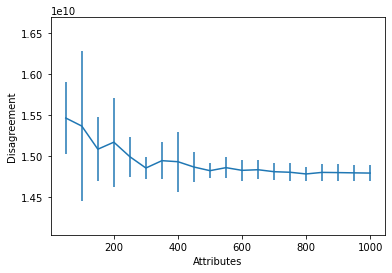

[1.04537, 1.03873, 1.01966, 1.02547, 1.01348, 1.00417, 1.01022, 1.00936, 1.00499, 1.00198, 1.00447, 1.00225, 1.00276, 1.00114, 1.00067, 0.99928, 1.00056, 1.00039, 1.00018, 1.0]
[True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


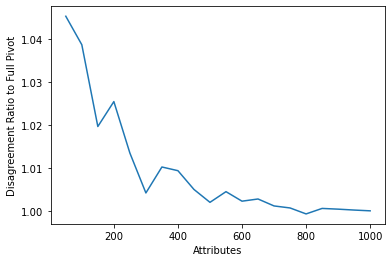

In [27]:
"""
PIVOT PLOTS: synthetic correlated 5_5, 50 to 1000 samples
"""

attributes = [x for x in range(50, 1001, 50)]

scores1 = [[15919261857,15187575205,15864295627,15291763747,15480200651,15506600531,19716126769,15489747791,15146777503,17070713015],
[19257417739,15037526369,15107106839,14976911559,14705725707,14722214305,14703302377,14863854743,15030270629,15441419609],
[14793845315,16427180367,14914348511,18717259553,14859645391,14708852251,16363845057,14702056373,14705712877,14973157645],
[15176858083,15010902501,14886404523,14704716007,14809859093,16070531221,15100839231,14780492873,14839561643,15473770943],
[14653983077,14791427675,14652480691,16055135729,15325363433,15135892799,16518675947,14653334077,14775391803,14663575413],
[14684394527,14643970489,16096578835,14977005199,15812139295,14694654309,14657524463,14668018359,14699379185,14790923437],
[14689835615,15721901697,14649297353,15038948251,14649323291,14695485125,15524297341,14960179641,14693348363,14635784435],
[14696092119,14656716739,14651721041,14755018243,14638664369,14667463549,14660359613,14656907359,14641678245,14686862429],
[14638083595,14697391679,20906682289,14650929555,14647071229,14907244067,14634097375,14688841643,14681484275,14718702355],
[14638026601,15694701155,17051003157,14640205739,14636069249,14630500047,14736131427,14731678325,14933063817,14636161695],
[21755828059,15953712593,14749061349,14635785627,14648630421,14775101229,14670015649,14652835049,14673848519,14660825525],
[14634345769,18320581359,14630931819,14642841867,17953752553,14631773771,14634087193,14690892363,14649748323,14689643279],
[15261007891,16340229291,14673176953,14639568539,14915181813,14625805363,14627705759,14987880067,14632330603,15669916143],
[14666452683,14678570879,14712506343,14637210093,21280242025,14635917113,14630278633,14634493375,14626587929,14638411001],
[14638566131,14659285709,15963556035,14627322899,14625011443,14639036405,14755439999,14625694757,14695228707,15212481269],
[14634526013,14683817249,14632730675,14646807893,14675413821,14707936109,14635574251,14630267049,14628063663,14626054109],
[16744800781,14646978099,14668211589,14794581631,14651664053,14631469751,14624271941,14633159255,14632427579,21852513765],
[15292631219,14629796227,14631589407,14651571307,14670690869,14649706159,14622518151,14635614247,14681445225,14628504023],
[14622295519,15687588063,14647145239,14648894989,14629131315,15403150413,15062905647,14635836043,14675440741,14622603307],
[14621549589,14621451945,14637642683,14625797073,14652583767,14631222953,14637716625,14643028077,14666233357,14630081167]]

scores2 = [[15061360037,16595037131,15586368601,15042089051,15548803521,16020524167,15102130899,15375178085,15329316289,15216738119],
[15192765175,16445359989,15148426115,14963274415,14971743571,15843495397,15008559637,15045420193,15188765371,14970625329],
[15543679541,16980199933,16569402237,15285945203,16099687441,22115550381,15049848499,15070493131,14925403677,15309127287],
[15648912475,14894533139,14955978895,16812576221,14906122075,16321883349,15620964787,14935391089,17152252853,22204052069],
[14917654451,15077364909,14979444049,15414137291,14892482999,20468677259,18689290015,15099049387,16342617119,14993240169],
[17638826283,14923882823,15031622249,15881511933,14912790515,14872319639,14891302869,16498139903,14895802133,15266142181],
[14914491791,15122945437,15332327525,15299580847,15195233611,15222274033,15694351039,14880720529,14874704609,14870415225],
[14880766101,17805051091,15354110905,14885261221,14869220175,14969763873,14894986219,14884372035,14906448931,14930885393],
[14906241787,14882180485,14862291279,15038130645,15067557631,14997604413,23251114003,14869115373,14965207551,15537676177],
[14902881275,14864818965,15058151643,18403842445,15548708557,14871880947,14925174171,14866769043,14878685831,14867773367],
[15945897619,14976135103,14898530645,15262393043,14862240909,14894254677,14970909811,14913075825,16099742623,14872076453],
[14861859173,14994248553,14865867215,14866726439,14887863083,15819760917,14895386951,14999912703,14921647579,15050747547],
[19914141143,14858863731,14867925617,14890683143,14877642311,14858775601,14896585749,14868821935,14862871239,15266011949],
[14865167377,14856810515,14870955473,15053265819,14895046489,15387094813,14858936987,14856177955,15088165443,14890194703],
[21558813531,14872363665,14856072617,14869846373,14863185169,14875777953,14856256763,14874790607,14968757433,14953220375],
[14859191269,14865765491,17041636187,15100136117,14899987107,14890174751,14856888943,14853924777,14862247285,14858410999],
[14853404633,15044528571,14853721957,14869377513,14887145215,14859107467,14866998453,14861730919,14872140005,15288883515],
[14856659445,14852930405,16716937025,14877113169,14856441701,14862082709,14865987445,14868922803,16264121685,14873701075],
[18575656415,14856998943,14855508625,14858748033,14856303393,14908467263,23160193905,14878812157,14944903877,14928164533],
[14916929865,14988397533,14888216495,14861632975,14854659395,14911529159,14853910423,15361678795,14893019965,14903839871]]

scores3 = [[15049106681,15299252531,17584755895,16121910831,16301705243,14987343097,17319587527,14993303945,15271856603,15594180111],
[15188844689,14916142263,15026041791,16321801375,15079564319,15117275115,14914443455,15570856463,15481197271,14928495125],
[14886844269,23668536017,14920505059,14904131391,14940911321,14873495513,15504524821,14869041645,14871512933,14864308677],
[16147215317,14964809631,14932638459,14866402677,14892543919,14983157335,16058198515,14859288845,19555443821,16783463333],
[14878117803,15333624809,14851811805,14856157031,14919631521,15351735669,15455740169,14998578873,16406765123,14899683715],
[15216964487,14980188305,14857419281,14835352953,14856965293,14873727875,14912299001,14900673431,14886362201,15016667371],
[14978967465,18190814527,14870725059,14828805353,15824268007,16748849511,17227227883,14829911203,14877985215,14986681721],
[14825217139,14832373689,14866917921,14846868503,14833261379,14849798671,14838127347,14962284477,14840850289,16093090231],
[14828526713,14930441199,14823769839,14828704853,14853445875,14825904967,16072406091,14832689053,16805069577,14826513473],
[14870846343,14889598193,14865412369,14849971867,14910340931,15365062419,15038302577,14873552697,16545849159,14872119699],
[14825402541,14820611677,14923898813,14870994843,14828851347,15640055753,14874034667,14830242853,14874998497,15971745473],
[14821958225,14978225363,14850228689,15484358181,14836145049,14949956213,14915121893,15049870731,14817149789,16220224717],
[14828300205,15142963119,14816984797,14826518027,15129192741,14880878355,15133643927,14822775347,20286864581,14818925495],
[14860128169,14834567747,15087082015,14925309539,14907175411,14820244637,14837993861,14875515623,14830286057,15491715011],
[14880664539,14822645997,14830414089,14968337387,14957440185,14814171945,14823180235,14817410553,14832479325,14865164779],
[14813108097,15033481711,14832272545,15135808639,14855680023,15229868173,14815798163,14831346985,14872075087,14819034827],
[14921913451,14955165033,14968203493,14846797849,14925435051,15050558041,14888812393,14810754467,14816250505,14824905399],
[14834282749,14816453653,17146289109,14841383517,14812506371,14887967855,15567262733,14811758785,14969002349,14828890933],
[14821762371,14814045439,14817372577,14999887837,16987186365,14919517289,14813903641,14818993539,14977948313,14809871775],
[14821315119,14822719657,14975192271,14819334961,18407387737,15067368723,14823366633,14885237293,14888513693,14816912033]]

scores4 = [[14974309216,18402937856,15177168262,14915256008,15988761268,15479799106,16458648744,14957189956,19652255672,14971346018],
[16728041252,14873757632,18538223578,16796551710,14863867124,20703206636,16126054450,14792702040,17319149792,14791402906],
[14830478792,14767467544,14763213766,14782031536,15930470014,19396226342,14910035048,16471531278,16481405504,14867496894],
[15206735584,15054157524,23530178404,15527696820,14775428168,14740329564,14755627042,15178042830,15289715550,14941935160],
[14758002568,14762894234,16659524180,14781102622,14731243940,14854349190,14729341014,16164156142,14749700270,14806088822],
[14718450346,14730403516,14717011482,14745838836,14867649138,14714400010,14783525712,14748320992,14733522282,15289516178],
[15109751652,14707198086,14723872614,14718277088,14859978530,14719529720,16325718234,14786385478,14902601444,14732380168],
[14729767984,14714103866,14770288024,14902805686,14844336792,15182086348,14719841356,16346240412,14761392336,14791226276],
[14719763864,14703064942,16496253802,15557961572,14715969894,15570196920,14723535316,14700176400,14708721002,14736392308],
[14737342538,14746620730,14725193258,14768274748,14704951840,14696433614,15022199192,14765189602,22262013534,14963162866],
[14950354212,15204900124,14817137810,14707567200,14701892562,14703386980,16392325968,14700579872,14731591344,15156080722],
[14719095150,14694787686,14704986438,14974966492,15068778782,17642210808,16858389980,14700467510,14693269608,14737652832],
[14700765292,14775287138,15242423706,18574309452,14692084300,14738693144,14730434538,14700938776,14703005830,14733918554],
[14786425568,14711644576,14693207644,14810202854,14699899752,15018619730,14697848168,14724564570,14791869836,14770363094],
[14692521876,14690978716,14695762548,14740014822,15894055164,14708788216,14734629474,14719616228,14700038720,14697038848],
[14690482690,15047557022,20038752152,14689436588,14715989324,14693532742,14828312672,14699914938,14748403354,14697616462],
[14725736242,14688740384,14693086898,14689467996,14722695830,14793087880,14688913358,14735591050,14703685554,14986874616],
[14691172944,15331229230,14690313916,14733028364,14743028826,14702714856,14814565538,18150604426,14694886562,14693930960],
[14702098712,14699707852,14730719748,15143426010,14728194690,14756303700,14688298750,14757472860,14688200776,14900787656],
[14696242432,14689379158,14760227100,14740443754,14698657730,14770482952,15188951624,14687807580,15364294400,14687963694]]

scores5 = [[15138449462,15083981666,15379772114,15020870790,15391788820,15102692520,15594721886,14987757714,15043283952,16017691044],
[14925667178,14921234452,14917607782,15272920562,14984538892,15922965984,15142426648,14920758604,18786589844,18128845764],
[14875115994,14869153644,15442998294,14944604138,14862948730,14879122060,14973152042,15862647838,18466827838,19157693220],
[14865583788,14976624242,14859892768,15684973308,14866268218,14888853986,14897985138,15102470112,14881330862,14865158432],
[14876951948,14916090758,15119761258,15134562098,15094664432,14883456478,19145614798,16359412744,15420928880,14878443744],
[14857131372,14867795202,14887998734,14832257640,14842687848,15250465398,15148007134,14843943832,14956840434,14835001602],
[16138425428,14829385994,16125098056,14905952240,15466093586,14856352386,15836317086,14838044606,14909664512,15017970678],
[14837057780,15540626858,15912003340,22715919870,14831862482,14857196924,14989241676,22560330804,17334302640,14859871826],
[15011467808,14872906796,16411518608,14847168058,14924725192,15265604134,15649195380,22437802216,15011275356,14843635072],
[14828053028,15459704970,14948398138,14821001248,14823089320,14817305980,14903121840,14841052502,14821174778,14886521482],
[15780301442,14874813796,14878717794,15842695820,15067327282,14830464496,14844693598,14852903362,14986361660,15020817842],
[14834594918,14957824976,14815296442,15159827324,14814661192,15010152980,14815016316,14825711206,14889782980,14834295242],
[14817951644,14812658016,14823063356,14814543610,14823046962,14920746134,14840461444,14815297620,14829764012,14813168660],
[14900666654,14814526492,20709494170,14831128338,14820905930,15321802136,15878445870,14893408444,14813399914,14828037962],
[14996074094,16176086230,14822762666,14905713378,14827460822,16767625024,14820174726,14871983762,15427962848,14842818648],
[14815292274,14965577956,14819316466,14811007650,14838631050,14818684108,14811096064,14809735808,15263573202,14826027196],
[17419653792,14838340624,14816214266,16265632834,14840021032,14823935120,14987015466,16697868398,14810278714,14808858890],
[14852480648,14989384858,14894244046,14945258250,15103434214,14929379546,14810308294,14823145216,14811364482,14854373502],
[14816054864,14809330214,15501601362,14808601972,14860260976,14871134140,14814058560,14808587590,17030858810,17374249404],
[14821289166,14980109828,14859421574,14808478352,14815115504,14807319184,14810929270,14814367502,14996113508,19827334364]]

scores = [scores1[i] + scores2[i] + scores3[i] + scores4[i] + scores5[i] for i in range(len(attributes))]


plot_scores = [np.mean(remove_outliers(s)) for s in scores]
err_scores = [np.std(remove_outliers(s)) for s in scores]

# plt.title("Pivot: 0.5 Mean, 0.5 Correlation")
plt.xlabel("Attributes")
plt.ylabel("Disagreement")
plt.errorbar(attributes, plot_scores, err_scores)
plot_ylims = plt.ylim()
print(plot_ylims)
plot_range = plot_ylims[1] - plot_ylims[0]
print(plot_range)

mid_val = plot_ylims[0] + (plot_range / 2)
plt.ylim(mid_val - PLOT_YLIMIT5, mid_val + PLOT_YLIMIT5)

plt.show()

pivot_change = [round(plot_scores[i] / plot_scores[-1], 5) for i in range(len(attributes))]
print(pivot_change)

bound_check = [pivot_change[i] <= multiple_bounds[i] for i in range(len(pivot_change))]
print(bound_check)

plt.xlabel("Attributes")
plt.ylabel("Disagreement Ratio to Full Pivot")
plt.plot(attributes, pivot_change)
plt.show()


(3652872981.8965893, 3837489935.104092)
184616953.20750284


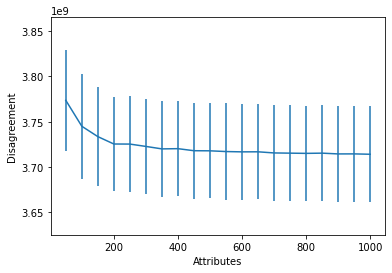

[1.01602, 1.00832, 1.00524, 1.00305, 1.00303, 1.00233, 1.0016, 1.00166, 1.00105, 1.00102, 1.00081, 1.00071, 1.00073, 1.00039, 1.00033, 1.00026, 1.00033, 1.0001, 1.00011, 1.0]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


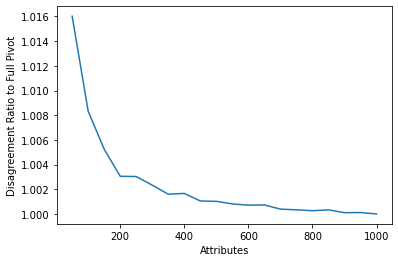

In [28]:
"""
PIVOT PLOTS: synthetic correlated 7_1, 50 to 1000 samples
"""

attributes = [x for x in range(50, 1001, 50)]

scores1 = [[3707882858,3699967210,3699194582,3695492174,3705377472,3725248308,3696434014,3708545404,3685781036,3694739694],
[3691720258,3670759022,3671417224,3666267598,3690495096,3677844520,3709586600,3667257670,3672015292,3673399476],
[3665754060,3664395830,3664677398,3669652402,3659668482,6833427190,3662395518,3664192802,3669215322,3669674836],
[3659648318,3661958568,3662256032,3658863332,3660003036,3685693776,3657265006,3679063392,3662524696,3659584738],
[3654990192,3659927674,3654188924,3658817224,3656030286,3653047012,3658998810,3668246236,3700689954,3657391506],
[3652821234,3655510358,3668316398,3655870406,3653084958,3657930404,3657599706,3655466198,3655980176,3657358816],
[3661687568,3653497508,3654601928,3661745600,3652289754,3652497714,3653239796,3652710834,3650486708,3654564272],
[3652249576,3651879036,3651232386,3653255646,3772296644,3651709716,3651117300,3651429160,3654146098,3652816894],
[3653250742,3650145906,3649396420,3650574178,3651268442,3650228730,3653568880,3649808430,3671518032,3651461220],
[3653653578,3650465800,3656359902,3662013814,3648762496,3649639518,3649227206,3653738750,3663303932,3649019850],
[3659218734,3650502302,3648797724,3654594338,3650387634,3649861410,3650014438,3649312242,3648268648,3649630472],
[3649682220,3648667562,3652326802,3681533086,3648983166,3649213898,3649035266,3655632578,3649589984,3652831106],
[3648856870,3653949046,3651853598,3649428320,3648674474,3649495096,3665362782,3682815566,3658249160,3649818644],
[3647978538,3648733620,3649403278,3649118086,3649149814,3648325200,3654598536,3648633914,3648544628,3647971650],
[3648244742,3651100556,3648466598,3648299014,3648193858,3648542132,3659144330,3648990282,3648080194,3647938138],
[3648897662,3647886596,3647957634,3659365138,3648029016,3650205892,3648967514,3682080050,3648448926,3648701954],
[3648064698,3647706058,3647981232,3647739508,3649637980,3648076374,3648408548,3651323140,3647918300,3652944174],
[3647503742,3650453740,3647570742,3648409784,3647483190,3783624986,3647585670,3648104492,3647704182,3647668378],
[3647505374,3647791496,3647391790,3650935780,3648288108,3648143166,3647755712,3647356138,3647356138,3647336806],
[3647336570,3647402772,3647574592,3666772778,3652181006,3653536418,3647601696,3647639472,3647358360,3647377122]]

scores2 = [[3799942433,3742470163,3805364941,3794696689,3743063459,3747687483,3747901819,3765034577,3760988583,3723859447],
[3711373471,5230968203,3771798331,3715695841,3718297091,3716039481,3719166155,3715487813,3714159815,3722687089],
[3705593277,3712411435,3707448765,3713686133,3706295567,3740703959,3707804495,3704638857,3703706317,3712434581],
[3700846845,3704013605,3704002069,3701602931,3705527191,3702909623,3703999039,3703720961,3699474973,3701695905],
[3702095225,3699297497,3701552981,3729192829,3726580753,3721012587,3703845447,3700252621,3700334029,3703242889],
[3698594981,3700411509,3701019473,3700160411,3705247319,3698130103,3697962417,3698890825,3700764831,3698274285],
[3699054853,3701054961,3698081145,3700058993,3793585905,3695511345,3773919227,3699839941,3695153429,3696199795],
[3698648547,3700276209,3697658383,3696807033,3695997197,3696870933,3697033249,3696511365,3755582793,3697889317],
[3697344963,3696171909,3701391395,3696162343,3695668653,3697272749,3698503305,3695637165,3695299307,3699313615],
[3694752377,3697413515,3704939315,3695457165,3697365721,3697490583,3697300581,3695682723,3694495577,3694518547],
[3695585735,3695441209,3710908095,3694998387,3694806223,3702366323,3700659615,3784052599,3696207209,3696228961],
[3695349753,3695986297,3696243503,3695016815,3693334859,3698225679,3694886809,3695352409,3694010367,3705666647],
[3703318077,3694217697,3694653199,3703360129,3693492297,3699502949,3693493269,3751129691,3693614003,3694293489],
[3695255173,3693749555,3693289877,3693631623,3692961785,3694307207,3693602381,3693130983,3693391969,3693150529],
[3693526067,3704278657,3694105655,3693021967,3697281617,3693775217,3700563047,3693662471,3693787941,3694179523],
[3693694433,3693299659,3693000161,3694068983,3692968785,3704304615,3692708633,3693080111,5545254021,3801849107],
[3702573255,3699860597,3692745635,3693714901,3776990179,3692749075,3692977665,3692560891,3694881863,3702860359],
[5935332625,3693087977,3693535955,3692889063,3693056051,3692905085,3694382693,3693082013,3692848437,3692598297],
[3692726807,3692634419,3700193415,3692622165,3692798447,3692599727,3693236597,3692875285,3694492997,3692652459],
[3696104015,3692484549,3692468463,3710712339,3692468463,3692471283,3694769187,3692473987,3692491041,3692468463]]

scores3 = [[3751685412,3741141496,3759477390,3737517128,3725575812,3723670950,3741009688,3801790630,3755215760,3812520908],
[3714005936,3713843840,3711482996,3718668068,3708826100,3718117216,3707481538,3710173954,3710955662,4548479896],
[3692788940,3703708942,3713389932,3702877188,3700452016,3698804092,3707849454,3695870040,3714279886,8456783326],
[3699692910,3701307702,3696255948,3694423228,3695793282,3695717518,3694346406,3695132948,3695841608,3697150736],
[3700180658,8971840048,3692246306,3747986728,3699054322,3695480824,3691442224,3694545668,3695173076,3694424734],
[3692679472,3693503358,3694954160,3696256212,3716719040,3695301210,3700118114,3694329500,3691814432,3693511412],
[3690469060,3688285572,3689129848,3689082524,3718840762,3690689098,3692542644,3693706344,3699086538,3688604630],
[3693550266,3738982264,3709732916,3699439398,5090537238,3699166958,3689777620,3690420968,3691132284,3689158244],
[3688349932,3689590100,3688572536,3710771356,3689997704,3694760404,3689407744,3688930680,3691425232,3691110662],
[3688243922,3688191308,3687770446,3688602364,3687622940,3688781028,3708933876,3703787966,3693310762,3688303678],
[3687360956,3688160870,3688042932,3687235376,3687742136,3687926380,3687947798,3710831542,3688185624,3688322778],
[3691770584,3689030652,3690499790,3688890150,3688513316,3692655386,3688377688,3687435968,3689779992,3687930164],
[3686583464,3688008632,3686715408,3688743492,3690081494,3693774638,3686775630,3687532052,3687406084,3693586592],
[3687315952,3693433282,3686977168,3762959162,3702072994,3688020366,3687478428,3686738388,3687561616,3686735892],
[3686509866,3686139914,3686146802,3688128770,3687689758,3687464470,3688004934,3686404294,3686564180,3686586238],
[3686384638,3686122972,3700336760,3686480254,3686152558,3688736176,3688266844,3686998878,3686016464,3693848452],
[3688665598,3686464284,3685959604,3686033038,3687283388,3686097988,3748020292,3686294492,3686642438,3687457074],
[3685956864,3686090484,3686067050,3686455978,3685689984,3691120860,3685831464,3685958508,3685850140,3690316506],
[3686321960,3685833528,3715322460,3685948222,3751924128,3685684312,3685687222,3685880386,3685776198,3685900536],
[3685857782,3688743384,3690102138,3685822166,3685632496,3685663680,3701866078,3685747156,3685609810,3685968184]]

scores4 = [[3835165599,3870107721,3889637117,3855605519,3846516985,3857468725,3859404555,3875558643,3867896595,3859006165],
[3833831943,3830317763,3884360431,3841817431,3827888263,3824886003,3947439303,3860677745,3838217365,3830411123],
[3821914111,3819688233,3811545795,3818740391,3816051753,3814777217,3830405655,3816867567,3842852517,3823888267],
[3812802373,3811474509,3808695623,3807706651,3808381671,3806358035,3813763657,3811303361,3812060725,3811798283],
[3806598263,3806918567,3807231009,3805959987,3809513807,3808128369,3828761353,3809959789,3813239253,3813723301],
[3809620609,3803390065,3805242387,3804905733,3805421057,3805871463,3806835929,3804817017,3806506451,3804423591],
[3802887109,3805468879,3805075719,3803341217,3807094233,3806531969,3803712251,3803775571,3805502947,3805381059],
[3804035021,3803116689,3805429233,3802051445,3865403587,4852087675,3804636131,3803553543,3807555675,3803506413],
[3803531973,3803475853,3807772807,3803640573,3803468699,3802580099,3804177197,3806461573,3804420577,3802911307],
[3802605491,3802378915,3801698945,3804518749,3802852037,3803011225,3804635127,3802391703,3802451997,3812231627],
[3800718957,3802860805,3801360013,3804102881,3805101697,3801384323,3807441525,3816919235,3809519629,3801447475],
[3802157781,3800985483,3801603953,3801079089,3806297981,3802397669,3802180149,3802222555,3801208745,3804067205],
[3830166765,3801856635,3800738853,3800860289,3801749173,3801549563,3801287213,3807112423,3811795019,3801611941],
[3801772229,3802220307,3801268363,3802195359,3801414475,3801487673,3804107141,3801354137,3800934787,3800775019],
[3803062173,3805375873,3800925933,3803300131,3800788765,3800598999,3802172137,3800544961,3800027381,3800237739],
[3800971063,3878182889,3800279497,3800212971,3800413791,3801408899,3799875691,3800019729,3800310451,3800321035],
[3800633531,3800882837,3799931517,3814461597,3801457171,3801192489,3801119959,3800273971,3800547303,3800153589],
[3799863095,3800682879,3800153137,3799956153,3799923931,3799786801,3799916627,3800001351,3838990247,3802378187],
[3799831785,3799782669,3799735301,3799932935,3816801949,3812114871,3799894937,3800087349,3799722147,3800926739],
[3799695559,3799744965,3799699929,3800191569,3799721981,3799717317,3799856155,3799735763,3799715093,3804483395]]

scores5 = [[3798436521,3801913979,3795045649,3800904507,3803190977,3808916417,3794637971,3840286171,3804217059,3801965015],
[3778528395,3775520841,3770426755,3788519753,3821302877,3767249515,3770178391,3797657875,11722836777,3776642631],
[4523712457,3764376517,3765662833,3756528953,3769771029,3795752171,3782663897,3767279043,3767890589,3761918273],
[3756591031,3765576565,3753516681,3752919861,3757547201,3753871297,3754787633,3758481119,3756263457,3758888555],
[3779328499,3772898901,3750529887,3757502725,3751450257,3757850307,3749794767,3760533761,3810973703,3752184661],
[3754507539,3749026491,3749292017,3759986003,3749938933,3752627707,4231126135,3796650977,3763371721,3758730669],
[3747461941,3753853613,3748836347,3753489381,3748178867,3750688055,3754348389,3752976883,3751114883,3749538899],
[3748740999,3748835729,3747135007,3748474675,3749114633,3750038931,3749337871,3749265959,3747634663,3749290195],
[3747541779,3748177377,3767338319,3747199931,3746953327,3747564559,3747566659,3748487561,3747764401,3748893471],
[3780203083,3795673901,3746146745,3753604671,3745616685,3750389297,3747071211,3747424661,3748196439,3748179579],
[3747360439,3745648435,3746140925,3746129201,3747031699,3751123317,3746382257,3758423257,3746175377,3746339727],
[3746518973,3745551285,3745710747,3750767999,3751163529,3808484603,3746040775,3746348343,3954690733,3746045207],
[3746497971,3747223165,3745532385,3748629729,3749250665,3755047075,3744550293,3758687767,3745084669,3745728035],
[3747338355,3745504839,3745064795,3745198619,3744955945,3759647699,3745004709,3746234159,3746723895,3765687593],
[3744512857,3745827561,3744866425,3744926591,3746085805,3781554861,3744720113,7929590257,3757547857,3745746961],
[3746001493,3745331269,3744877035,3745093705,3747512177,3745192457,3745077469,3745706609,3744724069,3745089085],
[3746077167,3745603371,3841287069,3757741231,3744647677,3745016337,3745534065,3744820369,3744930569,3749401009],
[3744517453,3744729175,3744925113,4022391489,3744363925,3751262453,3744883129,3747428781,3775701387,3745072839],
[3744434007,3745295281,3744479607,3744742823,3753001935,3745981555,3790821009,3744566661,3747027495,3747918591],
[3744327525,3765798503,3744567673,3744336609,3770726797,3744327311,3744536769,3753941215,3744492117,3744753467]]

scores = [scores1[i] + scores2[i] + scores3[i] + scores4[i] + scores5[i] for i in range(len(attributes))]


plot_scores = [np.mean(remove_outliers(s)) for s in scores]
err_scores = [np.std(remove_outliers(s)) for s in scores]


# plt.title("Pivot: 0.7 Correlation, 0.1 Mean")
plt.xlabel("Attributes")
plt.ylabel("Disagreement")
plt.errorbar(attributes, plot_scores, err_scores)

plot_ylims = plt.ylim()
print(plot_ylims)
plot_range = plot_ylims[1] - plot_ylims[0]
print(plot_range)

mid_val = plot_ylims[0] + (plot_range / 2)
plt.ylim(mid_val - PLOT_YLIMIT1, mid_val + PLOT_YLIMIT1)

plt.show()

pivot_change = [round(plot_scores[i] / plot_scores[-1], 5) for i in range(len(attributes))]
print(pivot_change)

bound_check = [pivot_change[i] <= multiple_bounds[i] for i in range(len(pivot_change))]
print(bound_check)

plt.xlabel("Attributes")
plt.ylabel("Disagreement Ratio to Full Pivot")
plt.plot(attributes, pivot_change)
plt.show()


(8084872771.718533, 8517626289.015432)
432753517.2968998


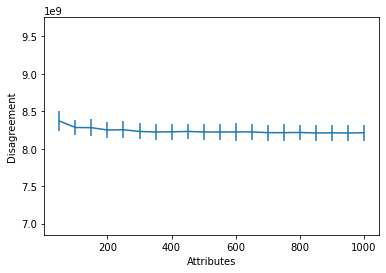

[1.01912, 1.00856, 1.00828, 1.00452, 1.0049, 1.00217, 1.00131, 1.00155, 1.00214, 1.00136, 1.00123, 1.00138, 1.00139, 1.0002, 1.0002, 1.00047, 0.9997, 0.99992, 0.99964, 1.0]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


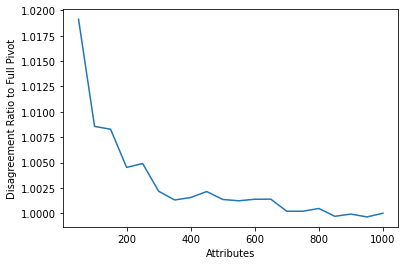

In [29]:
"""
PIVOT PLOTS: synthetic correlated 7_3, 50 to 1000 samples
"""

attributes = [x for x in range(50, 1001, 50)]

scores1 = [[8842264345,8345598977,8352807309,8338480343,8490040455,8447762209,8510867031,8450903483,8850042101,8430906555],
[8322090739,8283086503,8290097563,8862708579,8545586043,11488043819,8311246701,9205740043,8295047797,8297719579],
[8273513901,9850763855,8365614349,8322070617,8275576919,8431328771,8348480419,8280338441,8278426243,8306996759],
[8289466471,8277074657,8484413557,8289032065,8264810263,8627308165,8260666141,8264985497,8267656275,8261018909],
[8298118867,8256019561,8332738923,8257372185,8272896151,8272366561,8304294991,8283946127,8256331591,8492589097],
[8258313561,8259637663,8265127827,8252353337,8306532263,8249454703,8412487305,8514233225,8252845985,11878908237],
[8247770023,8250409573,8251783419,8280415003,8286023101,8251632667,8254105371,8571553711,8284608381,8266733587],
[8247412725,8249487709,8250780007,8305231255,8295543305,8248265629,8247483761,8251098825,8455825715,8286371665],
[8243871799,8572930351,8341954033,8246943445,8764458861,8253832389,8260116175,8254399291,8521777723,8248655325],
[8575180961,8247080419,8249710991,8272039257,8645308911,8253446519,8253552365,9175811585,8244820975,8250756779],
[9314658573,8266967267,8298897409,8246979053,8243939663,8310417361,8243032075,8244987451,8243220237,8250569289],
[11221512729,8247066975,8313321001,8304309025,8257061405,8301384391,8251990425,8245879693,8300651135,8242709175],
[8242999063,8242654849,8247066171,8243805395,8243063021,8242645333,8246230311,8242492631,8242861785,8243583161],
[8245279585,8245112443,8248134471,8242623623,8249915781,8258954627,8367621797,8242295121,8265152759,8240883965],
[8242122731,8245864901,8243206381,8294736819,8243554027,8309523621,8242272573,8244472149,8243121899,8306695043],
[8508098273,8240791807,8240885537,8241295703,8296501029,8264422999,8604343893,8265232873,8241696735,8244061751],
[8241249083,8241738053,8241777825,8241815505,8246058673,8240515089,8243581851,8241739235,8246181941,8260379147],
[8241997877,8241546195,8267474301,8258516767,8254932375,8241104205,8258103029,8243921067,8399360865,8240856149],
[8239909167,8250910323,8240983125,8242892635,8240642615,8239861413,8239974685,8279919501,8256691089,8346573827],
[8244917065,8281619673,8263950479,8251780537,8257171467,8350161531,8243231129,8241967065,8245731731,8239794085]]

scores2 = [[8242926067,8238158767,8294325271,8250607149,8576087171,8641494693,8253711661,8256904279,8226974693,8617303875],
[8180119741,8183918701,8181036801,8185168385,8176651335,8213109147,8293203179,8305789075,10463885535,8233433161],
[8223220163,8605053551,8173046521,12660173621,8183721277,8238118019,8162463689,8162296651,8166076583,8698003429],
[8149452593,8211193737,8150059883,8149296109,8162304859,8205796719,8148377447,8151839017,8607461799,8149196139],
[8191055331,8144389953,9253876175,8152334541,8143648497,8148930191,8160381891,8140523741,8144172415,8146067853],
[8134240779,8142530811,8141016595,8158673143,8158120197,8172163835,8140006383,8168375137,8139599859,8150062443],
[8143511981,8135738629,8138239407,8140894163,8165486073,8135659637,8145740259,8138826777,8138624215,8136131511],
[8164320495,8803360403,8148681409,8136081711,8156137133,8405322657,8154543043,8136294275,8156697867,8145842919],
[8269014581,8138714167,8199634123,8175787059,8136523553,8133398515,8133082445,8137968135,8149136493,8367932751],
[8132626703,11042401359,8134375359,8132911777,8316917369,8135358767,8141453445,8130393951,8132464815,8140293815],
[8190672685,8144399485,8143638913,8145892755,8132239627,8168317119,8157918227,8132544405,8140562027,8132857019],
[8130575269,8129864535,8130583559,8141232005,8134479521,8130157581,8130452213,8132213921,8128783295,8133006341],
[8129877577,8158608303,8129787173,8131896461,8130337053,8131639427,8131456217,8137624197,8130278327,8132843079],
[8137465053,8152924873,8138924213,8754653681,8138443211,8139814225,8130796383,8140672489,8136451647,8132763721],
[8140679611,8131879987,8319630945,8140048455,8129258655,8129364949,8140329657,8128532251,8133976283,8131006245],
[8132316343,8137621187,8194306563,8129280145,8143902351,8152386565,8148750995,8137122919,8139327585,8370374243],
[8147078955,8128118067,8129392643,8129788257,8127922805,8127811671,8127773299,8249986551,8128148463,8137979535],
[8127957207,8252796821,8139254199,8127831955,8132022047,8138850971,8128077809,8127637945,8127494583,8128116123],
[8150017421,8127508481,8217558615,8152885841,8165650749,8127473785,8127244015,8127666447,8132554029,8127255973],
[8130495357,8202533545,8140618551,8127503051,8135250235,8240864293,8128844823,8129087703,8138855219,8130843211]]

scores3 = [[9043853215,8298317405,8237549863,8295075537,8330448875,8250834097,8382493721,8249326297,8251292497,8293326669],
[8226196403,8210118101,8245141723,8239326089,8276801663,8237710987,8203473025,8413524415,8206737751,8194518471],
[8179387253,8338635033,9253260985,8239728315,8172374581,8187065441,8173547751,8211182219,8342436385,8222362761],
[8858004977,8179912175,8302855765,8162044811,9103630499,8376988967,8171169411,8219153437,8164031275,8176866591],
[8158461073,8158557987,8163211867,12963278761,8182250053,12998538845,8174521041,8198888547,8204057491,8158303659],
[8154772331,8171148299,8164226015,8164701367,8159132421,8183404417,8157479447,8156479595,8154370125,8156648405],
[8177617765,8156383723,8154081931,10079379731,8200165803,8156052529,8151166933,8157675579,8153904787,8176209041],
[8157614135,8190428023,8152073403,8155966463,8158220357,8154065923,8153138665,8187421501,8151660411,8150635065],
[8244979055,8198700939,8151557085,8155370235,8158758783,8150037847,8149162239,8156495365,9551305651,8154575705],
[8175059811,8149692801,8159700767,8155520093,8149177687,8150163737,8161420521,8208946393,8193135483,8159829359],
[8157254157,8157636127,8153939675,8148949625,8149329063,10549379941,9338304353,15205195957,8147872193,8152081427],
[8150055659,8148988817,8148044639,9931202725,8151560391,8307488833,8163116495,8147045439,8150190425,8146608713],
[11075376893,8166791837,8207688985,8147644413,8263177517,8148511883,9307568777,8417545383,8150471869,8153716377],
[8146522705,8146342427,8146471271,8150302713,8150316675,8147544861,8198230347,8147048013,22387479251,8149169933],
[8146483723,8148264021,8146000755,8146308651,8157199269,8148463245,8176041461,8148477853,8147799145,8147597307],
[8190410123,8145717651,8145598843,8160637063,8146473649,8146111743,8146304637,8146230623,8151712425,8146783701],
[8160653783,8150491305,8145240385,8147442797,8179023663,8146536539,8226300199,8148858817,8145552947,8144899019],
[8148712187,8145307977,8151577591,8151383099,8310271847,8154155045,8144907947,8145021231,8147443941,8160342833],
[8145143851,8163394399,8147818743,8147669403,8144750229,8145964407,8158077693,8216749397,8144248537,8146011277],
[8146249811,8517246241,8144147981,8144272993,8189943693,8144200185,8146172451,8144137669,8144178455,8355005317]]

scores4 = [[8844512092,9021267492,8504916740,8508734228,8600924906,8547295620,8536475620,8542102050,8539814534,8566742370],
[8509626378,8477779190,8452491996,8451394644,8481717148,13318221332,8453258500,8452402172,8451844112,8454383536],
[8451640166,8505056796,8432990046,8432144382,8734816900,8461496626,8439674426,10275408808,8426362524,8674205882],
[8425037064,8419773326,8633895036,8422906134,8424433656,8421652504,8434251950,8431030776,8415838936,8417667120],
[8499257572,8413567448,8499053130,8433284960,8471913336,8462517954,8422773766,8419715856,8419608404,9509061336],
[8508769882,8408904112,8413677294,8442392532,8411261570,8434852180,8412915794,8422136078,10991261998,8413296538],
[8415706990,8406444244,8405481708,8415093052,8406210194,8409697390,8480321952,8407049264,8421332288,8449786930],
[8418817096,11413275272,8406496348,8463810886,8420163866,8402546956,8406720610,8405099298,8413111300,8414551858],
[8516217386,8462544608,8405941460,8459322896,8485463060,8414103528,8405048970,8417212182,8404681492,8409736158],
[8405534380,8463199616,8420192340,8403034114,8469552412,8411909592,8402681478,8459703208,8401085850,8419553408],
[8423770778,8484159866,8830910704,8400233304,8401573500,8405696848,8401988724,8425389506,8400604592,8496455120],
[8398973864,8717194274,8585735648,8491844234,8401755856,8410035386,8641487654,8411930958,8422084184,8402729994],
[8401848026,8398016276,8628131448,8401583944,8398562244,8403187574,8400174524,8488545614,8400992594,8400090702],
[8397340500,8824559602,8399661032,8402869200,8754856698,8677879564,8399558238,8397496880,8403762858,8447743788],
[8401409672,8439601298,8656846470,8423556832,8402718876,8396590704,8418290518,8398011076,8426416584,8400690024],
[8397330186,9301254512,8401480960,8397575310,8411111118,8412745708,8400240082,8436787566,8397033320,8402595950],
[8396434300,8398348854,8397254214,8397011640,8396564136,8396738086,8397432458,8396536388,8396571636,8397496404],
[8397885924,8396772042,8396426344,8396338048,8435868314,8397261910,8397104336,8403537608,8412178738,8396265004],
[8396292288,8396533268,8400330014,8396219230,8395928932,8398028328,8404326512,8448787206,8396397334,8812630724],
[8571774760,8395732936,8397086296,8395663836,8398085768,8962343152,8396974348,8404798358,8421656154,8408846642]]

scores5 = [[8216888408,8244336326,14338287726,8224392616,8253255548,8320670580,8536309252,8296678978,8244635508,8251962312],
[8162709540,8266331988,8171283592,8184026896,8192551802,8179486974,8797134030,8234549196,8182797684,8172783234],
[8160019548,8156633872,8177767804,8170727598,8774613784,8156374958,8248768038,8163105342,8161382192,8161650676],
[8189013912,8152712082,8188714034,8178961486,8159104600,8222088460,8155183982,8168726042,8152290778,12518774588],
[8139223664,8147490516,8157866612,8979965164,8327669364,8142378308,8257293860,8203618004,8141605626,8200427168],
[8150940106,8139842258,8157382166,8160623102,8137653650,8160324566,8147019744,8919553986,8137316768,8138411068],
[8134257132,8198911048,8134091196,8134135844,8171546878,8136743764,8133069160,8136274830,8129884968,8137559768],
[8135961816,8139617376,8127509392,8158918570,8297131874,8145585584,8220779362,8138873786,8153427680,8131076920],
[8138005742,8160674642,8131179468,8130258482,8284417694,8130159784,8182691450,8921644418,9601821510,8137604194],
[8193554544,8512941028,8128031324,8138818304,8126932832,8154423050,8134945774,8125067784,8154912774,8129623396],
[8161888546,8139575030,8136594876,8127469158,8152891282,8126398408,8132090460,8131982664,8308831272,8127346072],
[8127339960,8129024090,8126275156,8127601584,8385227224,8126160752,8155178864,8126589608,8148058764,8158062640],
[8149070334,8140538498,8133343172,8142017878,8126937780,8143727260,8128140804,8125214710,8129774124,8221641468],
[8125012304,8125475350,8149512376,8279379308,8124962902,8124760872,8132149082,8125798818,8147944946,8125731714],
[8124634014,8557448800,8123871714,8125440980,8132931302,8126100520,8682766156,8123640576,8124763080,8401128612],
[8125106180,8128964788,8124138006,8432699174,8126478742,8124497556,8124631440,8123401964,8530198334,8136514012],
[8127877954,8275427894,8176492118,8124013692,8181049414,8306856164,8123388040,8123510236,8128044950,8123636264],
[8123183664,8123253940,8253533414,8125985864,8405099036,8127807472,8126934700,8128734676,8123503784,8526518068],
[8122606944,8122726628,8132599824,8124600330,8125252694,8125417880,8122757552,8140298254,8428165368,8123967756],
[8125131896,8122367024,8124951212,8122503596,8886208944,8122354512,8340174464,11168638272,8122410480,8122640036]]

scores = [scores1[i] + scores2[i] + scores3[i] + scores4[i] + scores5[i] for i in range(len(attributes))]


plot_scores = [np.mean(remove_outliers(s)) for s in scores]
err_scores = [np.std(remove_outliers(s)) for s in scores]

# plt.title("Pivot: 0.7 Correlation, 0.3 Mean")
plt.xlabel("Attributes")
plt.ylabel("Disagreement")
plt.errorbar(attributes, plot_scores, err_scores)

plot_ylims = plt.ylim()
print(plot_ylims)
plot_range = plot_ylims[1] - plot_ylims[0]
print(plot_range)

mid_val = plot_ylims[0] + (plot_range / 2)
plt.ylim(mid_val - PLOT_YLIMIT3, mid_val + PLOT_YLIMIT3)

plt.show()

pivot_change = [round(plot_scores[i] / plot_scores[-1], 5) for i in range(len(attributes))]
print(pivot_change)

bound_check = [pivot_change[i] <= multiple_bounds[i] for i in range(len(pivot_change))]
print(bound_check)

plt.xlabel("Attributes")
plt.ylabel("Disagreement Ratio to Full Pivot")
plt.plot(attributes, pivot_change)
plt.show()


(9262295069.926174, 10339028477.953827)
1076733408.0276527


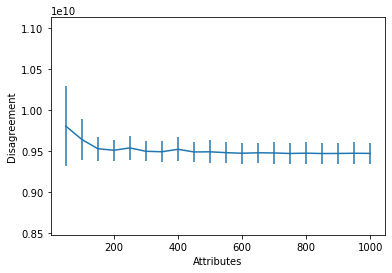

[1.03518, 1.01798, 1.00604, 1.00403, 1.00708, 1.00274, 1.00212, 1.0053, 1.00188, 1.00205, 1.00097, 1.00021, 1.00081, 1.00057, 0.99991, 1.0003, 0.99985, 0.99993, 1.0002, 1.0]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


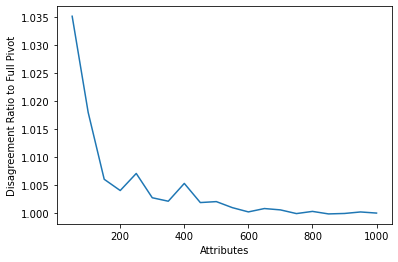

In [30]:
"""
PIVOT PLOTS: synthetic correlated 7_5, 50 to 1000 samples
"""

attributes = [x for x in range(50, 1001, 50)]

scores1 = [[10190504743,9483100089,9499219223,9520228989,9492521583,9641577087,9499147027,10096914935,9549708399,10675537841],
[9451706983,10444008745,9570680825,9460818007,12522460829,10437940563,10228492681,9544585747,9919492779,9443605417],
[9421897963,9436348021,9418860013,9451185731,9534854135,9408758661,9419571313,9428367497,9754243011,9452226339],
[9400304205,10046409095,9401049297,9440761341,9665123161,9402311469,9418528217,9549788301,14419607891,9403495343],
[9403448201,9402725539,9402169641,9403403539,9399998591,9397153165,13294981799,9417448179,10031024933,9407893875],
[9607052311,9402014209,9765327027,9434247239,9394442205,9402880479,10121240877,9405723809,9393108351,9397925609],
[9486614853,10274728049,9399606679,9409058189,9400775825,9416018085,9390426015,9445526725,9389960955,9515094627],
[11880741587,9406177361,9389062839,9405381457,9423471525,9387011501,9387440139,9391309955,9386300773,11308191573],
[9392648963,13383214341,9388882223,10266939535,9401413815,9387350517,9574593665,9510528933,9387743337,9424632553],
[9401196743,9391693349,9856132987,9384514001,9403557159,9429076661,9390605831,9383906453,9427667073,9862023397],
[9682018367,9450852573,9383825567,9543592339,9384123397,9421846233,9392095153,9383073757,9383972925,9385726119],
[9487700451,9383065777,9385316821,9383624197,9382891105,9383162413,9389938867,9405588071,9382153749,9383242543],
[9386662613,9381668835,9403354831,9381559283,9384122937,9424378613,9384681891,9383635007,9383841257,9476234025],
[9948932681,9389530065,9386747691,9927823561,9719795019,9434506231,9394384571,9381454971,9388818451,9384766963],
[9382153411,9381215885,9382147961,9381565309,9382179395,9395451029,9383208633,9668758299,9382238795,9381339113],
[9392778339,9381350469,9380443993,9692597979,9382279387,9385504177,9397675273,9380505519,9390349679,9410354839],
[9482622603,9384209237,9416437501,9380221187,9385962527,9380516071,9418032337,9387077781,9382607439,9380689141],
[9408896047,9985315679,9394600633,9380096697,9830215367,9380192789,9383165473,9381275463,9381786993,9380664421],
[9396349027,9411704799,9380028729,9390327695,9776395749,9380100109,23601110891,9379205505,9379272893,9379564285],
[9379507333,9379193641,9386442057,9383292423,9387756687,9379175527,9382195157,9380085249,10166346813,9388594113]]

scores2 = [[16402451875,16696550161,9895576621,10464546607,9814539633,9807557251,9980825645,10713566227,10552464845,10769996257],
[9748157491,9754696305,9748845815,9783852893,9793648833,12103617449,9875510507,10071253013,9755333541,9768673993],
[10176515749,9740096297,9785096859,9724508883,10358721031,10650473087,9726776703,9935594713,9730164291,9724918625],
[9717173585,9706764871,9771111957,9747878767,9726047563,9722795515,9714327193,9747416003,9716870235,9711321823],
[9848793727,9703267001,9899824689,9705787461,9706808919,9714017083,9706725365,9767685741,9741236347,9772243491],
[9713081363,9702149657,9710171387,9708002099,9700323799,9816611387,9706140941,9701210149,9703776369,9707150223],
[9700246227,9788750619,9794670039,9699266231,9700164695,9705656813,9803959917,9700644307,9696704619,9696942643],
[9695289661,9819671805,9693720275,9718190731,9701081319,9708337953,9818837805,9697026051,9701346255,9737223303],
[9696522807,9693214427,9700533243,9694747895,9694545953,9694717791,9693728655,9701368949,9692500457,9727732051],
[9698887327,9693907605,9695008497,9801400899,9691823637,10576941327,9741690909,9912234299,9703635817,10278702989],
[9693487595,9690363227,9690444673,9694333645,9693239871,10003109295,9757744733,9690789993,9691222247,9783499693],
[9689880163,9690216791,9689308345,9735019019,9698099729,9697468415,9690651113,9690756435,9700416063,9688893105],
[9692392563,9692417853,9692418565,9704163407,9690636811,9688446227,9689417699,9710997131,9702713865,9687260707],
[9704197187,9692087763,9703774791,9819439473,9690635453,9689082177,9698326905,9688958727,9706029387,9700700339],
[9687052917,9688574563,9687373743,9688321059,9690475275,9688342411,9694475445,9696232519,9692639653,9705311075],
[9686590445,9713279673,9847259029,9695323827,9702263303,9688641475,9686255645,9690131249,9845448095,9736653703],
[9687570453,9685996961,11874800487,9691245887,9762726185,9686469217,10101664069,9687125117,9686865567,9902526055],
[9686597713,9686227253,11023076521,9689645177,9685996489,9724863233,9689527161,9687718305,9686361545,9699850335],
[9689454045,9690948471,9737545511,10595112019,14325344013,9686590729,9798695815,9693178891,9686504391,9685290865],
[9701051945,9690785383,9684892019,9700316415,9694735357,9688171249,9684860591,9709293857,9693359323,9687225553]]

scores3 = [[9538474388,9545059938,9833995968,9843365534,10156565746,9475707638,9679828542,9465801126,9530018342,9511059468],
[9406254850,9425389622,9417229962,9760492582,9420673028,10942216808,10501503260,9432920502,9412444290,9424522928],
[9469911058,9404009466,9557106064,11862131942,9580445920,9386176650,9389152146,9392133062,9394162978,9399539196],
[9397224686,9392142770,9385066658,9383627946,9387330468,9376673330,9403819368,11032221346,17721970896,9409043866],
[9443773552,9384999404,9377260322,9373268772,9376568542,9419315306,9395216006,9493779050,10105578616,9391307498],
[9376595176,10013525126,9397030070,9372893994,9735812102,9385041264,9387465226,9450294460,9366497256,9383697344],
[9418593298,9388692446,9366871594,9368026882,9364414364,9373275492,9366694594,9371006300,9482886786,9367818474],
[9375986074,9406751176,9371691432,9605320166,9680870600,10771156738,9365248678,10560766604,9363816114,11201434808],
[9362345958,9359815098,9386538508,9361839126,9370612482,9363089794,9378463322,9371202344,9363293026,9378986466],
[9361498296,9367599168,9441636658,9359638466,9362868982,9360391446,9359026674,9379660952,9371455208,9359585222],
[9360065782,9361307876,9370645156,10768572322,9360384980,9359980518,9359109790,9359963122,9359120278,9359999050],
[9357989634,9526491974,9357257580,9366209788,9360240108,9357664714,9359001638,9912573340,9848281684,9596276554],
[9395593534,9372440184,9511896868,9465482418,9369699498,9453847982,9643330766,9361217018,9360241756,9358249050],
[9381259840,9364164360,9383003706,9360149572,9575847600,9359198774,9357385694,9356810310,9359845056,9358916978],
[9364175554,9402419032,9355958196,9356634718,9356530262,9357162578,9356126262,9423797834,9362971106,9790915948],
[9363253514,9410361800,9359745310,9354934914,9359572070,9431137034,9356393254,9358719360,9356032528,9361427858],
[9355442214,9355545252,9355218014,15432473700,9358077652,9354719030,9355399370,9355600798,9356907216,9537115692],
[9620777256,9379516006,9355063552,9364339236,10536677666,9354209266,9360681182,9354559740,9355041810,9559137590],
[9354405874,9450551388,9354327742,9355169462,9354345212,9356639168,9394517350,9354376710,9354448354,9465622816],
[9361306126,11019268456,11437955096,9376086416,9358164472,9356880830,9379108986,9355168814,9363180982,9354168034]]

scores4 = [[9653451942,9867328058,10008290270,10258002050,10333387786,9676030240,11209127688,9665811480,9641540916,9669102022],
[9605785136,9689033120,9661240684,9593273602,9609501380,9593538404,9919921546,11147479116,9597049120,10944104982],
[9568235240,9584737358,9572766854,9567972292,9575242908,9612693380,9606261086,9570567824,10752774192,9736428968],
[9553530396,9735520136,9573561526,9778361688,9566399802,9549742672,9584985996,9561156746,9570762742,9545066474],
[9554408758,9538594860,10610728500,9613787056,9750672530,9744114294,9551713112,9566572514,12332497338,9550078926],
[9944599430,9544487196,9540961108,9540889700,9542139716,9552491968,9550817624,9543797722,9548282664,9549200724],
[9537644856,9540349598,9551587212,9558615276,9556374524,9534929912,9750512490,11103647774,9560252470,9539043230],
[9548759600,9758676498,9535212664,10287013130,9600528450,9543971212,9534649078,9534675954,9534506424,9535641800],
[9532719888,9532677916,9533510930,9532957340,10425280186,9532459020,9584131582,9534670970,9532466044,9553703400],
[9530776946,9532604938,9532217224,9539876174,9547580270,9544249468,10096096778,9538599068,9534634492,9616126916],
[9735907492,9557093676,9528401812,9529848480,9530352804,9541526834,9537770178,9532254262,9550519962,9529719112],
[10418558304,9530645296,9529307436,9531420952,9558805758,10393052822,9532922776,9799532202,9532677160,9529866708],
[9543104860,9526400766,9527849742,9527478002,9537201052,9700550530,9528516090,9527337560,9527136660,9540710086],
[9529234496,9527891588,9527469624,9529453322,9773035536,9541909530,9559297568,9724037462,9544703308,9527069234],
[9526474046,9558534092,9528126840,9542024466,9527484176,9525622144,9639057090,9527406830,9562019344,9525844800],
[9526104104,9531232668,9526178998,9525924526,9777022146,9525605456,9527321030,9527287994,9543945666,9529571264],
[9529164206,9790650628,9525433888,9529112846,9525503054,9525359860,9532745072,9858698530,9525252240,9530165778],
[9532653248,9524718308,9524909908,9525732862,9524794604,9526150214,9524812100,10221665518,9525907628,9524756308],
[9866724936,9525634422,9530964650,9525472688,9524886698,9524665232,9620684456,9588703828,9540592870,9562201770],
[9524132332,9524131460,9524132332,9688673754,9535262020,9530471180,9525008444,9661931936,9524618706,9566434110]]

scores5 = [[9493268708,9492207230,9500000144,9480018282,10451621238,9508397382,16178184836,9483268134,9626041936,9530617026],
[9416029212,10082347576,9463496950,9432726766,9425710306,9542783718,9420431322,9410162186,9754389056,10510443650],
[9405728342,9409030374,9406899048,9393716874,9431592054,9406571928,9397528294,9655966048,9435022576,11460969196],
[9395876994,9390714174,24110863930,9394881510,9831800610,9392523658,9406156828,9387865438,9392259818,9477312050],
[9392324794,9440897364,9604078270,18265438802,9381464186,10026416668,9421335958,9382156880,9525366760,10919473848],
[9385371200,9385514874,9378240734,9480402358,9435506404,9380353646,9384325760,9424714918,9618958226,9938808776],
[9446271060,9435373066,9386218338,9405716366,9377532822,9379722638,9469378222,9384724866,9380588314,9382084584],
[9374150802,9378515350,9383660878,9376431478,9371865066,9406668540,9379560660,10900702122,9383829646,9392891422],
[9588138264,9385441908,10333381114,9384447480,9438221166,9373144954,9380326326,9372228794,9468216236,9404690538],
[9468492564,9388994972,9614884116,9373007634,9434241886,9376451200,9372714066,9374359686,10181414218,9372889526],
[9391677692,9379746380,9655387578,9378760044,10048019274,9408611952,9402590252,9452111700,9371963398,9378306804],
[9370024386,9650717052,9387221632,9368884976,9369202292,9370219306,9373994108,9372758688,9464724802,9370801918],
[9368743078,9367660226,9386303250,9745527178,9369257326,9383800466,9402692896,9371564372,9372420520,9369527068],
[9368187290,9367452514,9366790890,9370040612,9371808500,9428317296,9367613314,9367242938,9372632244,9461694174],
[9370471160,9367089218,9368312514,9366863404,9373264988,9369366138,9430028156,9373049754,9371480682,9371113594],
[9367876638,9372224130,9369319238,9417842018,9367825536,9367008322,9371484656,9876303906,9399419374,9366075438],
[9365950846,10437017982,9740427468,9370073368,9366267376,9367944108,9936816360,9367252206,9367574658,9366474956],
[9365393710,9368719274,9580692806,9507292820,9376780180,9369830954,9374298978,9365315482,9366733370,9366634968],
[9369299580,9369625460,9369312582,9365086374,9375063510,9365575324,9366334750,9371145236,9370580598,9483124668],
[9395107794,9366673916,9365936438,9366278520,10006789510,9364753342,9368320452,9366144174,9364769306,9364753342]]

scores = [scores1[i] + scores2[i] + scores3[i] + scores4[i] + scores5[i] for i in range(len(attributes))]


plot_scores = [np.mean(remove_outliers(s)) for s in scores]
err_scores = [np.std(remove_outliers(s)) for s in scores]


# plt.title("Pivot: 0.7 Correlation, 0.5 Mean")
plt.xlabel("Attributes")
plt.ylabel("Disagreement")
plt.errorbar(attributes, plot_scores, err_scores)

plot_ylims = plt.ylim()
print(plot_ylims)
plot_range = plot_ylims[1] - plot_ylims[0]
print(plot_range)

mid_val = plot_ylims[0] + (plot_range / 2)
plt.ylim(mid_val - PLOT_YLIMIT5, mid_val + PLOT_YLIMIT5)

plt.show()

pivot_change = [round(plot_scores[i] / plot_scores[-1], 5) for i in range(len(attributes))]
print(pivot_change)

bound_check = [pivot_change[i] <= multiple_bounds[i] for i in range(len(pivot_change))]
print(bound_check)

plt.xlabel("Attributes")
plt.ylabel("Disagreement Ratio to Full Pivot")
plt.plot(attributes, pivot_change)
plt.show()


(1887280117.604161, 2070127992.0003417)
182847874.39618063


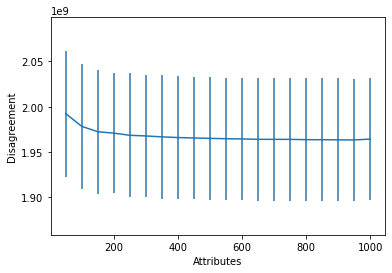

[1.01429, 1.00713, 1.00413, 1.00333, 1.00213, 1.00176, 1.00125, 1.00086, 1.00062, 1.0004, 1.00021, 1.00009, 0.99988, 0.99985, 0.99984, 0.99968, 0.99964, 0.99958, 0.99952, 1.0]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


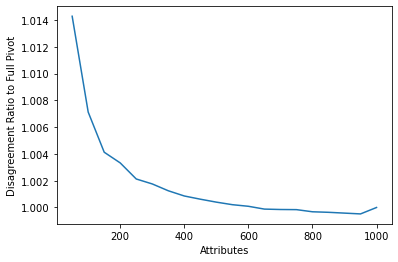

In [31]:
"""
PIVOT PLOTS: synthetic correlated 9_1, 50 to 1000 samples
"""

attributes = [x for x in range(50, 1001, 50)]

scores1 = [[1921227942,1923380666,1922730150,1929830798,1921824290,1924571558,1920300246,1912347134,1924519578,1917615682],
[1909542674,1908534420,1907219972,1916765230,1906756190,1908901742,1905626788,1954464894,1905166010,1903135926],
[1902552566,1900663310,1900062642,1902421096,1900200834,1901392946,1901797074,1903990718,1900930002,1903989302],
[1897910422,1900800346,1902124408,1899468634,1897142610,1899849538,1902437092,2072206588,1902049430,1923283212],
[1897467218,1897392342,1896775606,1898492882,1897681650,1897122578,1899780322,1946850732,1897734478,1898222940],
[1897616972,1897241736,1909511644,1897681904,1898122642,1899162750,1949048956,1895983646,1899563374,1897117762],
[1896334786,1896702574,1897123034,1895335042,1898937222,1895006174,1896499884,1896626222,1895948558,1897472138],
[1897634590,1895641710,1896385400,1911119466,1894699726,1896611652,1895546122,9945439116,1897158458,1896955600],
[1896044714,1938030524,1894276570,1895869098,1896158422,1895702526,1896947038,1895141834,1895372290,1895468406],
[1894743596,1895891942,1895508194,1895163234,1896086348,1895422034,1895026278,1895408930,1894528682,1895506286],
[1894431846,1896760642,1896240354,1897182620,1894468258,1895561436,1893951382,1894259438,1894969182,2032412976],
[1896525470,1894790682,1894469174,1894221150,1894057038,1894980154,1895432210,1896056610,1894821556,1894804950],
[1893736914,1893260026,1894141778,1894129210,1895883612,1894354622,1893529394,1894984394,1895438208,1894277802],
[1894776826,1894199954,1893449298,1893867458,1894281852,1893854498,1893701498,1894137294,2091018676,1894117606],
[1893719382,1893470462,1894088512,1893167530,1894612860,1896149858,1893854426,1897866874,1906403414,1893253628],
[1893490402,1893238446,1893489286,1893431614,1893795602,1893616198,1893738794,1893528818,1893674436,1893565782],
[1893488842,1893191794,1893238446,1893954418,1893847496,1893084142,1893365596,1893471122,1893301734,1893238890],
[1893187640,1893353790,1895478808,1893432370,1893243418,1893276802,1893084142,1893160850,1893084142,1896167414],
[1893084142,1893084142,1893514218,1893111644,1893123182,1893084142,1893375542,1893277604,1893195878,1893084142],
[1916647994,1893084142,1902562168,1893084142,1893172626,1893540748,1893084142,1893084142,1893084142,1893084142]]

scores2 = [[2976814951,2102263205,2112438207,2116001659,2119915231,2105823533,2113172971,2101662799,2110362059,2111292293],
[2093203857,2100396467,2111293977,2089294621,2098182031,2240274703,2092326485,2094488871,2091618673,2090456493],
[2091184611,2082971451,2083558469,2091922755,2088767517,2092994023,2095295393,2090200275,2085908517,2085317977],
[2083465265,2089053687,2083790527,2083441113,2083867951,2210079795,2085621473,2081413653,2084417631,2084789643],
[2086409693,2133604019,2083502365,2081948807,2088021929,2083949103,2082761189,2094982091,2083671817,2085457033],
[2082141745,2082636099,2083627077,2082455811,2085131227,2083195135,2083496743,2082908203,2080377293,2081891199],
[2082795351,2085088197,2087173177,2079725283,2085345697,2081850445,2082467749,2082276329,2081795087,2080818969],
[2079937211,2079152813,2080374933,2088291483,2080786323,2079116773,2082316907,2079917427,2081430793,2081132635],
[2081009997,2079558783,2080189683,2079667939,2080512063,2080450761,2080338469,2080091783,2102053503,2082386623],
[2079543785,2079342857,2079230671,2080265123,2078835997,2083385755,2080223015,2079191193,2079730529,2087869885],
[2078560035,2078748515,2079306679,2080355757,2078790703,2079135869,2078770501,2079345565,2079496265,2079690125],
[2079423129,2079814721,2078348457,2079371455,2078521469,2078856041,2079439347,2079573335,2079517177,2079327321],
[2084209029,2078539791,2078535849,2078654165,2078979565,2078712103,2079461013,2079521311,2078807751,2079136083],
[2079268791,2080082929,2078981389,2079070581,2078895155,2078750327,2078674209,2078791421,2078525281,2079480163],
[2079167111,2091531637,2079134287,2078635611,2078444531,2079233177,2078407747,2078502645,2078309269,2078702895],
[2078828733,2124348827,2078214259,2078731173,2078558789,2078712471,2078446049,2078251357,2078341741,2078448101],
[2078176273,2078175025,2081998187,2078406403,2078118261,2078610983,2078194445,2078646659,2078252487,2078499889],
[2078486087,2078675281,2078336365,2364001955,2079656171,2078059879,2078301629,2078099523,2078290613,2078099951],
[2078194205,2078068437,2078223211,2079346135,2078125405,2078929287,2078117293,2079042475,2078195645,2080345791],
[2078059879,2078059879,2078059879,2078085809,2078099523,2078086031,2078537087,2078059879,2078327937,2078059879]]

scores3 = [[1964857897,1972499053,1962688379,1980787091,1967665151,1966617315,1984765495,1971215253,1969586893,1974512509],
[1958455199,1966998787,1959751085,1960908831,1958730653,1953799475,1961231635,1953128063,1956221939,1959427677],
[1951229839,1950708699,1951764383,1952189879,2016483747,1959670395,4618817475,1951596505,1952113845,2042501639],
[1951822789,1950244665,1948096305,1961397211,1949961511,1947308765,1951364925,1950991527,1950478675,1949981979],
[1946696917,1953223693,1947845923,1947232809,1948802611,1946677445,1949869841,1946578143,1962625875,1949118659],
[1949100497,1948138029,1946313771,1955696789,1947537793,1947844801,1947326977,1948561351,1946467597,1949970163],
[1946274355,1946767837,1953325705,1945122275,1948080023,1947907487,1945459431,1947058955,1947858059,1946515599],
[1946789619,1945828751,1944890459,1945492625,1946275235,1947203631,1947670771,1945198907,1946445203,1948206027],
[1945775597,1948547283,1946773869,1945887813,1944731491,1946271123,1945707663,1946277783,1944469141,1961996825],
[1944486901,1945716769,1946451127,1945028813,1946798485,1946752177,1945121621,1945044117,1945187801,2002751115],
[1945104195,1946151879,1947830335,1944929891,1944332229,1944064551,1945381675,1945024935,1945719021,1944335099],
[1944682037,1945014803,1944793423,1944646227,1944313953,1944622651,1945634905,1944867871,1944508761,1945762555],
[1944451827,1944277059,1944891831,1944798775,1944796323,1944545963,1945399701,1944062855,1944141481,1944661727],
[1944405165,1945081737,1944716927,1943959241,1944612599,1944258793,1944601917,1944257307,1944786191,1944141847],
[1944219191,1944008803,1944450517,1944526961,1944481205,1944525129,1944620545,1945032733,1945513603,1948617275],
[1944252191,1944296313,1944121315,1944012135,1946662123,1944092099,1944084689,1943816953,1944617443,1943968073],
[1944123491,1945223713,1944164387,1944134229,1943853625,1943998461,1943970359,1944217123,1944143863,1944048587],
[1943912923,1944240651,1943795583,1943988447,1943969341,1943855025,1943929005,1943719109,1943957149,1944322339],
[1943719109,1943776615,1943816953,1943853453,1943938031,1943757947,1955516223,1943853453,1943815075,1943948753],
[1943719109,1943719109,1945175273,1943719109,1943719109,1943728391,1943719109,1943752833,1943719109,1955332165]]

scores4 = [[2023778052,2022805052,2033059748,2017665200,2027020704,2026885872,2027328104,2017609512,2016837852,2021691760],
[2014291736,2012871900,2011250810,2008542020,2006664266,2074992136,9811714106,2008766868,2005607120,2008304132],
[2004569572,2004968564,2007676848,2010802848,2003075248,2001885132,2011694680,2007410686,1998047496,2003720360],
[2004800564,2004093862,1999217880,2003954940,2002667678,1999501516,2001172672,1999793692,2002270036,2002857492],
[1999313156,2009467938,1997894412,2001365156,2002398808,2001014592,1999391654,2001529794,2000720052,2001973524],
[2001797564,2018426244,1998531156,2000712428,2000332478,1999869144,1999693308,1998928484,2000233552,2002118484],
[1999388740,2000271896,1999339866,2001278638,1999558464,1997741220,1998043720,1999855056,2001598670,1998526728],
[1997267038,1998221696,2011601096,1999750936,1998549260,1998446100,1999236456,1997223140,1999482484,1998953048],
[1998601832,1997953756,1996705662,1999420340,1998298400,1997173660,1998372740,1998070736,1998773608,1997165756],
[1996994124,1998061180,2004682018,1997261844,1997913220,1998296824,1998568012,1998445756,1996837132,1997646662],
[1997220136,1997054076,1997145188,1998411900,1997730918,1997994542,1997515920,1997606528,1997375856,1998902426],
[1998672296,1997048668,1998136046,1998595372,1997566152,1997205704,2005226476,1996934000,1997205296,1996600224],
[1999767692,1996458024,1997107820,1997007094,1997127544,1996800352,1996953252,1996703180,1997166368,1996477348],
[2040689264,1996647728,1997376540,1996668320,1996845190,1996666436,1996705926,1996972920,2014338890,1997126500],
[1996686740,1996808752,1997069756,2009302746,1996842476,1996972032,1997278430,1996802384,1997331172,1996610972],
[1996897608,1997003250,1996997548,1996723684,1997088132,1996745820,1997253948,1996916868,1997486944,1996697412],
[1996553300,1996512972,1996457232,1996647612,1996553080,1996913768,1996655610,1996754774,1996787858,1996628772],
[2000117056,1996494460,1996629232,1996630024,1996800444,1996629184,1996687068,1996532436,1996630416,1996801436],
[1996685196,1996476524,1996552888,1996437740,1996457348,1996476036,1996609024,1996573248,1996495112,1996458024],
[1996491800,1996437740,1996437740,1996437740,1996437740,1996436852,1996437740,1996538370,1996437040,1996437740]]

scores5 = [[1928701235,1937905893,1940747585,1922478459,1933172071,1953405157,1919640317,1927068005,1945472427,1939284315],
[1924925995,1920246725,1919401279,1917711897,1914816839,1917250785,1921021465,1915368829,1925031053,1917579143],
[1912853053,1913336513,1913599975,1915463203,1920826445,1913812707,1913371837,1912678955,1917829683,1912654229],
[1909356683,1974091017,1909988681,1912911041,1943245537,1918861109,1915311515,1914369235,1912084661,1987620041],
[1909722817,1912487607,1910084897,1910064391,1911963347,1910064203,1908529283,1910543953,1908974609,1908241081],
[1908448447,1909524339,1914660323,1909266007,1908604243,1911771959,1911693719,1907757187,1909181483,1907547479],
[1906775979,1909523579,1908969239,1917734615,1908243061,1908140643,1907470393,1907817479,1907767201,1909254763],
[1907408195,1907698469,1907161743,1907912547,1907226765,1908448445,1906375267,1909724101,1907206097,1908642847],
[1908489177,1909593185,1906592601,1907468591,1907872037,1906604513,1906736869,1906240713,1907489771,1907910789],
[2014838057,1907555573,1915568589,1905547603,1907870977,1906374583,1905976669,1905719723,1906834775,1905989663],
[1907388807,1908316661,1905411727,1906583777,1906469459,1906201723,1906606475,1905623557,1905912631,1906103085],
[1906113109,1905565987,1905432713,1905757119,1906597421,1906201497,1906548411,1905698651,1905257795,1905930391],
[1905714237,1905584515,1906279583,1905374547,1913742715,1905759411,1906104067,1905604857,1905664275,1905660605],
[1906491495,1905737667,1905420423,1906086619,1905354839,1905641949,1905298373,1905738737,1905867847,1905298373],
[1905298373,1905529427,1907142437,1905200457,1905524461,1906123997,1907351771,1905354003,1905220353,1907537891],
[1905220353,1905278595,1905854687,1905258639,1913417763,1905316001,1905509147,1905335751,1917611703,1905221229],
[1905220353,1905220353,1905237529,1906754567,1905257795,1905430629,1906719683,1906097717,1905687263,1935823769],
[1987218267,1905310233,1905200457,1905163011,1905407867,1905200457,1905337857,1908162333,1905356575,1905168205],
[1905330449,1905258639,1905163011,1905163011,1905200457,1905200457,1905254035,1905258639,1905421883,1908238375],
[1905215287,1905163011,1905163011,1910727409,1905163011,1905163011,1905163011,1905163011,1905163011,1905218739]]

scores = [scores1[i] + scores2[i] + scores3[i] + scores4[i] + scores5[i] for i in range(len(attributes))]


plot_scores = [np.mean(remove_outliers(s)) for s in scores]
err_scores = [np.std(remove_outliers(s)) for s in scores]


# plt.title("Pivot: 0.1 Mean, 0.9 Correlation")
plt.xlabel("Attributes")
plt.ylabel("Disagreement")
plt.errorbar(attributes, plot_scores, err_scores)

plot_ylims = plt.ylim()
print(plot_ylims)
plot_range = plot_ylims[1] - plot_ylims[0]
print(plot_range)

mid_val = plot_ylims[0] + (plot_range / 2)
plt.ylim(mid_val - PLOT_YLIMIT1, mid_val + PLOT_YLIMIT1)

plt.show()

pivot_change = [round(plot_scores[i] / plot_scores[-1], 5) for i in range(len(attributes))]
print(pivot_change)

bound_check = [pivot_change[i] <= multiple_bounds[i] for i in range(len(pivot_change))]
print(bound_check)

plt.xlabel("Attributes")
plt.ylabel("Disagreement Ratio to Full Pivot")
plt.plot(attributes, pivot_change)
plt.show()


(3881222754.6793566, 4385431729.6293545)
504208974.9499979


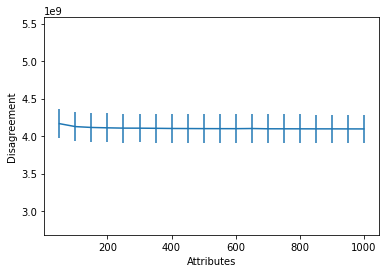

[1.01717, 1.00755, 1.0048, 1.00356, 1.00262, 1.00246, 1.00202, 1.00147, 1.00125, 1.00099, 1.00088, 1.00082, 1.00135, 1.00045, 1.00039, 1.0003, 1.00022, 1.00019, 1.00007, 1.0]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


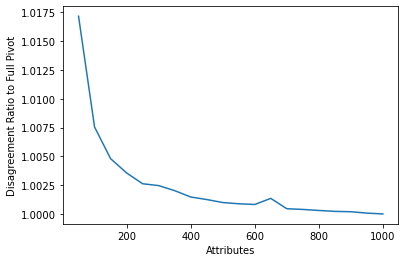

In [32]:
"""
PIVOT PLOTS: synthetic correlated 9_3, 50 to 1000 samples
"""

attributes = [x for x in range(50, 1001, 50)]

scores1 = [[3995817668,4006715292,3997421652,4012393676,3998529764,4007154124,3995121386,3999306440,3995026624,4350411618],
[3996653282,3972009468,3962440716,3966047204,3994551262,3965799300,3974514528,3985410182,3979222050,3964125216],
[3952269152,3959332816,3993910240,3955843968,3984804102,3951629668,3954814384,3959046452,3959548448,4130343966],
[3950380276,3951200792,3951975060,3953407452,4901974002,3951009752,5088183444,3962827866,3952889236,3952926480],
[3946446696,3954115784,3953112732,3947016356,3947988568,3947435008,3948074834,3950223030,4043976648,3950432516],
[3995602940,3993109054,3947677460,3956139812,4009448574,4097588432,3947796984,3946158206,3947782056,3953551406],
[3949151200,3946471884,3946011740,3952050608,3997457826,3949764766,3945682308,3946142020,3981073802,3945717552],
[3946994108,3945077376,3945347260,3945019344,3950244082,3958844446,3945861852,3946101420,3945405264,3977000002],
[3943296320,3945015796,3970591964,3946568324,3944742320,3944857876,3978729854,3944804384,3944273976,3945237948],
[3944303600,3943991876,3944063392,3944158020,3943284186,3944885668,3945054420,3951001074,4208959268,3944638552],
[3945162272,3944254120,3945975316,3948029406,3943275992,3943129736,3946435300,3965785618,3951586714,3942774760],
[3968621768,3945293066,3958108992,3943172796,3943254076,3942655496,3943308220,3944285700,3944012908,3943433238],
[3943512740,3944010092,3952470256,4080983576,3945003398,3944082732,3946556952,3945415484,3943334312,3944339060],
[3943288652,3942870896,3945212990,3953896074,3943520020,3943797402,3943321380,3946328696,3943365162,3943128272],
[3943481640,3942857748,3949266130,3942339712,3943274980,3942011668,3943077790,3943055384,3969178592,4119720604],
[3942469720,4333282142,3942956808,3942557744,3942234376,4210617060,3942049652,3942695028,3942603132,3943148744],
[3941998264,3942007396,3944301946,3942670992,3942451632,3943866702,3941974848,3942027060,4427276706,3942359864],
[3941977872,3943649600,3947702676,3942082596,3942246090,3942360692,3941860376,3942217958,3941939976,3942086124],
[3942066244,3941809260,3954742914,3941904184,3942289280,3941863788,3941995092,3941902812,3941808880,3981841256],
[3941698608,3942083338,3942135610,3941719080,4008303314,3941698608,3942096956,3942025260,3941698608,3945658978]]

scores2 = [[4597888843,4492291883,4436984757,4615939847,4446010113,4444124585,4521684361,4448315283,4438858461,4437978203],
[4403339221,4411904025,6522152819,4408169661,4407459561,4405912077,4411099367,4399541681,6574295389,4413377107],
[4391662555,4398340067,4393204969,4446282585,4394236643,4399936821,5845770443,4394573885,4396195823,4391170175],
[4565764751,4394813675,4386947217,4395830387,4396385131,4397542751,4389155379,4386625853,4391549437,4408886195],
[4386317025,4397677893,9630135969,4386883483,4388662857,21423918645,4538493063,4383560501,4385827175,4382786779],
[4383557979,4383313059,4380376507,4388416445,4386764535,4392108785,4384212259,4384945693,4387439011,4382729225],
[4483875901,4404019961,4396626167,4384970729,4383499561,4391645277,4382550215,4384834669,4384562845,4381338503],
[4380218579,4380876223,4379618909,4380548603,4401629649,4380221173,4385135681,4381640065,4378992411,4573740559],
[4380369869,4382243903,4378982789,4380617917,4378685437,4381025935,4379620999,4380416993,4382318169,4387378407],
[4380924593,4379998621,4378155755,4377989553,4408938931,4379940957,4378665601,4381470913,4392502797,4458445973],
[4376905629,4380802857,4379110269,4674150523,4377559603,4379117575,4378498467,4377064429,4378077829,4379960269],
[4377776195,4377807497,4379125831,4380523951,4377196081,4376738173,4384630051,4377836675,4378578081,4377606433],
[4377502491,4377191453,4376373179,4377716471,4377082839,4377878863,4377703611,4378688341,4377613911,4377337205],
[4377851611,4380304209,4376698841,4375959147,4377234663,4377098979,4377123935,4376934135,4382550375,4377497253],
[4377066829,4376522879,4377213101,4429812643,4376894403,4377586017,4375956729,4376517989,4377586643,5328857981],
[4376033817,4375630233,4377062543,4376465249,4376240197,4378985891,4377115943,4376755015,4375884169,4376646169],
[4386325663,4380604753,4376177323,4375759271,4376016619,4375801987,4393255245,4378743453,4376546041,4375762503],
[4375520825,4375827537,4376414445,4375939307,4377786403,4469617975,4378502783,4376649123,4375791655,4375613415],
[4375480017,4613905085,4376283905,4375529169,4376353957,4375467913,4387969193,4380367247,4375503353,4375537533],
[4375392345,4375396981,4375392345,4956438899,4375419907,4375392345,4375397841,4377028889,4375392345,4375392345]]

scores3 = [[4146204677,4383014393,4124676097,4126588025,4129964771,4222607629,6423416973,4113954499,4136362901,4173450133],
[4131801645,4172425407,4100540715,4096345747,4097390637,4087501689,4094568247,4095089495,4086913497,4093392081],
[4084913083,4084185417,4190057479,4094173551,4083247593,4086484477,4088030129,4090658683,4083766327,4093910801],
[4078305051,4350362095,4079874263,4080292625,4080300659,4094647581,4078322063,4078577879,4079351083,4078968763],
[4107435893,4076950481,4162648371,4076121787,4092224673,4076455215,4079545323,4076251729,4076403371,4078467453],
[4074945705,4361223473,4075171427,4077456831,4088453765,4079083675,4075683357,4079067957,4076987333,4077748253],
[4122010977,4087158097,4075819409,4073086373,4076380635,4077343377,4074230181,4073324757,4113824889,4080316013],
[4075669115,4081342757,4074598221,4081952651,4072296207,4074371233,4075670873,4075723967,4077096285,4099159099],
[4072216123,4072781603,4072250839,4073393807,4073546101,4074704365,4073566087,4072688603,4074624447,4075756393],
[4072139035,4071285633,4072598765,4474687121,4090533765,4073087641,4072689401,4267472607,4074405895,4071703087],
[4071854981,4072676975,4071079689,4072178759,4075108593,4071866723,4089047779,4081113809,4071586409,4072578357],
[4071448349,4070864885,4071583823,4071906845,4072830437,4071335217,4072917325,4071251233,4563530149,4070964081],
[4071770115,4071077401,4070600289,4071080039,4073964995,4118660185,4070897509,4070951649,4071423983,4070782843],
[4075490513,4070477841,4070268459,4070964375,4070948891,4071480971,4069708427,4070346667,4072366133,4070658437],
[4070404683,4070490193,4070400969,4070789217,4070547309,4070127093,4072425761,4073495295,4070476961,4071214007],
[4070812745,4087245523,4070382493,4071212347,4070104983,4077461261,4069908479,4116273469,4073012273,4070015891],
[4077251707,4070973415,4069654251,4069815623,4070351549,4069913549,4070469143,4073256741,4069799423,4070368139],
[4069689231,4069615625,4168912095,4075530731,4069489607,4070624177,4069648345,4069725193,4069689813,4070238569],
[4069824921,4073299263,4069432913,4069524603,4069431135,4069576913,4069574397,4069394625,4070042769,4069901323],
[4072890153,4069395283,4069395283,4069394625,4073251749,4474129939,4069394625,4069394625,4069753745,4069395283]]

scores4 = [[4690427949,4315054027,4294698987,4293811165,4308517881,4303108953,4379035415,4557812313,4290018657,4301625211],
[4266770151,4271232747,4257403453,4265800345,4277421095,4274428411,6415600303,4566077241,4272365667,4270669403],
[4259252135,4259533049,4259277857,4263513229,4257426093,4261211657,4261929435,4259259211,4260822853,4305371837],
[4287924285,4260793939,4252278009,4257864167,4257440247,4271103297,4253836677,4250209267,4254179447,4252577405],
[4250353343,4252010449,4255397285,4249815615,4246894147,4249719373,4250966677,4253037905,4253776015,4254735855],
[4277816197,4248446245,4244430617,4248011779,4246732301,4248168547,4316211297,4246367437,4249263897,4242985017],
[4248119969,4246083057,4247528499,4246124323,4249211683,4250021017,4243504835,4247238831,4246613937,4246732015],
[4243860731,4348963407,4244861587,4249034601,4254013133,4242316885,4245521463,4243370925,4249881755,4246037087],
[4400247401,4244157137,4244018961,4242030915,4243446627,4245213567,4243448743,4361005959,4244026723,4243769507],
[4241347701,4242313295,4444933565,4244598861,4242027209,4242342213,4245708627,4249049377,4244967607,4241842105],
[4243786671,4242274023,4242257971,4246065275,4247611315,4241121085,4241667611,4256777943,4242356285,4242104505],
[4241248503,4241636319,4241622917,4255877621,4240980381,4241172945,4240890553,4255266009,4240531981,4298386391],
[4240476373,4263445525,4389188883,4240871171,4286458145,4242017669,4240775631,4241681757,4275088579,10990320779],
[4240511051,4241810339,4270237081,4240071801,4242288867,4708468593,4240453249,4240217273,4240509465,4245076991],
[4240016231,4243118767,4240643605,4239655081,4239710181,4244232211,4240683695,4240294439,4241082613,4304702521],
[4240693151,4276142497,4239706741,4240109659,4239472627,4240464431,4239670739,4268467917,4240036191,4239504177],
[4244821979,4240340609,4239435233,4239600565,4239650571,4239903373,4239089669,4239267357,4255657229,4239591597],
[4396158415,4240888833,4239071099,4239081297,4239201973,4239539711,4248052439,4239671605,4239214513,4239931539],
[4239256403,4238944537,4238837045,4239452899,4240658781,4239035569,4238814823,4239179245,4239878489,4239099871],
[4238797337,4588006877,4238797891,4238824131,4238906027,4238797337,4239562691,4239132727,4238871091,4240647367]]

scores5 = [[3911741516,3910745908,3921913784,3927011888,4297704438,3894997808,3911119892,4158722228,3916354712,3894837892],
[3905344926,3868615118,3880459528,3877903684,3881514338,3885092280,3884428878,3868750172,3874997360,3871247012],
[4163772164,3867086156,3875962072,3868580036,3872087452,3865252440,3865056736,3868323964,3864590724,4141066068],
[3861954982,3864839528,3865756576,3864580156,3865178056,3866072412,3865412734,3879351776,3865239336,3865778104],
[3860931716,3861090764,3861272148,3860880578,3857212334,3891258366,3858953720,3860802660,3860406654,3858776820],
[3857239830,3875339074,3862692484,3857385680,3860046668,3856369744,3857197572,3868606362,3857938796,3857510896],
[3858506776,3856446696,3857395982,3856506360,3854422844,3856278388,4517650094,3858188904,3864232192,3862056022],
[3855034156,3859775890,3855602868,3852992772,3856060762,3858403764,3860954430,3856429864,3856157248,3857368864],
[3855664060,3854187768,3859247282,3863836082,3868204688,3855802286,3854349060,3865990314,3854474780,3958356938],
[3854520036,3853762328,3854911318,3853961664,3852755688,3853007404,3854514752,3862606032,3852953858,3856841932],
[3853061804,3857284252,3853542784,3853764724,3858939084,3855447844,3854814284,3857532676,3853800608,3852897060],
[3853338920,3874829408,3852955772,3852621396,3854222474,3853103148,3871634540,5799330760,3859460718,4043913170],
[3855024476,7430736560,3851977216,3852387692,3852894976,3854550240,3853448348,3852456664,3852125844,3853891540],
[3852035572,3852693024,3852877462,3854495218,3852405760,3852199096,3900056274,3852823076,3851978500,3858833664],
[3853090548,3854166106,3853268810,3852367560,3852108232,3896638822,3852160144,3852106304,3853648702,3852230776],
[3853841244,3851925316,3854480432,3851993896,3852017256,3936540968,3852331518,3851777624,3851704300,3851536636],
[3852414912,3852072548,3851665252,3851998936,3851978956,3852019576,3854450638,3853248652,3851844018,3851626836],
[3973897078,3851153448,3851627852,3851464464,3851441480,3853961948,3851298552,4505040736,3852957524,3859919402],
[3851347694,3851297032,3851457566,3851315512,3851469794,3851333064,3851550936,3851481384,3851578866,3851404128],
[3851114336,3851114336,3851112440,3851812802,3851114336,3851112440,3851224376,3851621358,3851114336,3851139134]]

scores = [scores1[i] + scores2[i] + scores3[i] + scores4[i] + scores5[i] for i in range(len(attributes))]


plot_scores = [np.mean(remove_outliers(s)) for s in scores]
err_scores = [np.std(remove_outliers(s)) for s in scores]


# plt.title("Pivot: 0.3 Mean, 0.9 Correlation")
plt.xlabel("Attributes")
plt.ylabel("Disagreement")
plt.errorbar(attributes, plot_scores, err_scores)

plot_ylims = plt.ylim()
print(plot_ylims)
plot_range = plot_ylims[1] - plot_ylims[0]
print(plot_range)

mid_val = plot_ylims[0] + (plot_range / 2)
plt.ylim(mid_val - PLOT_YLIMIT3, mid_val + PLOT_YLIMIT3)


plt.show()

pivot_change = [round(plot_scores[i] / plot_scores[-1], 5) for i in range(len(attributes))]
print(pivot_change)

bound_check = [pivot_change[i] <= multiple_bounds[i] for i in range(len(pivot_change))]
print(bound_check)

plt.xlabel("Attributes")
plt.ylabel("Disagreement Ratio to Full Pivot")
plt.plot(attributes, pivot_change)
plt.show()


(4719793659.600242, 4970195519.839759)
250401860.2395172


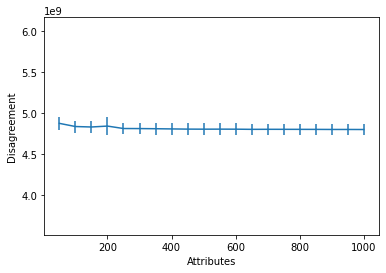

[1.01558, 1.00755, 1.0064, 1.0087, 1.0025, 1.00236, 1.00198, 1.00148, 1.00099, 1.00085, 1.00094, 1.00083, 1.00042, 1.00053, 1.00048, 1.0004, 1.00032, 1.00014, 1.00012, 1.0]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


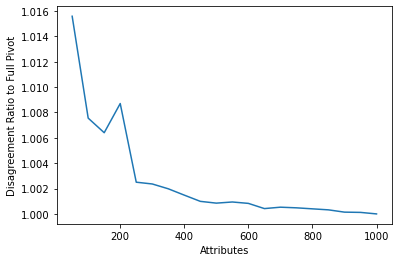

In [33]:
"""
PIVOT PLOTS: synthetic correlated 9_5, 50 to 1000 samples
"""

attributes = [x for x in range(50, 1001, 50)]

scores1 = [[4899780198,4920688382,4945106284,4899335342,5038130302,5021710586,4929719520,4919679364,4918636586,4917144918],
[10150515322,4966316820,4873025990,4868831790,4927681956,4888406730,4869717754,4876912242,4877879906,4880532446],
[4868082822,4865303894,4863792896,4860648650,4893230678,4865695018,4858755886,4950249420,4866008982,4997116126],
[4861175360,4855830566,5137118564,5042025906,4856057030,4861487094,5067612398,5615472806,4864858058,5329553386],
[4853005374,4850247122,4853581846,4947437616,5155941244,4853205006,4904847702,4852329752,4847282046,4931248872],
[4847787438,4851193728,4883251498,4846939830,4848221446,4866318242,4856244884,4850615790,4850446802,7207920842],
[4850782418,4849252718,4848859222,4854147274,4933969660,4854402230,4851323966,4849103714,4963415822,4851080706],
[4847567142,5014075326,4851996490,4847521006,4849014058,4845967754,4870534476,4878217310,4849695660,4846432610],
[5018854738,4859532092,4845752782,4851634948,4846135110,4844965566,4844623158,4846245606,4845274518,4845041310],
[4913483910,4874853928,4843742546,4844051330,4844658398,4846851688,4844934814,4844814262,4843710874,4847228128],
[4846168086,4844932572,4874272432,4844451496,4859434756,4851759756,4846214842,4844102574,4855296458,4842904026],
[4938578612,4843922930,4850033156,4843041954,4843744570,4855113072,4845482516,4843373082,5044163144,4854678836],
[4843410334,4843932410,4844006228,4843602846,4844628258,4853795146,4871736272,4863722264,4844703926,4844084298],
[4848916160,4843931234,4842799346,4842889238,4911840784,4845736766,5002049228,4935891630,4843616210,4842882814],
[5154083814,4842438614,4842262738,4842563510,4879304972,4842130558,4842977934,4843205518,4845769496,4842738382],
[4844109198,4847146640,4842460446,4842534578,4842881604,4842398178,4842577622,4842319822,4842273886,4842238594],
[4842611798,4843651338,4843111862,4842131018,4845751232,4841971286,4842294834,4851008144,4841883466,4842183966],
[4978328378,4841806902,4842171082,4842712520,5053945788,4841734466,4842112546,4842396006,4841935078,4841998160],
[4847247452,4841775298,4847088206,4841663274,4842210034,4846607760,4847920694,4841679774,4841826242,4842561610],
[4843078542,4841575710,4841632486,4844909970,4841665478,4841575710,4841707844,4842377062,4841575710,4844931228],]

scores2 = [[4868711059,4867807051,9124435649,4905509485,4868586553,4862094511,4925353795,4873173263,4870293127,4884354943],
[4832698327,4842854479,4833102429,4844212517,4835096069,4832993447,4831938583,4841069135,4955833687,4840618029],
[4825889883,4823111325,4876640635,4912942797,4846584857,4817800895,4820190285,4822583155,4851449255,4823163545],
[4816316271,4821461425,4824480897,4818456989,4822672335,4842592973,4816759165,4855801933,4822437083,4820494245],
[4813327749,4812131827,4959669227,4838145437,4814098571,4816193351,4814890099,4860868829,4815345159,4813412807],
[4812783827,8219828473,4815015597,4811996453,4816758655,4922320245,4812872713,4812074319,4814007097,4821566863],
[4810252319,4811810421,4816999471,4812596763,4904830747,4813942201,4811822675,4811330351,4822871329,4811904435],
[4809015169,4811378247,4809988593,4813560659,4811074355,4810979831,4812249479,4809895709,4812608757,4811413009],
[4808530213,4807504443,4811646851,4808909745,4808763741,4808721579,4811073339,4808763461,4808622281,4814906017],
[4807468901,4808871717,4810643281,4808596965,4808086529,4810933443,4807918891,4808827261,4808353965,4810091209],
[4806810671,4809383331,4807825253,4818262327,4807179801,4805849429,4810178217,4823558035,4807135339,4806665411],
[4809764813,4807570241,4808504873,4807287431,4806600931,4805057041,4812217447,4805783379,4807808551,4809726611],
[4806294683,4806611531,4805694729,4807023231,4806165727,4805411247,4804883819,4806177317,4805725023,4806321971],
[4806675583,4806697015,5958447471,4947677999,4805366049,4808243161,4808553127,4805600937,4813520027,4805839957],
[4832501771,4806123377,4805256639,4804721483,4812618771,4809125993,4806430471,4846653587,4815437547,4807794301],
[4805669717,4805694441,4809796723,4804234717,4830491429,4817815843,4804666667,4807309821,4806173917,4805516655],
[5238460301,4805455787,4816347887,4804053443,4847577045,4805372531,4806564569,4808857219,4804469433,4804846795],
[4819503435,4804920089,4805211375,4806235737,4804359445,4804416429,4803984713,4804431717,4984834373,4813868103],
[5068847949,4803964651,4804123775,4995213877,4804426839,4814283429,4804031753,4804109145,4803926879,4803981273],
[4804035293,4803838505,4805714657,4803821097,4803817193,4803848929,4805889807,4803817193,4803821097,4803817193]]

scores3 = [[4980646655,4822982585,4809312131,4808418927,4808554619,4807522569,4809045183,4808482307,4806856921,4815840959],
[4776729539,4782193433,4766156581,4949439535,4765878579,4765445555,5671172441,4782376197,4774084567,4768141737],
[4878799373,4763884053,4770119651,4812589445,4758939201,4827001519,4770711523,5940109575,4758749463,5135008327],
[4760437159,4749692429,4751073225,4761393575,4756793213,4749835095,4752583469,4902488533,4757020315,4762961875],
[4755206763,4749985511,4749901909,5322108669,4841529283,4750734975,4749641761,4748925341,4761501157,4753890281],
[4748645209,10713167439,4767938615,4748503269,4746226131,4776217899,4754235375,4851963159,4748223863,4747383905],
[4794927813,4743887137,4747168191,4743515583,4747153827,4746845675,4818608117,4747673431,4746042665,4745471869],
[4748143959,4748362651,4746404277,4744251609,4746345735,4744911707,4755201485,4744390665,4746328675,4744638449],
[4744012749,4744355665,4743640527,4745115589,4747403787,4743568179,4744504761,4745937151,4744154507,4742876169],
[4766953763,4743768373,4741996551,4753519163,4742952823,5104718231,4741643305,4743416399,4900236293,4743256041],
[4743848711,4749315683,4751125159,4740883709,4742717277,4742532479,4741277103,4744052795,4741729479,4741545537],
[4741784997,4753641567,4742201079,4742148609,4742288747,4741816097,4740612417,4740692605,4740953531,4745534201],
[4740527203,4743375893,4739911001,4740721597,4740661619,4739784465,4745212379,4740161923,5340409249,4740112821],
[4740422139,4746229727,4741612671,4740955113,4742083179,4741237533,4740289149,4740124855,4741823039,4741065975],
[4739625117,4739634769,4744426781,4739262871,4741170039,4740091931,4739496291,4795146991,4787389605,4742702265],
[4739562421,4763481805,4739460045,4739732911,4739588261,4740451797,4741410649,4750304803,4740389469,4744265011],
[4741142045,4740906449,4747702495,4739516969,4739316705,5309096117,4739337065,4770148751,4739516225,4740083619],
[4739227953,4739085393,4739282657,4739190859,6031434677,4739012369,4739264167,4806342883,4739648175,4739048955],
[4869737259,4739020601,4739047921,4739911265,4738995159,4738957113,4739031153,4738966281,4748004127,4739013559],
[4739065123,4739083615,4738958267,4738921755,4738921755,4738921755,4739110881,4744515441,4738921755,4738921755]]

scores4 = [[4987327587,4996574745,4979833971,5294837981,4993721449,4986992833,5019464253,4981235445,4982374281,5387556345],
[4936797653,4947352071,4951270969,4943688617,5022301087,4967415671,4952911483,4945537763,4952118757,4950809945],
[4935470075,4935700887,4933737369,4935300009,4931576315,4930002725,4953941929,4946274697,4934728221,4955536841],
[4928323077,4932387471,4926826475,4926903861,4927504547,5030892237,4932439191,5063253191,4955212915,4925610613],
[4920698671,4919929195,4920435229,5137182651,5552015685,4921473215,4923440885,4920002857,4923639331,4923454807],
[4918437801,4921150259,4921552009,4941535889,4942822519,4921135541,4926263369,4921857341,4924070157,4926017833],
[5214500055,4917831779,4917854665,4919326777,4950286077,4927494157,4935406499,4919078411,4954537181,4919743195],
[4917844477,4938534893,4916477661,4919831129,4917526877,4920108003,4974222731,4923042681,4937307153,4917549889],
[5111356581,4918391665,4917482245,4917558801,4917503029,4916846657,4916431985,4918323519,4961044169,5019751563],
[4915677933,4969961953,6141067009,4916422473,4916209475,4915865675,4915991263,4918154217,4918750369,4916660103],
[4916129223,4915929731,4914698779,9073962303,4917870051,4915680133,4929061801,4915539625,4918911243,4915158875],
[4916427993,4918482245,4916165337,4916768439,4914161687,4918624909,4915765833,4916248959,4915322877,4915938603],
[4913835061,4916153013,4921866233,4923177523,4916546847,4915536419,4914335995,4914255935,4914787563,4914767505],
[4917727135,4914215375,4914341201,4913821289,4913976739,4913913759,4913264177,4914223327,4914592661,4915670159],
[4914375259,4914216069,4915227357,4913963401,5001376799,4915179659,4914495197,4914932591,5605538011,4914091453],
[4915664123,4913855017,4913997785,4914124787,4914138551,4913892767,4915595249,4915110679,4916368297,4913910695],
[4914071571,4913961911,4916402627,4914553997,4917267319,4913635773,4914544241,5765091913,4913762913,4915722873],
[4932101845,4914054291,4913226365,4913692225,4913658171,4913404141,4914166083,5556961261,4913458265,4914550295],
[4913168851,4935451487,4916244763,4913298993,4913890695,4913675045,4913278221,4914157885,5203694657,4919719379],
[4913809115,4913083021,4913083021,4913083021,4913319395,4913083021,4913083021,5016408157,4913478779,4913139065]]

scores5 = [[5004266129,4784173407,4793694367,4806656933,4784965971,4821757893,4776590959,4784515259,4779286509,4778701497],
[4749545457,4742465909,4846416289,4777261347,4755541515,4747417897,4739931435,4742663351,4742733707,4750186765],
[4728776281,4734207833,4739826661,4732870189,4734086565,4734419335,4998667459,4739409621,4877885641,4729542279],
[4725963391,4730576131,4731709849,4731688073,4731720473,4743601131,4732923931,4726724847,4729781637,4727176225],
[4725614673,4734341943,4725727875,4729726885,4748954129,4727161613,4729458733,4732242219,4727300515,4724308711],
[4724516791,4728308201,4728163331,5890132891,4722759141,4743188807,4722980303,6021170365,4724465169,4725510665],
[4723737837,4785086253,4726749579,4724619307,4726193363,4723923609,4724411125,4726813233,4724314101,4733165893],
[4729911511,4720925677,4722188717,4933867711,4723292135,4720931621,4720490445,4721794233,4744397675,4722630513],
[4721857135,4722019135,4729558553,4721262111,4722794951,4767469655,4722445819,4720906883,4722018501,4732933245],
[4720024977,4720169967,4719591291,4722053301,4720339145,4720843431,4720186793,4721344047,4725154727,4732413455],
[4723372395,4721883861,4719869625,4720336445,4725851247,4723238525,4843180789,4740664181,4723028241,4720898791],
[4719392239,4718979091,4720654395,4719835609,4895218647,4720168117,4720064301,4721433391,5245034435,4722302793],
[5146701105,4719233703,4719596519,4719808629,4719414045,4718812899,4719703943,4722567453,4719157957,4719409811],
[4718829387,4719303625,4719428549,4720032621,4719518177,4719930547,4718506563,4724855903,4718725455,4720542273],
[4718908667,4718889385,4718476387,4718870139,4721867617,4718742007,4718821837,4719257699,4718842743,4718615659],
[4718090393,4723565371,4833099683,4720447061,4718714731,4718240563,4727471027,4721020005,4757819813,4718654639],
[4718522873,4719881793,4718646633,4718437077,4719120943,4718307199,4718459703,4718440415,4720379779,4718273969],
[4803402577,4717935163,4718097327,4718331867,4720492645,4718371049,4718930049,4718309133,4860986053,4718153537],
[4719523781,4718166835,4718443893,4718196629,4717950083,4719865573,4733029055,4731785135,4717880789,4717970871],
[4722315129,4718016313,4718492007,4718536669,4717881523,4721974533,4718103735,4717880789,4717897991,4719087831]]

scores = [scores1[i] + scores2[i] + scores3[i] + scores4[i] + scores5[i] for i in range(len(attributes))]


plot_scores = [np.mean(remove_outliers(s)) for s in scores]
err_scores = [np.std(remove_outliers(s)) for s in scores]

# plt.title("Pivot: 0.5 Mean, 0.9 Correlation")
plt.xlabel("Attributes")
plt.ylabel("Disagreement")
plt.errorbar(attributes, plot_scores, err_scores)

plot_ylims = plt.ylim()
print(plot_ylims)
plot_range = plot_ylims[1] - plot_ylims[0]
print(plot_range)

mid_val = plot_ylims[0] + (plot_range / 2)
plt.ylim(mid_val - PLOT_YLIMIT5, mid_val + PLOT_YLIMIT5)

plt.show()

pivot_change = [round(plot_scores[i] / plot_scores[-1], 5) for i in range(len(attributes))]
print(pivot_change)

bound_check = [pivot_change[i] <= multiple_bounds[i] for i in range(len(pivot_change))]
print(bound_check)

plt.xlabel("Attributes")
plt.ylabel("Disagreement Ratio to Full Pivot")
plt.plot(attributes, pivot_change)
plt.show()
